## Prophet

In [19]:
# Import Libraries untuk Analisis Prophet dengan Optimasi
from prophet import Prophet
from prophet.make_holidays import make_holidays_df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from itertools import product
import json

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

print("Libraries berhasil dimuat!")
print("Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi")

Libraries berhasil dimuat!
Notebook ini akan menampilkan analisis Prophet dengan MAPE yang sudah dioptimasi


In [2]:
df = pd.read_excel("../data/data_kiriman.xlsx")
df.describe()

SLA   Kantor_Kirim                      Tgl_Kirim  \
count  965003.000000  965003.000000                         965003   
mean        2.281931   50826.053391  2023-02-25 02:27:21.960491008   
min         2.000000   10000.000000            2020-12-26 00:00:00   
25%         2.000000   40000.000000            2022-04-03 00:00:00   
50%         2.000000   61300.000000            2023-02-27 00:00:00   
75%         2.000000   65100.000000            2024-03-01 00:00:00   
max         6.000000   99900.000000            2024-12-29 00:00:00   
std         0.651119   22275.113908                            NaN   

                 Tgl_Antaran_Pertama                     Tgl_Update  \
count                         965003                         965003   
mean   2023-02-27 02:38:10.271844352  2023-02-27 03:56:00.154941440   
min              2021-01-01 00:00:00            2021-01-01 00:00:00   
25%              2022-04-05 00:00:00            2022-04-05 00:00:00   
50%              2023-02-28 00:00:00            2023-02-28 00:00:00   
75%              2024-03-03 00:00:00            2024-03-03 00:00:00   
max              2024-12-31 00:00:00            2024-12-31 00:00:00   
std                              NaN                            NaN   

               Berat       Cek  
count  965003.000000  965003.0  
mean        0.569269       1.0  
min         0.010000       1.0  
25%         0.020000       1.0  
50%         0.100000       1.0  
75%         0.980000       1.0  
max        10.000000       1.0  
std         1.061399       0.0

In [3]:
# display(df)
df.head(10)
# df.tail()

Nosi   Posisi_Saat_Ini Status Kiriman Produk  SLA  Kantor_Kirim  \
0  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
1  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
2  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   
3  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
4  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
5  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
6  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   
7  P2410070150380  KCU MALANG 65100      DELIVERED    PKH    5         75500   
8  P2410070150487  KCU MALANG 65100      DELIVERED    PKH    5         75500   
9  P2410070151187  KCU MALANG 65100      DELIVERED    PKH    5         75500   

   Tgl_Kirim Tgl_Antaran_Pertama Tgl_Update           Petugas  \
0 2021-10-07          2021-10-13 2021-10-13  Moch. Nur Haqiqi   
1 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
2 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
3 2022-10-07          2022-10-13 2022-10-13  Moch. Nur Haqiqi   
4 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
5 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
6 2023-10-07          2023-10-13 2023-10-13  Moch. Nur Haqiqi   
7 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   
8 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   
9 2024-10-07          2024-10-13 2024-10-13  Moch. Nur Haqiqi   

                  Nama_Penerima                                 Alamat   \
0  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
1     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
2  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   
3  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
4  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
5     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
6  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   
7     ARYA SYAHREZA -25/PDT.BTH                        JL BANDUNG RT 01   
8  ARYA SYAHREZA -25/PDT.G/2024                        JL BANDUNG RT 01   
9  ARYA SJAHREZA -25/PDT.G/2024  JL BANDUNG 34 RT 01 DESA PENGANGGUNGAN   

                  Kota Alasan_Gagal Alasan_Irregulitas Status_SWP  Berat  Cek  
0  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
1  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
2  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
3  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
4  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
5  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
6  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
7  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
8  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1  
9  KOTA MALANG, KLOJEN            -     Tanpa Manifest    oversla    0.1    1

## Preprocessing

In [4]:
df = df[['Kota', 'Cek', 'Tgl_Kirim']]
# display(df)
df.head(10)

Kota  Cek  Tgl_Kirim
0  KOTA MALANG, KLOJEN    1 2021-10-07
1  KOTA MALANG, KLOJEN    1 2022-10-07
2  KOTA MALANG, KLOJEN    1 2022-10-07
3  KOTA MALANG, KLOJEN    1 2022-10-07
4  KOTA MALANG, KLOJEN    1 2023-10-07
5  KOTA MALANG, KLOJEN    1 2023-10-07
6  KOTA MALANG, KLOJEN    1 2023-10-07
7  KOTA MALANG, KLOJEN    1 2024-10-07
8  KOTA MALANG, KLOJEN    1 2024-10-07
9  KOTA MALANG, KLOJEN    1 2024-10-07

In [5]:
df['Kecamatan'] = df['Kota'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else '')
display(df)

Kota  Cek  Tgl_Kirim      Kecamatan
0              KOTA MALANG, KLOJEN    1 2021-10-07         KLOJEN
1              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
2              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
3              KOTA MALANG, KLOJEN    1 2022-10-07         KLOJEN
4              KOTA MALANG, KLOJEN    1 2023-10-07         KLOJEN
...                            ...  ...        ...            ...
964998      KOTA MALANG, LOWOKWARU    1 2024-12-01      LOWOKWARU
964999       KOTA MALANG, BLIMBING    1 2024-12-01       BLIMBING
965000  KOTA MALANG, KEDUNGKANDANG    1 2024-12-01  KEDUNGKANDANG
965001         KOTA MALANG, KLOJEN    1 2024-12-01         KLOJEN
965002      KOTA MALANG, LOWOKWARU    1 2024-12-01      LOWOKWARU

[965003 rows x 4 columns]

In [6]:
df = df[['Kecamatan', 'Cek', 'Tgl_Kirim']]
display(df)

Kecamatan  Cek  Tgl_Kirim
0              KLOJEN    1 2021-10-07
1              KLOJEN    1 2022-10-07
2              KLOJEN    1 2022-10-07
3              KLOJEN    1 2022-10-07
4              KLOJEN    1 2023-10-07
...               ...  ...        ...
964998      LOWOKWARU    1 2024-12-01
964999       BLIMBING    1 2024-12-01
965000  KEDUNGKANDANG    1 2024-12-01
965001         KLOJEN    1 2024-12-01
965002      LOWOKWARU    1 2024-12-01

[965003 rows x 3 columns]

In [7]:
# Hitung jumlah paket per hari per kecamatan
df_kecamatan_daily = df.groupby(['Kecamatan', 'Tgl_Kirim'])['Cek'].count().reset_index()
df_kecamatan_daily.rename(columns={'Cek': 'total_paket'}, inplace=True)

# Tampilkan statistik ringkasan per kecamatan
print("Statistik Paket Per Hari Per Kecamatan:")
print("=" * 80)

for kecamatan in df_kecamatan_daily['Kecamatan'].unique():
    df_filtered = df_kecamatan_daily[df_kecamatan_daily['Kecamatan'] == kecamatan]
    
    print(f"\nKecamatan: {kecamatan}")
    print(f"   Rata-rata paket per hari: {df_filtered['total_paket'].mean():.2f} paket")
    print(f"   Minimum paket per hari: {df_filtered['total_paket'].min()} paket")
    print(f"   Maksimum paket per hari: {df_filtered['total_paket'].max()} paket")
    print(f"   Median paket per hari: {df_filtered['total_paket'].median():.2f} paket")
    print(f"   Total hari pengiriman: {len(df_filtered)} hari")

# Tampilkan sample data
print("\n" + "=" * 80)
print("Sample Data Paket Per Hari Per Kecamatan:")
display(df_kecamatan_daily.head(20))

# Statistik keseluruhan
print("\n" + "=" * 80)
print("Ringkasan Keseluruhan:")
summary = df_kecamatan_daily.groupby('Kecamatan')['total_paket'].agg(['mean', 'min', 'max', 'median', 'sum']).round(2)
summary.columns = ['Rata-rata/hari', 'Min/hari', 'Max/hari', 'Median/hari', 'Total Paket']
display(summary)

Statistik Paket Per Hari Per Kecamatan:

Kecamatan: BLIMBING
   Rata-rata paket per hari: 109.58 paket
   Minimum paket per hari: 2 paket
   Maksimum paket per hari: 1027 paket
   Median paket per hari: 99.00 paket
   Total hari pengiriman: 1465 hari

Kecamatan: KEDUNGKANDANG
   Rata-rata paket per hari: 80.90 paket
   Minimum paket per hari: 1 paket
   Maksimum paket per hari: 495 paket
   Median paket per hari: 75.00 paket
   Total hari pengiriman: 1463 hari

Kecamatan: KLOJEN
   Rata-rata paket per hari: 243.65 paket
   Minimum paket per hari: 1 paket
   Maksimum paket per hari: 1267 paket
   Median paket per hari: 222.50 paket
   Total hari pengiriman: 1464 hari

Kecamatan: LOWOKWARU
   Rata-rata paket per hari: 136.46 paket
   Minimum paket per hari: 2 paket
   Maksimum paket per hari: 756 paket
   Median paket per hari: 129.00 paket
   Total hari pengiriman: 1461 hari

Kecamatan: SUKUN
   Rata-rata paket per hari: 88.90 paket
   Minimum paket per hari: 4 paket
   Maksimum paket p

Kecamatan  Tgl_Kirim  total_paket
0   BLIMBING 2020-12-26            2
1   BLIMBING 2020-12-27            5
2   BLIMBING 2020-12-28            6
3   BLIMBING 2020-12-29           22
4   BLIMBING 2020-12-30           28
5   BLIMBING 2020-12-31            9
6   BLIMBING 2021-01-01           34
7   BLIMBING 2021-01-02           57
8   BLIMBING 2021-01-03           61
9   BLIMBING 2021-01-04           91
10  BLIMBING 2021-01-05           98
11  BLIMBING 2021-01-06           56
12  BLIMBING 2021-01-07           21
13  BLIMBING 2021-01-08           75
14  BLIMBING 2021-01-09           90
15  BLIMBING 2021-01-10           87
16  BLIMBING 2021-01-11           72
17  BLIMBING 2021-01-12           73
18  BLIMBING 2021-01-13           48
19  BLIMBING 2021-01-14           28


Ringkasan Keseluruhan:


Rata-rata/hari  Min/hari  Max/hari  Median/hari  Total Paket
Kecamatan                                                                  
BLIMBING               109.58         2      1027         99.0       160533
KEDUNGKANDANG           80.90         1       495         75.0       118355
KLOJEN                 243.65         1      1267        222.5       356700
LOWOKWARU              136.46         2       756        129.0       199361
SUKUN                   88.90         4       993         79.0       130054

In [8]:
df_kecamatan_weekly = df.groupby('Kecamatan').resample('W', on='Tgl_Kirim')['Cek'].count().reset_index()
df_kecamatan_weekly.rename(columns={'Cek': 'total paket'}, inplace=True)
display(df_kecamatan_weekly)

Kecamatan  Tgl_Kirim  total paket
0     BLIMBING 2020-12-27            7
1     BLIMBING 2021-01-03          217
2     BLIMBING 2021-01-10          518
3     BLIMBING 2021-01-17          432
4     BLIMBING 2021-01-24          446
...        ...        ...          ...
1045     SUKUN 2024-12-01          584
1046     SUKUN 2024-12-08          764
1047     SUKUN 2024-12-15          798
1048     SUKUN 2024-12-22          804
1049     SUKUN 2024-12-29          751

[1050 rows x 3 columns]

In [9]:
df_kecamatan_weekly['minggu_ke'] = df_kecamatan_weekly['Tgl_Kirim'].dt.isocalendar().week.astype(int)
display(df_kecamatan_weekly)

Kecamatan  Tgl_Kirim  total paket  minggu_ke
0     BLIMBING 2020-12-27            7         52
1     BLIMBING 2021-01-03          217         53
2     BLIMBING 2021-01-10          518          1
3     BLIMBING 2021-01-17          432          2
4     BLIMBING 2021-01-24          446          3
...        ...        ...          ...        ...
1045     SUKUN 2024-12-01          584         48
1046     SUKUN 2024-12-08          764         49
1047     SUKUN 2024-12-15          798         50
1048     SUKUN 2024-12-22          804         51
1049     SUKUN 2024-12-29          751         52

[1050 rows x 4 columns]

## Visualisasi Tren saat ini setelah di preprocessing

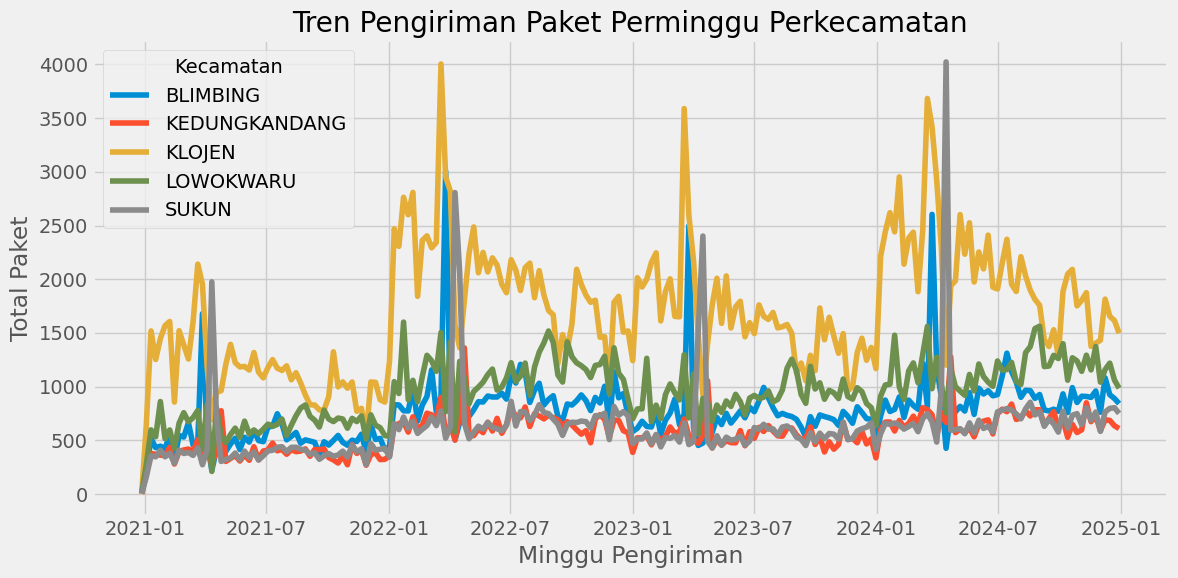

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_kecamatan_weekly, x='Tgl_Kirim', y='total paket', hue='Kecamatan')
plt.title('Tren Pengiriman Paket Perminggu Perkecamatan')
plt.xlabel('Minggu Pengiriman')
plt.ylabel('Total Paket')
plt.legend(title='Kecamatan')
plt.grid(True)
plt.tight_layout()
plt.show()

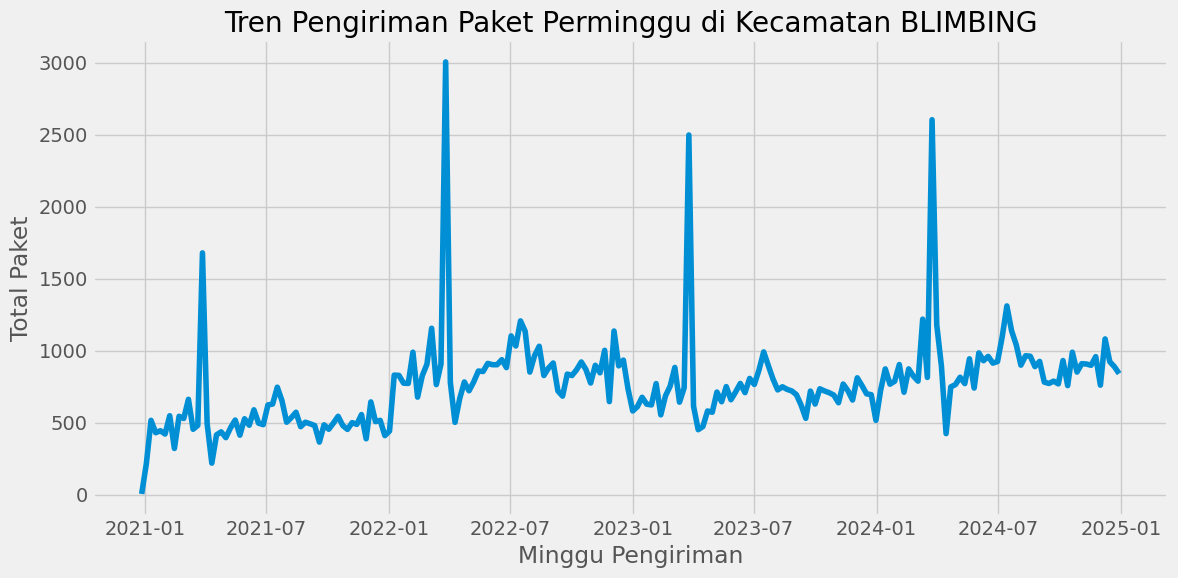

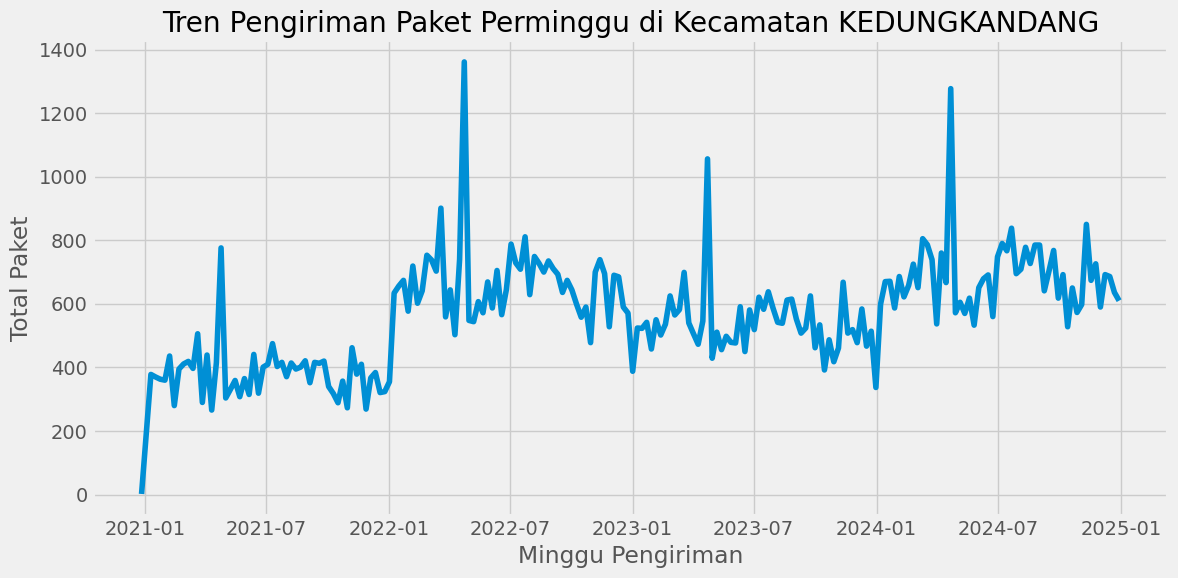

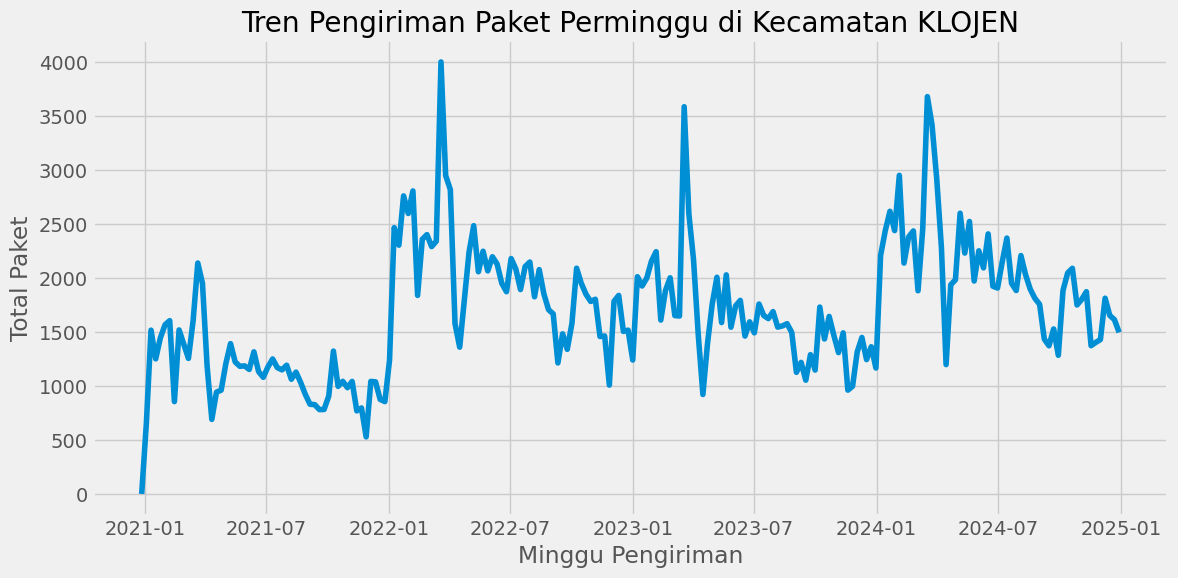

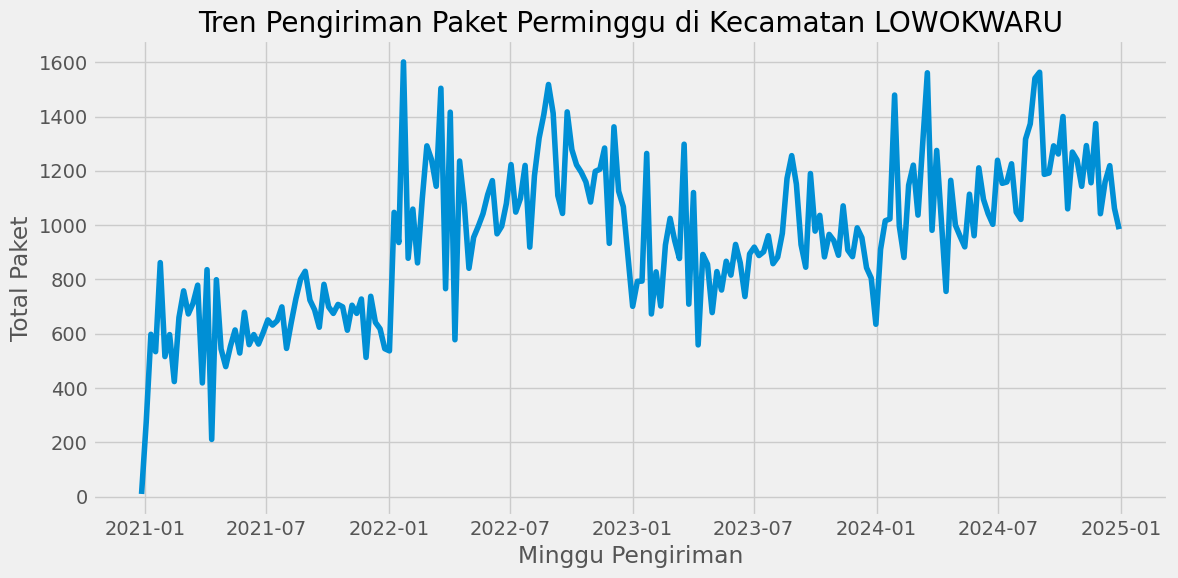

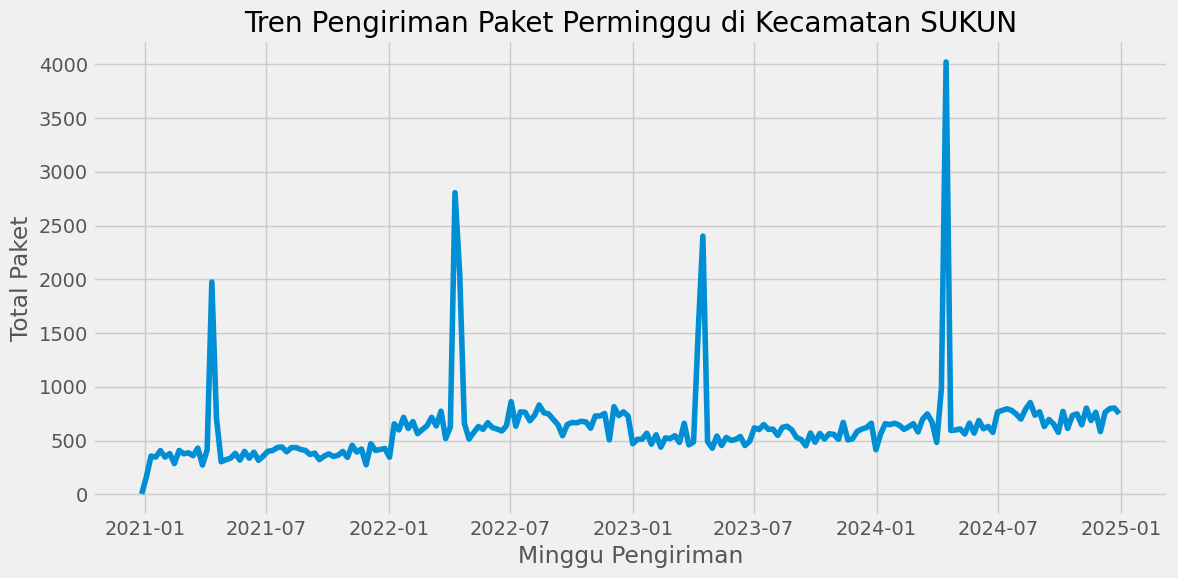

In [11]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x='Tgl_Kirim', y='total paket')
    plt.title(f'Tren Pengiriman Paket Perminggu di Kecamatan {kecamatan}')
    plt.xlabel('Minggu Pengiriman')
    plt.ylabel('Total Paket')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Split data 80% train dan 20% test
2021 - 2023 data training dan 2024 data testing

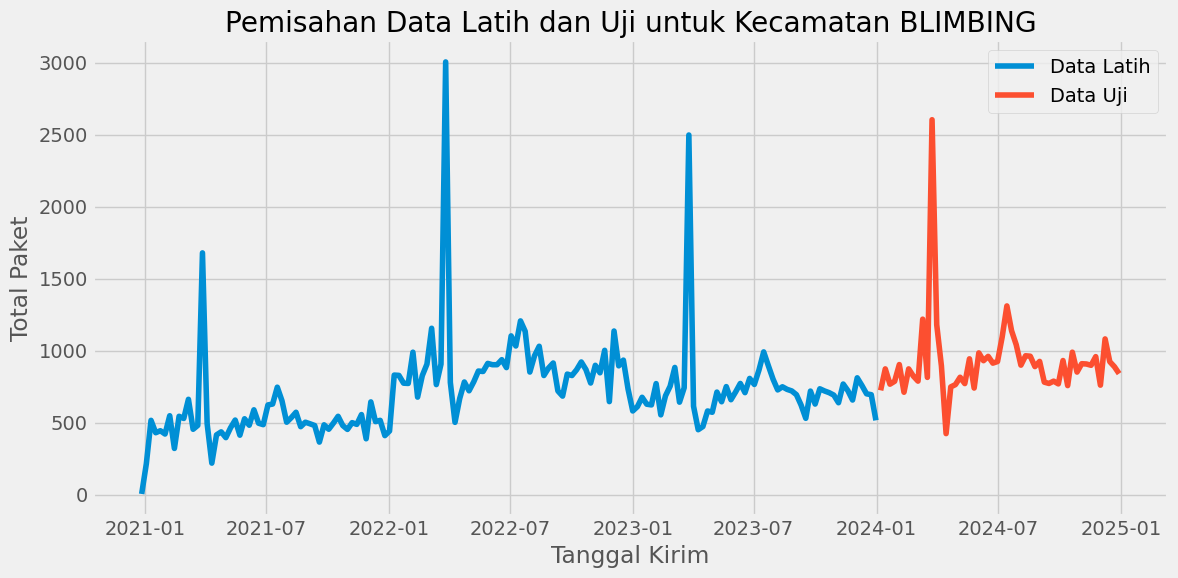

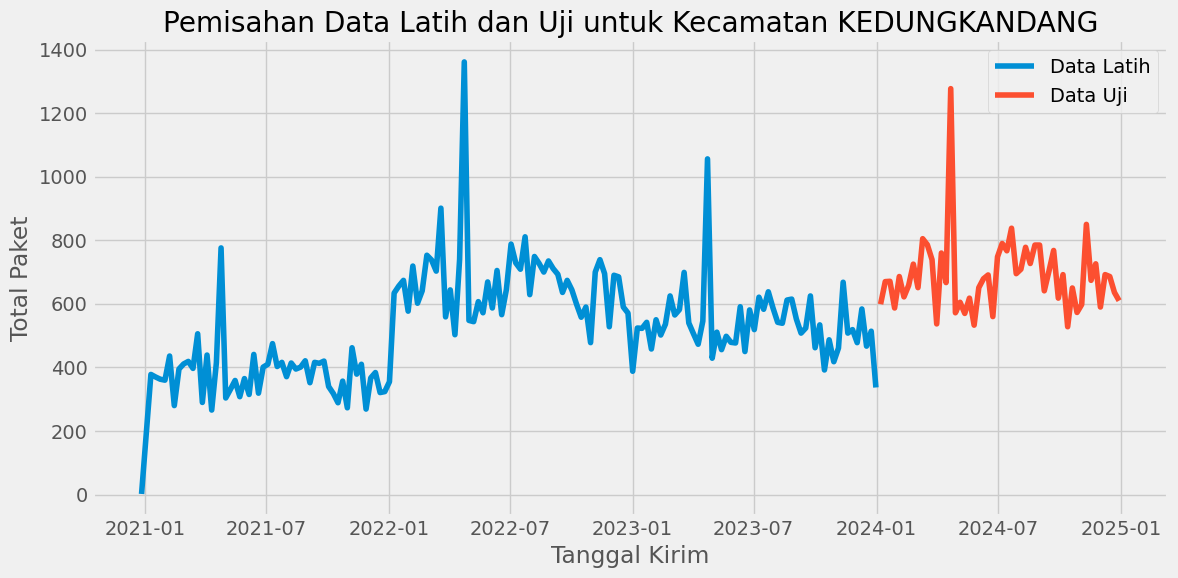

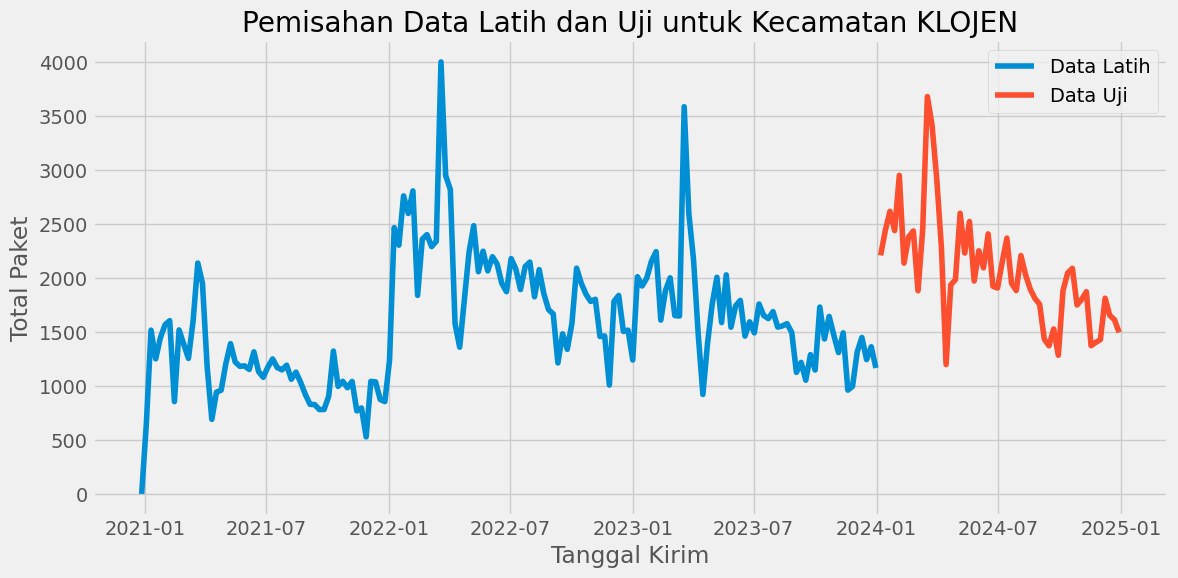

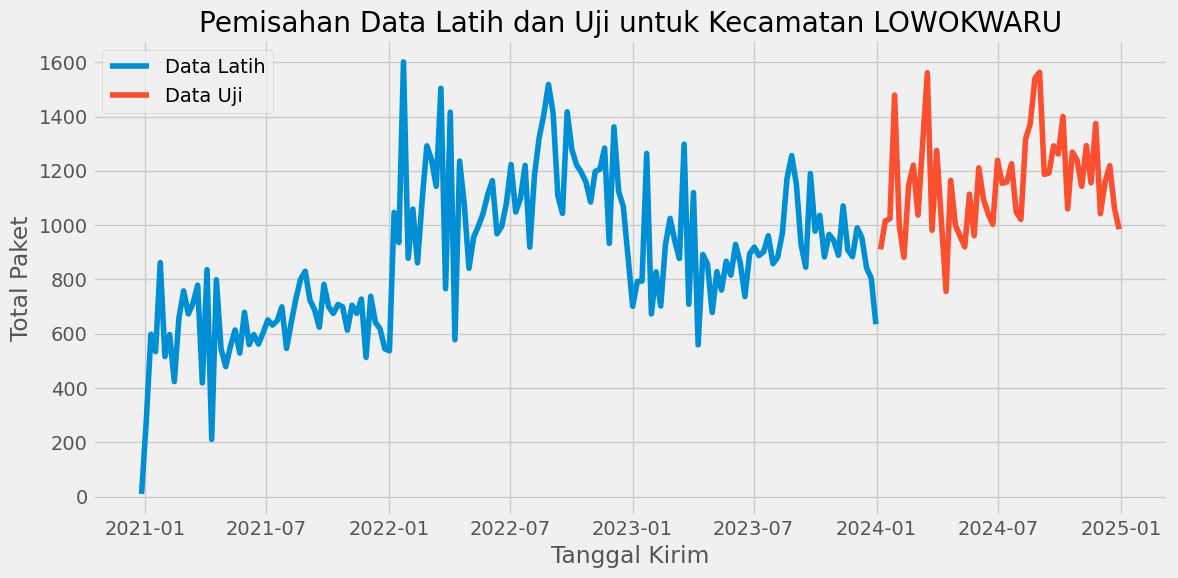

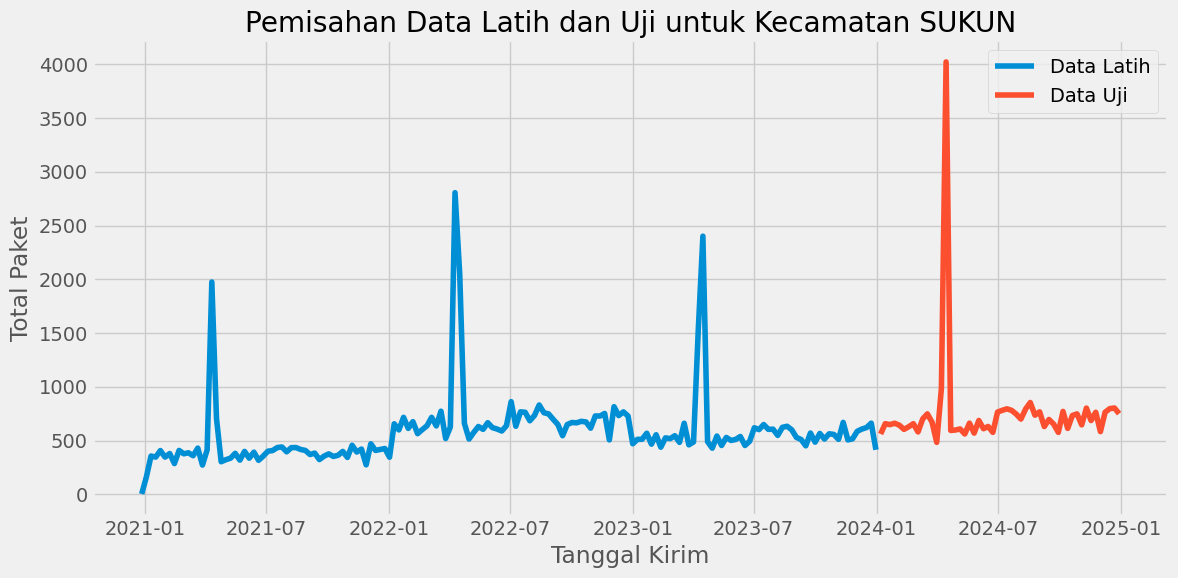

In [12]:
unique_kecamatan = df_kecamatan_weekly['Kecamatan'].unique()

for kecamatan in unique_kecamatan:
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan]

    split_point_kecamatan = len(df_filtered_kecamatan) - 52

    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan]
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=train_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Latih')
    sns.lineplot(data=test_kecamatan, x='Tgl_Kirim', y='total paket', label='Data Uji')
    plt.title(f'Pemisahan Data Latih dan Uji untuk Kecamatan {kecamatan}')
    plt.xlabel('Tanggal Kirim')
    plt.ylabel('Total Paket')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Grid Search untuk mendari parameter terbaik untuk prophet (Cukup Sekali, jangan run lagi, lamaaaa)

In [22]:
# Grid Search untuk Optimasi Hyperparameter Prophet (Comprehensive)
print("Memulai Grid Search KOMPREHENSIF untuk Optimasi Hyperparameter Prophet")

# Define parameter grid yang lebih lengkap dan detail
param_grid = {
    'changepoint_prior_scale': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0],
    'seasonality_prior_scale': [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 15.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 25, 50, 75, 100, 150]
}

# Informasi tentang parameter grid
total_possible_combinations = (len(param_grid['changepoint_prior_scale']) * 
                               len(param_grid['seasonality_prior_scale']) * 
                               len(param_grid['seasonality_mode']) * 
                               len(param_grid['n_changepoints']))

print(f"\nParameter Grid:")
print(f"   • changepoint_prior_scale: {len(param_grid['changepoint_prior_scale'])} nilai")
print(f"   • seasonality_prior_scale: {len(param_grid['seasonality_prior_scale'])} nilai")
print(f"   • seasonality_mode: {len(param_grid['seasonality_mode'])} nilai")
print(f"   • n_changepoints: {len(param_grid['n_changepoints'])} nilai")
print(f"\nTotal kombinasi yang akan diuji: {total_possible_combinations}")
print(f"Estimasi waktu per kecamatan: ~{total_possible_combinations * 2 / 60:.1f} menit")
print("="*70)

# Dictionary untuk menyimpan hasil optimasi
optimization_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2020, 2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*70}")
    print(f"Optimasi untuk Kecamatan: {kecamatan}")
    print(f"{'='*70}")
    
    # Filter dan split data
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    best_mape = float('inf')
    best_params = None
    best_metrics = None
    
    # Generate semua kombinasi parameter
    all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]
    total_combinations = len(all_params)
    
    print(f"Total kombinasi parameter: {total_combinations}")
    print(f"Memulai evaluasi...\n")
    
    for idx, params in enumerate(all_params, 1):
        try:
            # Inisialisasi model dengan parameter saat ini
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                holidays=holidays,
                changepoint_prior_scale=params['changepoint_prior_scale'],
                seasonality_prior_scale=params['seasonality_prior_scale'],
                seasonality_mode=params['seasonality_mode'],
                n_changepoints=params['n_changepoints']
            )
            
            # Training
            model.fit(train_prophet)
            
            # Prediksi
            future = model.make_future_dataframe(periods=52, freq='W')
            forecast = model.predict(future)
            test_predictions = forecast.tail(52)
            
            # Evaluasi
            y_true = test_kecamatan['total paket'].values
            y_pred = test_predictions['yhat'].values
            
            mape = mean_absolute_percentage_error(y_true, y_pred) * 100
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            
            # Update best params jika lebih baik
            if mape < best_mape:
                best_mape = mape
                best_params = params.copy()
                best_metrics = {
                    'MAPE': mape,
                    'MAE': mae,
                    'RMSE': rmse
                }
                print(f"===[{idx}/{total_combinations}] MAPE TERBAIK BARU: {mape:.4f}%")
                print(f"   Params: changepoint={params['changepoint_prior_scale']}, " +
                      f"seasonality={params['seasonality_prior_scale']}, " +
                      f"mode={params['seasonality_mode']}, n_cp={params['n_changepoints']}")
            
            # Progress setiap 50 iterasi untuk menghindari terlalu banyak output
            if idx % 50 == 0:
                print(f"   Progress: {idx}/{total_combinations} ({idx/total_combinations*100:.1f}%) - " +
                      f"Best MAPE: {best_mape:.4f}%")
                
        except Exception as e:
            print(f"Error pada kombinasi {idx}: {str(e)}")
            continue
    
    # Simpan hasil optimasi
    optimization_results[kecamatan] = {
        'best_params': best_params,
        'best_metrics': best_metrics
    }
    
    # Status berdasarkan MAPE
    if best_mape < 10:
        status = "Sangat Baik"
    elif best_mape < 20:
        status = "Baik"
    elif best_mape < 50:
        status = "Cukup"
    else:
        status = "Buruk"
    
    print(f"\n{'='*70}")
    print(f"HASIL OPTIMASI TERBAIK untuk {kecamatan}")
    print(f"{'='*70}")
    print(f"✓ Best MAPE: {best_mape:.4f}% ({status})")
    print(f"✓ Best MAE: {best_metrics['MAE']:.2f}")
    print(f"✓ Best RMSE: {best_metrics['RMSE']:.2f}")
    print(f"\nBest Hyperparameters:")
    print(f"   • changepoint_prior_scale: {best_params['changepoint_prior_scale']}")
    print(f"   • seasonality_prior_scale: {best_params['seasonality_prior_scale']}")
    print(f"   • seasonality_mode: {best_params['seasonality_mode']}")
    print(f"   • n_changepoints: {best_params['n_changepoints']}")

# Summary hasil optimasi
print(f"\n{'='*70}")
print("RINGKASAN HASIL OPTIMASI - SEMUA KECAMATAN")
print(f"{'='*70}\n")

# Format hasil untuk ditampilkan
optimal_params_summary = {}
for kec, result in optimization_results.items():
    optimal_params_summary[kec] = result['best_params']
    optimal_params_summary[kec]['MAPE'] = result['best_metrics']['MAPE']

summary_df = pd.DataFrame(optimal_params_summary).T
print(summary_df.round(4))

# Tambahkan informasi statistik detail
print(f"\n{'='*70}")
print("STATISTIK HASIL OPTIMASI")
print(f"{'='*70}")
print(f"Rata-rata MAPE: {summary_df['MAPE'].mean():.4f}%")
print(f"MAPE Terbaik: {summary_df['MAPE'].min():.4f}% ({summary_df['MAPE'].idxmin()})")
print(f"MAPE Terburuk: {summary_df['MAPE'].max():.4f}% ({summary_df['MAPE'].idxmax()})")
print(f"Standar Deviasi MAPE: {summary_df['MAPE'].std():.4f}%")

# Export hasil optimasi ke JSON
output_json = '../data/optimal_params.json'
with open(output_json, 'w') as f:
    json.dump(optimal_params_summary, f, indent=4)
print(f"\nHasil optimasi disimpan di: {output_json}")

print(f"\n{'='*70}")
print("Grid Search Optimasi SELESAI!")
print(f"{'='*70}")

Memulai Grid Search KOMPREHENSIF untuk Optimasi Hyperparameter Prophet

Parameter Grid:
   • changepoint_prior_scale: 10 nilai
   • seasonality_prior_scale: 8 nilai
   • seasonality_mode: 2 nilai
   • n_changepoints: 6 nilai

Total kombinasi yang akan diuji: 960
Estimasi waktu per kecamatan: ~32.0 menit

Optimasi untuk Kecamatan: BLIMBING
Total kombinasi parameter: 960
Memulai evaluasi...



11:12:16 - cmdstanpy - INFO - Chain [1] start processing
11:12:16 - cmdstanpy - INFO - Chain [1] done processing
11:12:16 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:16 - cmdstanpy - INFO - Chain [1] done processing
11:12:16 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:16 - cmdstanpy - INFO - Chain [1] start processing
11:12:16 - cmdstanpy - INFO - Chain [1] start processing
11:12:17 - cmdstanpy - INFO - Chain [1] done processing
11:12:17 - cmdstanpy - INFO - Chain [1] done processing


===[1/960] MAPE TERBAIK BARU: 11.3313%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=10


11:12:18 - cmdstanpy - INFO - Chain [1] start processing
11:12:18 - cmdstanpy - INFO - Chain [1] done processing
11:12:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:18 - cmdstanpy - INFO - Chain [1] done processing
11:12:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:18 - cmdstanpy - INFO - Chain [1] start processing
11:12:18 - cmdstanpy - INFO - Chain [1] start processing
11:12:20 - cmdstanpy - INFO - Chain [1] done processing
11:12:20 - cmdstanpy - INFO - Chain [1] done processing
11:12:20 - cmdstanpy - INFO - Chain [1] start processing
11:12:20 - cmdstanpy - INFO - Chain [1] start processing
11:12:20 - cmdstanpy - INFO - Chain [1] done processing
11:12:20 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:20 - c

===[3/960] MAPE TERBAIK BARU: 11.2362%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=50


11:12:23 - cmdstanpy - INFO - Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
11:12:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
11:12:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:23 - cmdstanpy - INFO - Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] start processing
11:12:28 - cmdstanpy - INFO - Chain [1] done processing
11:12:28 - cmdstanpy - INFO - Chain [1] done processing


===[4/960] MAPE TERBAIK BARU: 11.2157%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=75


11:12:29 - cmdstanpy - INFO - Chain [1] start processing
11:12:29 - cmdstanpy - INFO - Chain [1] done processing
11:12:29 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:29 - cmdstanpy - INFO - Chain [1] done processing
11:12:29 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:29 - cmdstanpy - INFO - Chain [1] start processing
11:12:29 - cmdstanpy - INFO - Chain [1] start processing
11:12:42 - cmdstanpy - INFO - Chain [1] done processing
11:12:42 - cmdstanpy - INFO - Chain [1] done processing
11:12:43 - cmdstanpy - INFO - Chain [1] start processing
11:12:43 - cmdstanpy - INFO - Chain [1] start processing
11:12:43 - cmdstanpy - INFO - Chain [1] done processing
11:12:43 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:12:43 - c

===[41/960] MAPE TERBAIK BARU: 11.0105%
   Params: changepoint=0.001, seasonality=0.5, mode=additive, n_cp=100


11:17:44 - cmdstanpy - INFO - Chain [1] start processing
11:17:44 - cmdstanpy - INFO - Chain [1] done processing
11:17:44 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:44 - cmdstanpy - INFO - Chain [1] done processing
11:17:44 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:44 - cmdstanpy - INFO - Chain [1] start processing
11:17:44 - cmdstanpy - INFO - Chain [1] start processing
11:17:56 - cmdstanpy - INFO - Chain [1] done processing
11:17:56 - cmdstanpy - INFO - Chain [1] done processing


===[42/960] MAPE TERBAIK BARU: 11.0018%
   Params: changepoint=0.001, seasonality=0.5, mode=additive, n_cp=150


11:17:56 - cmdstanpy - INFO - Chain [1] start processing
11:17:56 - cmdstanpy - INFO - Chain [1] done processing
11:17:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:56 - cmdstanpy - INFO - Chain [1] done processing
11:17:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:56 - cmdstanpy - INFO - Chain [1] start processing
11:17:56 - cmdstanpy - INFO - Chain [1] start processing
11:17:58 - cmdstanpy - INFO - Chain [1] done processing
11:17:58 - cmdstanpy - INFO - Chain [1] done processing
11:17:59 - cmdstanpy - INFO - Chain [1] start processing
11:17:59 - cmdstanpy - INFO - Chain [1] start processing
11:17:59 - cmdstanpy - INFO - Chain [1] done processing
11:17:59 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:17:59 - c

   Progress: 50/960 (5.2%) - Best MAPE: 11.0018%


11:19:09 - cmdstanpy - INFO - Chain [1] start processing
11:19:09 - cmdstanpy - INFO - Chain [1] done processing
11:19:09 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:19:09 - cmdstanpy - INFO - Chain [1] done processing
11:19:09 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:19:10 - cmdstanpy - INFO - Chain [1] start processing
11:19:10 - cmdstanpy - INFO - Chain [1] start processing
11:19:12 - cmdstanpy - INFO - Chain [1] done processing
11:19:12 - cmdstanpy - INFO - Chain [1] done processing
11:19:13 - cmdstanpy - INFO - Chain [1] start processing
11:19:13 - cmdstanpy - INFO - Chain [1] start processing
11:19:13 - cmdstanpy - INFO - Chain [1] done processing
11:19:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:19:13 - c

   Progress: 100/960 (10.4%) - Best MAPE: 11.0018%


11:23:58 - cmdstanpy - INFO - Chain [1] start processing
11:23:58 - cmdstanpy - INFO - Chain [1] done processing
11:23:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:23:58 - cmdstanpy - INFO - Chain [1] done processing
11:23:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:23:58 - cmdstanpy - INFO - Chain [1] start processing
11:23:58 - cmdstanpy - INFO - Chain [1] start processing
11:24:05 - cmdstanpy - INFO - Chain [1] done processing
11:24:05 - cmdstanpy - INFO - Chain [1] done processing
11:24:05 - cmdstanpy - INFO - Chain [1] start processing
11:24:05 - cmdstanpy - INFO - Chain [1] start processing
11:24:05 - cmdstanpy - INFO - Chain [1] done processing
11:24:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:24:05 - c

   Progress: 150/960 (15.6%) - Best MAPE: 11.0018%


11:27:40 - cmdstanpy - INFO - Chain [1] start processing
11:27:40 - cmdstanpy - INFO - Chain [1] done processing
11:27:40 - cmdstanpy - INFO - Chain [1] done processing
11:27:40 - cmdstanpy - INFO - Chain [1] start processing
11:27:40 - cmdstanpy - INFO - Chain [1] start processing
11:27:40 - cmdstanpy - INFO - Chain [1] done processing
11:27:40 - cmdstanpy - INFO - Chain [1] done processing
11:27:41 - cmdstanpy - INFO - Chain [1] start processing
11:27:41 - cmdstanpy - INFO - Chain [1] start processing
11:27:41 - cmdstanpy - INFO - Chain [1] done processing
11:27:41 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:27:41 - cmdstanpy - INFO - Chain [1] done processing
11:27:41 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:27:41 - cmdstanpy - INFO - Chain [1] start processing
11:27:41 - cmdstanpy - INFO - Chain [1] 

===[193/960] MAPE TERBAIK BARU: 10.7970%
   Params: changepoint=0.01, seasonality=0.01, mode=additive, n_cp=10


11:31:53 - cmdstanpy - INFO - Chain [1] start processing
11:31:53 - cmdstanpy - INFO - Chain [1] done processing
11:31:53 - cmdstanpy - INFO - Chain [1] done processing
11:31:54 - cmdstanpy - INFO - Chain [1] start processing
11:31:54 - cmdstanpy - INFO - Chain [1] start processing
11:31:54 - cmdstanpy - INFO - Chain [1] done processing
11:31:54 - cmdstanpy - INFO - Chain [1] done processing
11:31:55 - cmdstanpy - INFO - Chain [1] start processing
11:31:55 - cmdstanpy - INFO - Chain [1] start processing
11:31:55 - cmdstanpy - INFO - Chain [1] done processing
11:31:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:31:55 - cmdstanpy - INFO - Chain [1] done processing
11:31:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:31:55 - cmdstanpy - INFO - Chain [1] start processing
11:31:55 - cmdstanpy - INFO - Chain [1] 

   Progress: 200/960 (20.8%) - Best MAPE: 10.7970%


11:32:23 - cmdstanpy - INFO - Chain [1] start processing
11:32:23 - cmdstanpy - INFO - Chain [1] done processing
11:32:23 - cmdstanpy - INFO - Chain [1] done processing
11:32:24 - cmdstanpy - INFO - Chain [1] start processing
11:32:24 - cmdstanpy - INFO - Chain [1] start processing
11:32:24 - cmdstanpy - INFO - Chain [1] done processing
11:32:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:32:24 - cmdstanpy - INFO - Chain [1] done processing
11:32:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:32:24 - cmdstanpy - INFO - Chain [1] start processing
11:32:24 - cmdstanpy - INFO - Chain [1] start processing
11:32:28 - cmdstanpy - INFO - Chain [1] done processing
11:32:28 - cmdstanpy - INFO - Chain [1] done processing
11:32:29 - cmdstanpy - INFO - Chain [1] start processing
11:32:29 - cmdstanpy - INFO - Chain [1] 

===[205/960] MAPE TERBAIK BARU: 10.7347%
   Params: changepoint=0.01, seasonality=0.05, mode=additive, n_cp=10


11:32:47 - cmdstanpy - INFO - Chain [1] start processing
11:32:47 - cmdstanpy - INFO - Chain [1] done processing
11:32:47 - cmdstanpy - INFO - Chain [1] done processing
11:32:47 - cmdstanpy - INFO - Chain [1] start processing
11:32:47 - cmdstanpy - INFO - Chain [1] start processing
11:32:48 - cmdstanpy - INFO - Chain [1] done processing
11:32:48 - cmdstanpy - INFO - Chain [1] done processing
11:32:48 - cmdstanpy - INFO - Chain [1] start processing
11:32:48 - cmdstanpy - INFO - Chain [1] start processing
11:32:48 - cmdstanpy - INFO - Chain [1] done processing
11:32:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:32:48 - cmdstanpy - INFO - Chain [1] done processing
11:32:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:32:49 - cmdstanpy - INFO - Chain [1] start processing
11:32:49 - cmdstanpy - INFO - Chain [1] 

   Progress: 250/960 (26.0%) - Best MAPE: 10.7347%


11:36:26 - cmdstanpy - INFO - Chain [1] start processing
11:36:26 - cmdstanpy - INFO - Chain [1] done processing
11:36:26 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:36:26 - cmdstanpy - INFO - Chain [1] done processing
11:36:26 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:36:26 - cmdstanpy - INFO - Chain [1] start processing
11:36:26 - cmdstanpy - INFO - Chain [1] start processing
11:36:35 - cmdstanpy - INFO - Chain [1] done processing
11:36:35 - cmdstanpy - INFO - Chain [1] done processing
11:36:36 - cmdstanpy - INFO - Chain [1] start processing
11:36:36 - cmdstanpy - INFO - Chain [1] start processing
11:36:36 - cmdstanpy - INFO - Chain [1] done processing
11:36:36 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:36:36 - c

   Progress: 300/960 (31.2%) - Best MAPE: 10.7347%


11:41:48 - cmdstanpy - INFO - Chain [1] start processing
11:41:48 - cmdstanpy - INFO - Chain [1] done processing
11:41:48 - cmdstanpy - INFO - Chain [1] done processing
11:41:49 - cmdstanpy - INFO - Chain [1] start processing
11:41:49 - cmdstanpy - INFO - Chain [1] start processing
11:41:49 - cmdstanpy - INFO - Chain [1] done processing
11:41:49 - cmdstanpy - INFO - Chain [1] done processing
11:41:50 - cmdstanpy - INFO - Chain [1] start processing
11:41:50 - cmdstanpy - INFO - Chain [1] start processing
11:41:50 - cmdstanpy - INFO - Chain [1] done processing
11:41:50 - cmdstanpy - INFO - Chain [1] done processing
11:41:50 - cmdstanpy - INFO - Chain [1] start processing
11:41:50 - cmdstanpy - INFO - Chain [1] start processing
11:41:50 - cmdstanpy - INFO - Chain [1] done processing
11:41:50 - cmdstanpy - INFO - Chain [1] done processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1] start processing
11:41:51 - cmdstanpy - INFO - Chain [1]

   Progress: 350/960 (36.5%) - Best MAPE: 10.7347%


11:42:28 - cmdstanpy - INFO - Chain [1] start processing
11:42:28 - cmdstanpy - INFO - Chain [1] done processing
11:42:28 - cmdstanpy - INFO - Chain [1] done processing
11:42:29 - cmdstanpy - INFO - Chain [1] start processing
11:42:29 - cmdstanpy - INFO - Chain [1] start processing
11:42:29 - cmdstanpy - INFO - Chain [1] done processing
11:42:29 - cmdstanpy - INFO - Chain [1] done processing
11:42:30 - cmdstanpy - INFO - Chain [1] start processing
11:42:30 - cmdstanpy - INFO - Chain [1] start processing
11:42:30 - cmdstanpy - INFO - Chain [1] done processing
11:42:30 - cmdstanpy - INFO - Chain [1] done processing
11:42:31 - cmdstanpy - INFO - Chain [1] start processing
11:42:31 - cmdstanpy - INFO - Chain [1] start processing
11:42:31 - cmdstanpy - INFO - Chain [1] done processing
11:42:31 - cmdstanpy - INFO - Chain [1] done processing
11:42:32 - cmdstanpy - INFO - Chain [1] start processing
11:42:32 - cmdstanpy - INFO - Chain [1] start processing
11:42:32 - cmdstanpy - INFO - Chain [1]

   Progress: 400/960 (41.7%) - Best MAPE: 10.7347%


11:43:07 - cmdstanpy - INFO - Chain [1] start processing
11:43:07 - cmdstanpy - INFO - Chain [1] done processing
11:43:07 - cmdstanpy - INFO - Chain [1] done processing
11:43:08 - cmdstanpy - INFO - Chain [1] start processing
11:43:08 - cmdstanpy - INFO - Chain [1] start processing
11:43:08 - cmdstanpy - INFO - Chain [1] done processing
11:43:08 - cmdstanpy - INFO - Chain [1] done processing
11:43:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:09 - cmdstanpy - INFO - Chain [1] done processing
11:43:09 - cmdstanpy - INFO - Chain [1] done processing
11:43:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] done processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1] start processing
11:43:10 - cmdstanpy - INFO - Chain [1]

   Progress: 450/960 (46.9%) - Best MAPE: 10.7347%


11:43:49 - cmdstanpy - INFO - Chain [1] start processing
11:43:49 - cmdstanpy - INFO - Chain [1] done processing
11:43:49 - cmdstanpy - INFO - Chain [1] done processing
11:43:50 - cmdstanpy - INFO - Chain [1] start processing
11:43:50 - cmdstanpy - INFO - Chain [1] start processing
11:43:50 - cmdstanpy - INFO - Chain [1] done processing
11:43:50 - cmdstanpy - INFO - Chain [1] done processing
11:43:51 - cmdstanpy - INFO - Chain [1] start processing
11:43:51 - cmdstanpy - INFO - Chain [1] start processing
11:43:51 - cmdstanpy - INFO - Chain [1] done processing
11:43:51 - cmdstanpy - INFO - Chain [1] done processing
11:43:51 - cmdstanpy - INFO - Chain [1] start processing
11:43:51 - cmdstanpy - INFO - Chain [1] start processing
11:43:51 - cmdstanpy - INFO - Chain [1] done processing
11:43:51 - cmdstanpy - INFO - Chain [1] done processing
11:43:52 - cmdstanpy - INFO - Chain [1] start processing
11:43:52 - cmdstanpy - INFO - Chain [1] start processing
11:43:52 - cmdstanpy - INFO - Chain [1]

   Progress: 500/960 (52.1%) - Best MAPE: 10.7347%


11:44:32 - cmdstanpy - INFO - Chain [1] start processing
11:44:32 - cmdstanpy - INFO - Chain [1] done processing
11:44:32 - cmdstanpy - INFO - Chain [1] done processing
11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1] done processing
11:44:33 - cmdstanpy - INFO - Chain [1] done processing
11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1] start processing
11:44:33 - cmdstanpy - INFO - Chain [1] done processing
11:44:33 - cmdstanpy - INFO - Chain [1] done processing
11:44:34 - cmdstanpy - INFO - Chain [1] start processing
11:44:34 - cmdstanpy - INFO - Chain [1] start processing
11:44:34 - cmdstanpy - INFO - Chain [1] done processing
11:44:34 - cmdstanpy - INFO - Chain [1] done processing
11:44:35 - cmdstanpy - INFO - Chain [1] start processing
11:44:35 - cmdstanpy - INFO - Chain [1] start processing
11:44:35 - cmdstanpy - INFO - Chain [1]

   Progress: 550/960 (57.3%) - Best MAPE: 10.7347%


11:45:16 - cmdstanpy - INFO - Chain [1] start processing
11:45:17 - cmdstanpy - INFO - Chain [1] done processing
11:45:17 - cmdstanpy - INFO - Chain [1] done processing
11:45:18 - cmdstanpy - INFO - Chain [1] start processing
11:45:18 - cmdstanpy - INFO - Chain [1] start processing
11:45:18 - cmdstanpy - INFO - Chain [1] done processing
11:45:18 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] start processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:19 - cmdstanpy - INFO - Chain [1] done processing
11:45:20 - cmdstanpy - INFO - Chain [1] start processing
11:45:20 - cmdstanpy - INFO - Chain [1] start processing
11:45:20 - cmdstanpy - INFO - Chain [1] done processing
11:45:20 - cmdstanpy - INFO - Chain [1] done processing
11:45:20 - cmdstanpy - INFO - Chain [1] start processing
11:45:20 - cmdstanpy - INFO - Chain [1] start processing
11:45:21 - cmdstanpy - INFO - Chain [1]

   Progress: 600/960 (62.5%) - Best MAPE: 10.7347%


11:46:07 - cmdstanpy - INFO - Chain [1] start processing
11:46:08 - cmdstanpy - INFO - Chain [1] done processing
11:46:08 - cmdstanpy - INFO - Chain [1] done processing
11:46:08 - cmdstanpy - INFO - Chain [1] start processing
11:46:08 - cmdstanpy - INFO - Chain [1] start processing
11:46:09 - cmdstanpy - INFO - Chain [1] done processing
11:46:09 - cmdstanpy - INFO - Chain [1] done processing
11:46:09 - cmdstanpy - INFO - Chain [1] start processing
11:46:09 - cmdstanpy - INFO - Chain [1] start processing
11:46:09 - cmdstanpy - INFO - Chain [1] done processing
11:46:09 - cmdstanpy - INFO - Chain [1] done processing
11:46:10 - cmdstanpy - INFO - Chain [1] start processing
11:46:10 - cmdstanpy - INFO - Chain [1] start processing
11:46:10 - cmdstanpy - INFO - Chain [1] done processing
11:46:10 - cmdstanpy - INFO - Chain [1] done processing
11:46:11 - cmdstanpy - INFO - Chain [1] start processing
11:46:11 - cmdstanpy - INFO - Chain [1] start processing
11:46:11 - cmdstanpy - INFO - Chain [1]

   Progress: 650/960 (67.7%) - Best MAPE: 10.7347%


11:46:59 - cmdstanpy - INFO - Chain [1] start processing
11:46:59 - cmdstanpy - INFO - Chain [1] done processing
11:46:59 - cmdstanpy - INFO - Chain [1] done processing
11:47:00 - cmdstanpy - INFO - Chain [1] start processing
11:47:00 - cmdstanpy - INFO - Chain [1] start processing
11:47:00 - cmdstanpy - INFO - Chain [1] done processing
11:47:00 - cmdstanpy - INFO - Chain [1] done processing
11:47:01 - cmdstanpy - INFO - Chain [1] start processing
11:47:01 - cmdstanpy - INFO - Chain [1] start processing
11:47:01 - cmdstanpy - INFO - Chain [1] done processing
11:47:01 - cmdstanpy - INFO - Chain [1] done processing
11:47:02 - cmdstanpy - INFO - Chain [1] start processing
11:47:02 - cmdstanpy - INFO - Chain [1] start processing
11:47:02 - cmdstanpy - INFO - Chain [1] done processing
11:47:02 - cmdstanpy - INFO - Chain [1] done processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:03 - cmdstanpy - INFO - Chain [1] start processing
11:47:03 - cmdstanpy - INFO - Chain [1]

   Progress: 700/960 (72.9%) - Best MAPE: 10.7347%


11:47:49 - cmdstanpy - INFO - Chain [1] start processing
11:47:49 - cmdstanpy - INFO - Chain [1] done processing
11:47:49 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] start processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:50 - cmdstanpy - INFO - Chain [1] done processing
11:47:51 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1] start processing
11:47:51 - cmdstanpy - INFO - Chain [1] done processing
11:47:51 - cmdstanpy - INFO - Chain [1] done processing
11:47:52 - cmdstanpy - INFO - Chain [1] start processing
11:47:52 - cmdstanpy - INFO - Chain [1] start processing
11:47:52 - cmdstanpy - INFO - Chain [1]

   Progress: 750/960 (78.1%) - Best MAPE: 10.7347%


11:48:34 - cmdstanpy - INFO - Chain [1] start processing
11:48:34 - cmdstanpy - INFO - Chain [1] done processing
11:48:34 - cmdstanpy - INFO - Chain [1] done processing
11:48:35 - cmdstanpy - INFO - Chain [1] start processing
11:48:35 - cmdstanpy - INFO - Chain [1] start processing
11:48:35 - cmdstanpy - INFO - Chain [1] done processing
11:48:35 - cmdstanpy - INFO - Chain [1] done processing
11:48:36 - cmdstanpy - INFO - Chain [1] start processing
11:48:36 - cmdstanpy - INFO - Chain [1] start processing
11:48:36 - cmdstanpy - INFO - Chain [1] done processing
11:48:36 - cmdstanpy - INFO - Chain [1] done processing
11:48:37 - cmdstanpy - INFO - Chain [1] start processing
11:48:37 - cmdstanpy - INFO - Chain [1] start processing
11:48:37 - cmdstanpy - INFO - Chain [1] done processing
11:48:37 - cmdstanpy - INFO - Chain [1] done processing
11:48:38 - cmdstanpy - INFO - Chain [1] start processing
11:48:38 - cmdstanpy - INFO - Chain [1] start processing
11:48:38 - cmdstanpy - INFO - Chain [1]

===[793/960] MAPE TERBAIK BARU: 10.7220%
   Params: changepoint=0.8, seasonality=0.1, mode=additive, n_cp=10


11:49:12 - cmdstanpy - INFO - Chain [1] start processing
11:49:12 - cmdstanpy - INFO - Chain [1] done processing
11:49:12 - cmdstanpy - INFO - Chain [1] done processing
11:49:13 - cmdstanpy - INFO - Chain [1] start processing
11:49:13 - cmdstanpy - INFO - Chain [1] start processing
11:49:13 - cmdstanpy - INFO - Chain [1] done processing
11:49:13 - cmdstanpy - INFO - Chain [1] done processing
11:49:14 - cmdstanpy - INFO - Chain [1] start processing
11:49:14 - cmdstanpy - INFO - Chain [1] start processing
11:49:14 - cmdstanpy - INFO - Chain [1] done processing
11:49:14 - cmdstanpy - INFO - Chain [1] done processing
11:49:15 - cmdstanpy - INFO - Chain [1] start processing
11:49:15 - cmdstanpy - INFO - Chain [1] start processing
11:49:15 - cmdstanpy - INFO - Chain [1] done processing
11:49:15 - cmdstanpy - INFO - Chain [1] done processing
11:49:15 - cmdstanpy - INFO - Chain [1] start processing
11:49:15 - cmdstanpy - INFO - Chain [1] start processing
11:49:16 - cmdstanpy - INFO - Chain [1]

   Progress: 800/960 (83.3%) - Best MAPE: 10.7220%


11:49:18 - cmdstanpy - INFO - Chain [1] start processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:18 - cmdstanpy - INFO - Chain [1] done processing
11:49:19 - cmdstanpy - INFO - Chain [1] start processing
11:49:19 - cmdstanpy - INFO - Chain [1] start processing
11:49:20 - cmdstanpy - INFO - Chain [1] done processing
11:49:20 - cmdstanpy - INFO - Chain [1] done processing
11:49:20 - cmdstanpy - INFO - Chain [1] start processing
11:49:20 - cmdstanpy - INFO - Chain [1] start processing
11:49:21 - cmdstanpy - INFO - Chain [1] done processing
11:49:21 - cmdstanpy - INFO - Chain [1] done processing
11:49:22 - cmdstanpy - INFO - Chain [1] start processing
11:49:22 - cmdstanpy - INFO - Chain [1] start processing
11:49:22 - cmdstanpy - INFO - Chain [1] done processing
11:49:22 - cmdstanpy - INFO - Chain [1] done processing
11:49:22 - cmdstanpy - INFO - Chain [1] start processing
11:49:22 - cmdstanpy - INFO - Chain [1] start processing
11:49:23 - cmdstanpy - INFO - Chain [1]

===[805/960] MAPE TERBAIK BARU: 10.6185%
   Params: changepoint=0.8, seasonality=0.5, mode=additive, n_cp=10


11:49:23 - cmdstanpy - INFO - Chain [1] start processing
11:49:23 - cmdstanpy - INFO - Chain [1] done processing
11:49:23 - cmdstanpy - INFO - Chain [1] done processing
11:49:24 - cmdstanpy - INFO - Chain [1] start processing
11:49:24 - cmdstanpy - INFO - Chain [1] start processing
11:49:24 - cmdstanpy - INFO - Chain [1] done processing
11:49:24 - cmdstanpy - INFO - Chain [1] done processing


===[807/960] MAPE TERBAIK BARU: 10.5866%
   Params: changepoint=0.8, seasonality=0.5, mode=additive, n_cp=50


11:49:25 - cmdstanpy - INFO - Chain [1] start processing
11:49:25 - cmdstanpy - INFO - Chain [1] done processing
11:49:25 - cmdstanpy - INFO - Chain [1] done processing
11:49:26 - cmdstanpy - INFO - Chain [1] start processing
11:49:26 - cmdstanpy - INFO - Chain [1] start processing
11:49:26 - cmdstanpy - INFO - Chain [1] done processing
11:49:26 - cmdstanpy - INFO - Chain [1] done processing


===[809/960] MAPE TERBAIK BARU: 10.5323%
   Params: changepoint=0.8, seasonality=0.5, mode=additive, n_cp=100


11:49:27 - cmdstanpy - INFO - Chain [1] start processing
11:49:27 - cmdstanpy - INFO - Chain [1] done processing
11:49:27 - cmdstanpy - INFO - Chain [1] done processing
11:49:28 - cmdstanpy - INFO - Chain [1] start processing
11:49:28 - cmdstanpy - INFO - Chain [1] start processing
11:49:28 - cmdstanpy - INFO - Chain [1] done processing
11:49:28 - cmdstanpy - INFO - Chain [1] done processing
11:49:29 - cmdstanpy - INFO - Chain [1] start processing
11:49:29 - cmdstanpy - INFO - Chain [1] start processing
11:49:29 - cmdstanpy - INFO - Chain [1] done processing
11:49:29 - cmdstanpy - INFO - Chain [1] done processing
11:49:30 - cmdstanpy - INFO - Chain [1] start processing
11:49:30 - cmdstanpy - INFO - Chain [1] start processing
11:49:30 - cmdstanpy - INFO - Chain [1] done processing
11:49:30 - cmdstanpy - INFO - Chain [1] done processing
11:49:31 - cmdstanpy - INFO - Chain [1] start processing
11:49:31 - cmdstanpy - INFO - Chain [1] start processing
11:49:31 - cmdstanpy - INFO - Chain [1]

===[821/960] MAPE TERBAIK BARU: 10.5242%
   Params: changepoint=0.8, seasonality=1.0, mode=additive, n_cp=100


11:49:38 - cmdstanpy - INFO - Chain [1] start processing
11:49:38 - cmdstanpy - INFO - Chain [1] done processing
11:49:38 - cmdstanpy - INFO - Chain [1] done processing
11:49:39 - cmdstanpy - INFO - Chain [1] start processing
11:49:39 - cmdstanpy - INFO - Chain [1] start processing
11:49:39 - cmdstanpy - INFO - Chain [1] done processing
11:49:39 - cmdstanpy - INFO - Chain [1] done processing
11:49:40 - cmdstanpy - INFO - Chain [1] start processing
11:49:40 - cmdstanpy - INFO - Chain [1] start processing
11:49:40 - cmdstanpy - INFO - Chain [1] done processing
11:49:40 - cmdstanpy - INFO - Chain [1] done processing
11:49:41 - cmdstanpy - INFO - Chain [1] start processing
11:49:41 - cmdstanpy - INFO - Chain [1] start processing
11:49:41 - cmdstanpy - INFO - Chain [1] done processing
11:49:41 - cmdstanpy - INFO - Chain [1] done processing
11:49:42 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1] start processing
11:49:42 - cmdstanpy - INFO - Chain [1]

===[833/960] MAPE TERBAIK BARU: 10.4565%
   Params: changepoint=0.8, seasonality=5.0, mode=additive, n_cp=100


11:49:48 - cmdstanpy - INFO - Chain [1] start processing
11:49:49 - cmdstanpy - INFO - Chain [1] done processing
11:49:49 - cmdstanpy - INFO - Chain [1] done processing
11:49:49 - cmdstanpy - INFO - Chain [1] start processing
11:49:49 - cmdstanpy - INFO - Chain [1] start processing
11:49:50 - cmdstanpy - INFO - Chain [1] done processing
11:49:50 - cmdstanpy - INFO - Chain [1] done processing
11:49:50 - cmdstanpy - INFO - Chain [1] start processing
11:49:50 - cmdstanpy - INFO - Chain [1] start processing
11:49:51 - cmdstanpy - INFO - Chain [1] done processing
11:49:51 - cmdstanpy - INFO - Chain [1] done processing
11:49:51 - cmdstanpy - INFO - Chain [1] start processing
11:49:51 - cmdstanpy - INFO - Chain [1] start processing
11:49:52 - cmdstanpy - INFO - Chain [1] done processing
11:49:52 - cmdstanpy - INFO - Chain [1] done processing
11:49:52 - cmdstanpy - INFO - Chain [1] start processing
11:49:52 - cmdstanpy - INFO - Chain [1] start processing
11:49:53 - cmdstanpy - INFO - Chain [1]

   Progress: 850/960 (88.5%) - Best MAPE: 10.4565%


11:50:06 - cmdstanpy - INFO - Chain [1] start processing
11:50:07 - cmdstanpy - INFO - Chain [1] done processing
11:50:07 - cmdstanpy - INFO - Chain [1] done processing
11:50:08 - cmdstanpy - INFO - Chain [1] start processing
11:50:08 - cmdstanpy - INFO - Chain [1] start processing
11:50:09 - cmdstanpy - INFO - Chain [1] done processing
11:50:09 - cmdstanpy - INFO - Chain [1] done processing
11:50:10 - cmdstanpy - INFO - Chain [1] start processing
11:50:10 - cmdstanpy - INFO - Chain [1] start processing
11:50:10 - cmdstanpy - INFO - Chain [1] done processing
11:50:10 - cmdstanpy - INFO - Chain [1] done processing
11:50:11 - cmdstanpy - INFO - Chain [1] start processing
11:50:11 - cmdstanpy - INFO - Chain [1] start processing
11:50:11 - cmdstanpy - INFO - Chain [1] done processing
11:50:11 - cmdstanpy - INFO - Chain [1] done processing
11:50:11 - cmdstanpy - INFO - Chain [1] start processing
11:50:11 - cmdstanpy - INFO - Chain [1] start processing
11:50:12 - cmdstanpy - INFO - Chain [1]

===[889/960] MAPE TERBAIK BARU: 10.3851%
   Params: changepoint=1.0, seasonality=0.1, mode=additive, n_cp=10


11:50:46 - cmdstanpy - INFO - Chain [1] start processing
11:50:46 - cmdstanpy - INFO - Chain [1] done processing
11:50:46 - cmdstanpy - INFO - Chain [1] done processing
11:50:47 - cmdstanpy - INFO - Chain [1] start processing
11:50:47 - cmdstanpy - INFO - Chain [1] start processing
11:50:47 - cmdstanpy - INFO - Chain [1] done processing
11:50:47 - cmdstanpy - INFO - Chain [1] done processing


===[891/960] MAPE TERBAIK BARU: 10.3448%
   Params: changepoint=1.0, seasonality=0.1, mode=additive, n_cp=50


11:50:48 - cmdstanpy - INFO - Chain [1] start processing
11:50:48 - cmdstanpy - INFO - Chain [1] done processing
11:50:48 - cmdstanpy - INFO - Chain [1] done processing


===[892/960] MAPE TERBAIK BARU: 10.3233%
   Params: changepoint=1.0, seasonality=0.1, mode=additive, n_cp=75


11:50:49 - cmdstanpy - INFO - Chain [1] start processing
11:50:49 - cmdstanpy - INFO - Chain [1] done processing
11:50:49 - cmdstanpy - INFO - Chain [1] done processing
11:50:50 - cmdstanpy - INFO - Chain [1] start processing
11:50:50 - cmdstanpy - INFO - Chain [1] start processing
11:50:50 - cmdstanpy - INFO - Chain [1] done processing
11:50:50 - cmdstanpy - INFO - Chain [1] done processing
11:50:51 - cmdstanpy - INFO - Chain [1] start processing
11:50:51 - cmdstanpy - INFO - Chain [1] start processing
11:50:51 - cmdstanpy - INFO - Chain [1] done processing
11:50:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:50:51 - cmdstanpy - INFO - Chain [1] done processing
11:50:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:50:51 - cmdstanpy - INFO - Chain [1] start processing
11:50:51 - cmdstanpy - INFO - Chain [1] 

   Progress: 900/960 (93.8%) - Best MAPE: 10.3233%


11:50:57 - cmdstanpy - INFO - Chain [1] start processing
11:50:57 - cmdstanpy - INFO - Chain [1] done processing
11:50:57 - cmdstanpy - INFO - Chain [1] done processing
11:50:58 - cmdstanpy - INFO - Chain [1] start processing
11:50:58 - cmdstanpy - INFO - Chain [1] start processing
11:50:58 - cmdstanpy - INFO - Chain [1] done processing
11:50:58 - cmdstanpy - INFO - Chain [1] done processing


===[902/960] MAPE TERBAIK BARU: 10.2886%
   Params: changepoint=1.0, seasonality=0.5, mode=additive, n_cp=25


11:50:59 - cmdstanpy - INFO - Chain [1] start processing
11:50:59 - cmdstanpy - INFO - Chain [1] done processing
11:50:59 - cmdstanpy - INFO - Chain [1] done processing


===[903/960] MAPE TERBAIK BARU: 10.2509%
   Params: changepoint=1.0, seasonality=0.5, mode=additive, n_cp=50


11:51:00 - cmdstanpy - INFO - Chain [1] start processing
11:51:00 - cmdstanpy - INFO - Chain [1] done processing
11:51:00 - cmdstanpy - INFO - Chain [1] done processing
11:51:01 - cmdstanpy - INFO - Chain [1] start processing
11:51:01 - cmdstanpy - INFO - Chain [1] start processing
11:51:01 - cmdstanpy - INFO - Chain [1] done processing
11:51:01 - cmdstanpy - INFO - Chain [1] done processing
11:51:02 - cmdstanpy - INFO - Chain [1] start processing
11:51:02 - cmdstanpy - INFO - Chain [1] start processing
11:51:02 - cmdstanpy - INFO - Chain [1] done processing
11:51:02 - cmdstanpy - INFO - Chain [1] done processing
11:51:02 - cmdstanpy - INFO - Chain [1] start processing
11:51:02 - cmdstanpy - INFO - Chain [1] start processing
11:51:03 - cmdstanpy - INFO - Chain [1] done processing
11:51:03 - cmdstanpy - INFO - Chain [1] done processing
11:51:03 - cmdstanpy - INFO - Chain [1] start processing
11:51:03 - cmdstanpy - INFO - Chain [1] start processing
11:51:03 - cmdstanpy - INFO - Chain [1]

   Progress: 950/960 (99.0%) - Best MAPE: 10.2509%


11:51:45 - cmdstanpy - INFO - Chain [1] start processing
11:51:45 - cmdstanpy - INFO - Chain [1] done processing
11:51:45 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] start processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:46 - cmdstanpy - INFO - Chain [1] done processing
11:51:47 - cmdstanpy - INFO - Chain [1] start processing
11:51:47 - cmdstanpy - INFO - Chain [1] start processing
11:51:47 - cmdstanpy - INFO - Chain [1] done processing
11:51:47 - cmdstanpy - INFO - Chain [1] done processing
11:51:48 - cmdstanpy - INFO - Chain [1] start processing
11:51:48 - cmdstanpy - INFO - Chain [1] start processing
11:51:48 - cmdstanpy - INFO - Chain [1] done processing
11:51:48 - cmdstanpy - INFO - Chain [1] done processing
11:51:49 - cmdstanpy - INFO - Chain [1] start processing
11:51:49 - cmdstanpy - INFO - Chain [1] start processing
11:51:49 - cmdstanpy - INFO - Chain [1]


HASIL OPTIMASI TERBAIK untuk BLIMBING
✓ Best MAPE: 10.2509% (Baik)
✓ Best MAE: 98.95
✓ Best RMSE: 188.93

Best Hyperparameters:
   • changepoint_prior_scale: 1.0
   • seasonality_prior_scale: 0.5
   • seasonality_mode: additive
   • n_changepoints: 50

Optimasi untuk Kecamatan: KEDUNGKANDANG
Total kombinasi parameter: 960
Memulai evaluasi...



11:51:58 - cmdstanpy - INFO - Chain [1] start processing
11:51:58 - cmdstanpy - INFO - Chain [1] done processing
11:51:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:51:58 - cmdstanpy - INFO - Chain [1] start processing
11:51:58 - cmdstanpy - INFO - Chain [1] done processing
11:51:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:51:58 - cmdstanpy - INFO - Chain [1] start processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing
11:51:59 - cmdstanpy - INFO - Chain [1] done processing


===[1/960] MAPE TERBAIK BARU: 9.2365%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=10


11:52:00 - cmdstanpy - INFO - Chain [1] start processing
11:52:00 - cmdstanpy - INFO - Chain [1] done processing
11:52:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:52:00 - cmdstanpy - INFO - Chain [1] done processing
11:52:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:52:01 - cmdstanpy - INFO - Chain [1] start processing
11:52:01 - cmdstanpy - INFO - Chain [1] start processing
11:52:02 - cmdstanpy - INFO - Chain [1] done processing
11:52:02 - cmdstanpy - INFO - Chain [1] done processing
11:52:03 - cmdstanpy - INFO - Chain [1] start processing
11:52:03 - cmdstanpy - INFO - Chain [1] start processing
11:52:03 - cmdstanpy - INFO - Chain [1] done processing
11:52:03 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:52:03 - c

   Progress: 50/960 (5.2%) - Best MAPE: 9.2365%


11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:57:23 - cmdstanpy - INFO - Chain [1] done processing
11:57:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:23 - cmdstanpy - INFO - Chain [1] start processing
11:57:26 - cmdstanpy - INFO - Chain [1] done processing
11:57:26 - cmdstanpy - INFO - Chain [1] done processing
11:57:26 - cmdstanpy - INFO - Chain [1] start processing
11:57:26 - cmdstanpy - INFO - Chain [1] start processing
11:57:26 - cmdstanpy - INFO - Chain [1] done processing
11:57:26 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
11:57:26 - c

===[98/960] MAPE TERBAIK BARU: 9.2119%
   Params: changepoint=0.005, seasonality=0.01, mode=additive, n_cp=25


12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:00:53 - cmdstanpy - INFO - Chain [1] done processing
12:00:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:53 - cmdstanpy - INFO - Chain [1] start processing
12:00:57 - cmdstanpy - INFO - Chain [1] done processing
12:00:57 - cmdstanpy - INFO - Chain [1] done processing
12:00:57 - cmdstanpy - INFO - Chain [1] start processing
12:00:57 - cmdstanpy - INFO - Chain [1] start processing
12:00:58 - cmdstanpy - INFO - Chain [1] done processing
12:00:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:00:58 - c

   Progress: 100/960 (10.4%) - Best MAPE: 9.2119%


12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:02 - cmdstanpy - INFO - Chain [1] done processing
12:01:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:01:02 - cmdstanpy - INFO - Chain [1] done processing
12:01:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:02 - cmdstanpy - INFO - Chain [1] start processing
12:01:06 - cmdstanpy - INFO - Chain [1] done processing
12:01:06 - cmdstanpy - INFO - Chain [1] done processing
12:01:06 - cmdstanpy - INFO - Chain [1] start processing
12:01:06 - cmdstanpy - INFO - Chain [1] start processing
12:01:07 - cmdstanpy - INFO - Chain [1] done processing
12:01:07 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:01:07 - c

   Progress: 150/960 (15.6%) - Best MAPE: 9.2119%


12:04:57 - cmdstanpy - INFO - Chain [1] start processing
12:04:57 - cmdstanpy - INFO - Chain [1] done processing
12:04:57 - cmdstanpy - INFO - Chain [1] done processing
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
12:04:58 - cmdstanpy - INFO - Chain [1] done processing
12:04:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:04:58 - cmdstanpy - INFO - Chain [1] done processing
12:04:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
12:04:58 - cmdstanpy - INFO - Chain [1] start processing
12:05:01 - cmdstanpy - INFO - Chain [1] done processing
12:05:01 - cmdstanpy - INFO - Chain [1] done processing
12:05:02 - cmdstanpy - INFO - Chain [1] start processing
12:05:02 - cmdstanpy - INFO - Chain [1] 

===[193/960] MAPE TERBAIK BARU: 9.1938%
   Params: changepoint=0.01, seasonality=0.01, mode=additive, n_cp=10


12:10:12 - cmdstanpy - INFO - Chain [1] start processing
12:10:12 - cmdstanpy - INFO - Chain [1] done processing
12:10:12 - cmdstanpy - INFO - Chain [1] done processing


===[194/960] MAPE TERBAIK BARU: 9.1499%
   Params: changepoint=0.01, seasonality=0.01, mode=additive, n_cp=25


12:10:13 - cmdstanpy - INFO - Chain [1] start processing
12:10:13 - cmdstanpy - INFO - Chain [1] done processing
12:10:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:13 - cmdstanpy - INFO - Chain [1] start processing
12:10:13 - cmdstanpy - INFO - Chain [1] done processing
12:10:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:13 - cmdstanpy - INFO - Chain [1] start processing
12:10:18 - cmdstanpy - INFO - Chain [1] done processing
12:10:18 - cmdstanpy - INFO - Chain [1] done processing
12:10:18 - cmdstanpy - INFO - Chain [1] start processing
12:10:18 - cmdstanpy - INFO - Chain [1] start processing
12:10:19 - cmdstanpy - INFO - Chain [1] done processing
12:10:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:19 - c

   Progress: 200/960 (20.8%) - Best MAPE: 9.1499%


12:10:48 - cmdstanpy - INFO - Chain [1] start processing
12:10:48 - cmdstanpy - INFO - Chain [1] done processing
12:10:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:48 - cmdstanpy - INFO - Chain [1] start processing
12:10:48 - cmdstanpy - INFO - Chain [1] done processing
12:10:48 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:48 - cmdstanpy - INFO - Chain [1] start processing
12:10:53 - cmdstanpy - INFO - Chain [1] done processing
12:10:53 - cmdstanpy - INFO - Chain [1] done processing
12:10:53 - cmdstanpy - INFO - Chain [1] start processing
12:10:53 - cmdstanpy - INFO - Chain [1] start processing
12:10:54 - cmdstanpy - INFO - Chain [1] done processing
12:10:54 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:10:54 - c

   Progress: 250/960 (26.0%) - Best MAPE: 9.1499%


12:15:45 - cmdstanpy - INFO - Chain [1] start processing
12:15:45 - cmdstanpy - INFO - Chain [1] done processing
12:15:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:15:45 - cmdstanpy - INFO - Chain [1] start processing
12:15:45 - cmdstanpy - INFO - Chain [1] done processing
12:15:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:15:45 - cmdstanpy - INFO - Chain [1] start processing
12:15:56 - cmdstanpy - INFO - Chain [1] done processing
12:15:56 - cmdstanpy - INFO - Chain [1] done processing
12:15:56 - cmdstanpy - INFO - Chain [1] start processing
12:15:56 - cmdstanpy - INFO - Chain [1] start processing
12:15:56 - cmdstanpy - INFO - Chain [1] done processing
12:15:56 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:15:56 - c

   Progress: 300/960 (31.2%) - Best MAPE: 9.1499%


12:21:29 - cmdstanpy - INFO - Chain [1] start processing
12:21:29 - cmdstanpy - INFO - Chain [1] done processing
12:21:29 - cmdstanpy - INFO - Chain [1] done processing
12:21:30 - cmdstanpy - INFO - Chain [1] start processing
12:21:30 - cmdstanpy - INFO - Chain [1] start processing
12:21:30 - cmdstanpy - INFO - Chain [1] done processing
12:21:30 - cmdstanpy - INFO - Chain [1] done processing
12:21:31 - cmdstanpy - INFO - Chain [1] start processing
12:21:31 - cmdstanpy - INFO - Chain [1] start processing
12:21:31 - cmdstanpy - INFO - Chain [1] done processing
12:21:31 - cmdstanpy - INFO - Chain [1] done processing
12:21:31 - cmdstanpy - INFO - Chain [1] start processing
12:21:31 - cmdstanpy - INFO - Chain [1] start processing
12:21:31 - cmdstanpy - INFO - Chain [1] done processing
12:21:31 - cmdstanpy - INFO - Chain [1] done processing
12:21:32 - cmdstanpy - INFO - Chain [1] start processing
12:21:32 - cmdstanpy - INFO - Chain [1] start processing
12:21:32 - cmdstanpy - INFO - Chain [1]

   Progress: 350/960 (36.5%) - Best MAPE: 9.1499%


12:22:10 - cmdstanpy - INFO - Chain [1] start processing
12:22:10 - cmdstanpy - INFO - Chain [1] done processing
12:22:10 - cmdstanpy - INFO - Chain [1] done processing
12:22:11 - cmdstanpy - INFO - Chain [1] start processing
12:22:11 - cmdstanpy - INFO - Chain [1] start processing
12:22:11 - cmdstanpy - INFO - Chain [1] done processing
12:22:11 - cmdstanpy - INFO - Chain [1] done processing
12:22:12 - cmdstanpy - INFO - Chain [1] start processing
12:22:12 - cmdstanpy - INFO - Chain [1] start processing
12:22:12 - cmdstanpy - INFO - Chain [1] done processing
12:22:12 - cmdstanpy - INFO - Chain [1] done processing
12:22:13 - cmdstanpy - INFO - Chain [1] start processing
12:22:13 - cmdstanpy - INFO - Chain [1] start processing
12:22:13 - cmdstanpy - INFO - Chain [1] done processing
12:22:13 - cmdstanpy - INFO - Chain [1] done processing
12:22:14 - cmdstanpy - INFO - Chain [1] start processing
12:22:14 - cmdstanpy - INFO - Chain [1] start processing
12:22:14 - cmdstanpy - INFO - Chain [1]

   Progress: 400/960 (41.7%) - Best MAPE: 9.1499%


12:22:54 - cmdstanpy - INFO - Chain [1] start processing
12:22:54 - cmdstanpy - INFO - Chain [1] done processing
12:22:54 - cmdstanpy - INFO - Chain [1] done processing
12:22:55 - cmdstanpy - INFO - Chain [1] start processing
12:22:55 - cmdstanpy - INFO - Chain [1] start processing
12:22:55 - cmdstanpy - INFO - Chain [1] done processing
12:22:55 - cmdstanpy - INFO - Chain [1] done processing
12:22:56 - cmdstanpy - INFO - Chain [1] start processing
12:22:56 - cmdstanpy - INFO - Chain [1] start processing
12:22:56 - cmdstanpy - INFO - Chain [1] done processing
12:22:56 - cmdstanpy - INFO - Chain [1] done processing
12:22:56 - cmdstanpy - INFO - Chain [1] start processing
12:22:56 - cmdstanpy - INFO - Chain [1] start processing
12:22:57 - cmdstanpy - INFO - Chain [1] done processing
12:22:57 - cmdstanpy - INFO - Chain [1] done processing
12:22:57 - cmdstanpy - INFO - Chain [1] start processing
12:22:57 - cmdstanpy - INFO - Chain [1] start processing
12:22:57 - cmdstanpy - INFO - Chain [1]

   Progress: 450/960 (46.9%) - Best MAPE: 9.1499%


12:23:37 - cmdstanpy - INFO - Chain [1] start processing
12:23:37 - cmdstanpy - INFO - Chain [1] done processing
12:23:37 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:23:37 - cmdstanpy - INFO - Chain [1] done processing
12:23:37 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:23:37 - cmdstanpy - INFO - Chain [1] start processing
12:23:37 - cmdstanpy - INFO - Chain [1] start processing
12:23:40 - cmdstanpy - INFO - Chain [1] done processing
12:23:40 - cmdstanpy - INFO - Chain [1] done processing
12:23:41 - cmdstanpy - INFO - Chain [1] start processing
12:23:41 - cmdstanpy - INFO - Chain [1] start processing
12:23:41 - cmdstanpy - INFO - Chain [1] done processing
12:23:41 - cmdstanpy - INFO - Chain [1] done processing
12:23:42 - cmdstanpy - INFO - Chain [1] start processing
12:23:42 - cmdstanpy - INFO - Chain [1] 

   Progress: 500/960 (52.1%) - Best MAPE: 9.1499%


12:24:26 - cmdstanpy - INFO - Chain [1] start processing
12:24:26 - cmdstanpy - INFO - Chain [1] done processing
12:24:26 - cmdstanpy - INFO - Chain [1] done processing
12:24:27 - cmdstanpy - INFO - Chain [1] start processing
12:24:27 - cmdstanpy - INFO - Chain [1] start processing
12:24:27 - cmdstanpy - INFO - Chain [1] done processing
12:24:27 - cmdstanpy - INFO - Chain [1] done processing
12:24:28 - cmdstanpy - INFO - Chain [1] start processing
12:24:28 - cmdstanpy - INFO - Chain [1] start processing
12:24:28 - cmdstanpy - INFO - Chain [1] done processing
12:24:28 - cmdstanpy - INFO - Chain [1] done processing
12:24:29 - cmdstanpy - INFO - Chain [1] start processing
12:24:29 - cmdstanpy - INFO - Chain [1] start processing
12:24:29 - cmdstanpy - INFO - Chain [1] done processing
12:24:29 - cmdstanpy - INFO - Chain [1] done processing
12:24:30 - cmdstanpy - INFO - Chain [1] start processing
12:24:30 - cmdstanpy - INFO - Chain [1] start processing
12:24:30 - cmdstanpy - INFO - Chain [1]

   Progress: 550/960 (57.3%) - Best MAPE: 9.1499%


12:25:12 - cmdstanpy - INFO - Chain [1] start processing
12:25:12 - cmdstanpy - INFO - Chain [1] done processing
12:25:12 - cmdstanpy - INFO - Chain [1] done processing
12:25:13 - cmdstanpy - INFO - Chain [1] start processing
12:25:13 - cmdstanpy - INFO - Chain [1] start processing
12:25:14 - cmdstanpy - INFO - Chain [1] done processing
12:25:14 - cmdstanpy - INFO - Chain [1] done processing
12:25:14 - cmdstanpy - INFO - Chain [1] start processing
12:25:14 - cmdstanpy - INFO - Chain [1] start processing
12:25:14 - cmdstanpy - INFO - Chain [1] done processing
12:25:14 - cmdstanpy - INFO - Chain [1] done processing
12:25:15 - cmdstanpy - INFO - Chain [1] start processing
12:25:15 - cmdstanpy - INFO - Chain [1] start processing
12:25:15 - cmdstanpy - INFO - Chain [1] done processing
12:25:15 - cmdstanpy - INFO - Chain [1] done processing
12:25:16 - cmdstanpy - INFO - Chain [1] start processing
12:25:16 - cmdstanpy - INFO - Chain [1] start processing
12:25:16 - cmdstanpy - INFO - Chain [1]

   Progress: 600/960 (62.5%) - Best MAPE: 9.1499%


12:25:57 - cmdstanpy - INFO - Chain [1] start processing
12:25:57 - cmdstanpy - INFO - Chain [1] done processing
12:25:57 - cmdstanpy - INFO - Chain [1] done processing
12:25:58 - cmdstanpy - INFO - Chain [1] start processing
12:25:58 - cmdstanpy - INFO - Chain [1] start processing
12:25:58 - cmdstanpy - INFO - Chain [1] done processing
12:25:58 - cmdstanpy - INFO - Chain [1] done processing
12:25:59 - cmdstanpy - INFO - Chain [1] start processing
12:25:59 - cmdstanpy - INFO - Chain [1] start processing
12:25:59 - cmdstanpy - INFO - Chain [1] done processing
12:25:59 - cmdstanpy - INFO - Chain [1] done processing
12:25:59 - cmdstanpy - INFO - Chain [1] start processing
12:25:59 - cmdstanpy - INFO - Chain [1] start processing
12:26:00 - cmdstanpy - INFO - Chain [1] done processing
12:26:00 - cmdstanpy - INFO - Chain [1] done processing
12:26:00 - cmdstanpy - INFO - Chain [1] start processing
12:26:00 - cmdstanpy - INFO - Chain [1] start processing
12:26:00 - cmdstanpy - INFO - Chain [1]

   Progress: 650/960 (67.7%) - Best MAPE: 9.1499%


12:26:43 - cmdstanpy - INFO - Chain [1] start processing
12:26:44 - cmdstanpy - INFO - Chain [1] done processing
12:26:44 - cmdstanpy - INFO - Chain [1] done processing
12:26:45 - cmdstanpy - INFO - Chain [1] start processing
12:26:45 - cmdstanpy - INFO - Chain [1] start processing
12:26:45 - cmdstanpy - INFO - Chain [1] done processing
12:26:45 - cmdstanpy - INFO - Chain [1] done processing
12:26:46 - cmdstanpy - INFO - Chain [1] start processing
12:26:46 - cmdstanpy - INFO - Chain [1] start processing
12:26:46 - cmdstanpy - INFO - Chain [1] done processing
12:26:46 - cmdstanpy - INFO - Chain [1] done processing
12:26:46 - cmdstanpy - INFO - Chain [1] start processing
12:26:46 - cmdstanpy - INFO - Chain [1] start processing
12:26:47 - cmdstanpy - INFO - Chain [1] done processing
12:26:47 - cmdstanpy - INFO - Chain [1] done processing
12:26:47 - cmdstanpy - INFO - Chain [1] start processing
12:26:47 - cmdstanpy - INFO - Chain [1] start processing
12:26:47 - cmdstanpy - INFO - Chain [1]

   Progress: 700/960 (72.9%) - Best MAPE: 9.1499%


12:27:31 - cmdstanpy - INFO - Chain [1] start processing
12:27:31 - cmdstanpy - INFO - Chain [1] done processing
12:27:31 - cmdstanpy - INFO - Chain [1] done processing
12:27:33 - cmdstanpy - INFO - Chain [1] start processing
12:27:33 - cmdstanpy - INFO - Chain [1] start processing
12:27:33 - cmdstanpy - INFO - Chain [1] done processing
12:27:33 - cmdstanpy - INFO - Chain [1] done processing
12:27:34 - cmdstanpy - INFO - Chain [1] start processing
12:27:34 - cmdstanpy - INFO - Chain [1] start processing
12:27:34 - cmdstanpy - INFO - Chain [1] done processing
12:27:34 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:27:34 - cmdstanpy - INFO - Chain [1] done processing
12:27:34 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:27:34 - cmdstanpy - INFO - Chain [1] start processing
12:27:34 - cmdstanpy - INFO - Chain [1] 

===[722/960] MAPE TERBAIK BARU: 9.0923%
   Params: changepoint=0.5, seasonality=1.0, mode=additive, n_cp=25


12:27:53 - cmdstanpy - INFO - Chain [1] start processing
12:27:53 - cmdstanpy - INFO - Chain [1] done processing
12:27:53 - cmdstanpy - INFO - Chain [1] done processing
12:27:55 - cmdstanpy - INFO - Chain [1] start processing
12:27:55 - cmdstanpy - INFO - Chain [1] start processing
12:27:55 - cmdstanpy - INFO - Chain [1] done processing
12:27:55 - cmdstanpy - INFO - Chain [1] done processing
12:27:56 - cmdstanpy - INFO - Chain [1] start processing
12:27:56 - cmdstanpy - INFO - Chain [1] start processing
12:27:56 - cmdstanpy - INFO - Chain [1] done processing
12:27:56 - cmdstanpy - INFO - Chain [1] done processing
12:27:57 - cmdstanpy - INFO - Chain [1] start processing
12:27:57 - cmdstanpy - INFO - Chain [1] start processing
12:27:57 - cmdstanpy - INFO - Chain [1] done processing
12:27:57 - cmdstanpy - INFO - Chain [1] done processing
12:27:58 - cmdstanpy - INFO - Chain [1] start processing
12:27:58 - cmdstanpy - INFO - Chain [1] start processing
12:27:58 - cmdstanpy - INFO - Chain [1]

   Progress: 750/960 (78.1%) - Best MAPE: 9.0923%


12:28:28 - cmdstanpy - INFO - Chain [1] start processing
12:28:29 - cmdstanpy - INFO - Chain [1] done processing
12:28:29 - cmdstanpy - INFO - Chain [1] done processing
12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] start processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing
12:28:30 - cmdstanpy - INFO - Chain [1] done processing
12:28:31 - cmdstanpy - INFO - Chain [1] start processing
12:28:31 - cmdstanpy - INFO - Chain [1] start processing
12:28:32 - cmdstanpy - INFO - Chain [1] done processing
12:28:32 - cmdstanpy - INFO - Chain [1] done processing
12:28:33 - cmdstanpy - INFO - Chain [1] start processing
12:28:33 - cmdstanpy - INFO - Chain [1] start processing
12:28:35 - cmdstanpy - INFO - Chain [1] done processing
12:28:35 - cmdstanpy - INFO - Chain [1] done processing
12:28:35 - cmdstanpy - INFO - Chain [1] start processing
12:28:35 - cmdstanpy - INFO - Chain [1] start processing
12:28:37 - cmdstanpy - INFO - Chain [1]

===[796/960] MAPE TERBAIK BARU: 9.0791%
   Params: changepoint=0.8, seasonality=0.1, mode=additive, n_cp=75


12:29:26 - cmdstanpy - INFO - Chain [1] start processing
12:29:26 - cmdstanpy - INFO - Chain [1] done processing
12:29:26 - cmdstanpy - INFO - Chain [1] done processing
12:29:27 - cmdstanpy - INFO - Chain [1] start processing
12:29:27 - cmdstanpy - INFO - Chain [1] start processing
12:29:27 - cmdstanpy - INFO - Chain [1] done processing
12:29:27 - cmdstanpy - INFO - Chain [1] done processing
12:29:28 - cmdstanpy - INFO - Chain [1] start processing
12:29:28 - cmdstanpy - INFO - Chain [1] start processing
12:29:28 - cmdstanpy - INFO - Chain [1] done processing
12:29:28 - cmdstanpy - INFO - Chain [1] done processing
12:29:29 - cmdstanpy - INFO - Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] start processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing
12:29:29 - cmdstanpy - INFO - Chain [1] done processing


   Progress: 800/960 (83.3%) - Best MAPE: 9.0791%


12:29:30 - cmdstanpy - INFO - Chain [1] start processing
12:29:30 - cmdstanpy - INFO - Chain [1] done processing
12:29:30 - cmdstanpy - INFO - Chain [1] done processing
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
12:29:31 - cmdstanpy - INFO - Chain [1] start processing
12:29:32 - cmdstanpy - INFO - Chain [1] done processing
12:29:32 - cmdstanpy - INFO - Chain [1] done processing
12:29:32 - cmdstanpy - INFO - Chain [1] start processing
12:29:32 - cmdstanpy - INFO - Chain [1] start processing
12:29:33 - cmdstanpy - INFO - Chain [1] done processing
12:29:33 - cmdstanpy - INFO - Chain [1] done processing
12:29:33 - cmdstanpy - INFO - Chain [1] start processing
12:29:33 - cmdstanpy - INFO - Chain [1] start processing
12:29:34 - cmdstanpy - INFO - Chain [1] done processing
12:29:34 - cmdstanpy - INFO - Chain [1] done processing
12:29:35 - cmdstanpy - INFO - Chain [1] start processing
12:29:35 - cmdstanpy - INFO - Chain [1] start processing
12:29:35 - cmdstanpy - INFO - Chain [1]

   Progress: 850/960 (88.5%) - Best MAPE: 9.0791%


12:30:33 - cmdstanpy - INFO - Chain [1] start processing
12:30:35 - cmdstanpy - INFO - Chain [1] done processing
12:30:35 - cmdstanpy - INFO - Chain [1] done processing
12:30:35 - cmdstanpy - INFO - Chain [1] start processing
12:30:35 - cmdstanpy - INFO - Chain [1] start processing
12:30:37 - cmdstanpy - INFO - Chain [1] done processing
12:30:37 - cmdstanpy - INFO - Chain [1] done processing
12:30:38 - cmdstanpy - INFO - Chain [1] start processing
12:30:38 - cmdstanpy - INFO - Chain [1] start processing
12:30:38 - cmdstanpy - INFO - Chain [1] done processing
12:30:38 - cmdstanpy - INFO - Chain [1] done processing
12:30:39 - cmdstanpy - INFO - Chain [1] start processing
12:30:39 - cmdstanpy - INFO - Chain [1] start processing
12:30:39 - cmdstanpy - INFO - Chain [1] done processing
12:30:39 - cmdstanpy - INFO - Chain [1] done processing
12:30:40 - cmdstanpy - INFO - Chain [1] start processing
12:30:40 - cmdstanpy - INFO - Chain [1] start processing
12:30:40 - cmdstanpy - INFO - Chain [1]

===[894/960] MAPE TERBAIK BARU: 9.0594%
   Params: changepoint=1.0, seasonality=0.1, mode=additive, n_cp=150


12:31:24 - cmdstanpy - INFO - Chain [1] start processing
12:31:24 - cmdstanpy - INFO - Chain [1] done processing
12:31:24 - cmdstanpy - INFO - Chain [1] done processing
12:31:25 - cmdstanpy - INFO - Chain [1] start processing
12:31:25 - cmdstanpy - INFO - Chain [1] start processing
12:31:25 - cmdstanpy - INFO - Chain [1] done processing
12:31:25 - cmdstanpy - INFO - Chain [1] done processing
12:31:26 - cmdstanpy - INFO - Chain [1] start processing
12:31:26 - cmdstanpy - INFO - Chain [1] start processing
12:31:26 - cmdstanpy - INFO - Chain [1] done processing
12:31:26 - cmdstanpy - INFO - Chain [1] done processing
12:31:27 - cmdstanpy - INFO - Chain [1] start processing
12:31:27 - cmdstanpy - INFO - Chain [1] start processing
12:31:27 - cmdstanpy - INFO - Chain [1] done processing
12:31:27 - cmdstanpy - INFO - Chain [1] done processing
12:31:28 - cmdstanpy - INFO - Chain [1] start processing
12:31:28 - cmdstanpy - INFO - Chain [1] start processing
12:31:29 - cmdstanpy - INFO - Chain [1]

   Progress: 900/960 (93.8%) - Best MAPE: 9.0594%


12:31:31 - cmdstanpy - INFO - Chain [1] start processing
12:31:31 - cmdstanpy - INFO - Chain [1] done processing
12:31:31 - cmdstanpy - INFO - Chain [1] done processing
12:31:33 - cmdstanpy - INFO - Chain [1] start processing
12:31:33 - cmdstanpy - INFO - Chain [1] start processing
12:31:33 - cmdstanpy - INFO - Chain [1] done processing
12:31:33 - cmdstanpy - INFO - Chain [1] done processing
12:31:34 - cmdstanpy - INFO - Chain [1] start processing
12:31:34 - cmdstanpy - INFO - Chain [1] start processing
12:31:34 - cmdstanpy - INFO - Chain [1] done processing
12:31:34 - cmdstanpy - INFO - Chain [1] done processing
12:31:35 - cmdstanpy - INFO - Chain [1] start processing
12:31:35 - cmdstanpy - INFO - Chain [1] start processing
12:31:35 - cmdstanpy - INFO - Chain [1] done processing
12:31:35 - cmdstanpy - INFO - Chain [1] done processing
12:31:36 - cmdstanpy - INFO - Chain [1] start processing
12:31:36 - cmdstanpy - INFO - Chain [1] start processing
12:31:36 - cmdstanpy - INFO - Chain [1]

   Progress: 950/960 (99.0%) - Best MAPE: 9.0594%


12:32:42 - cmdstanpy - INFO - Chain [1] start processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:42 - cmdstanpy - INFO - Chain [1] done processing
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] start processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
12:32:44 - cmdstanpy - INFO - Chain [1] done processing
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1] start processing
12:32:45 - cmdstanpy - INFO - Chain [1] done processing
12:32:45 - cmdstanpy - INFO - Chain [1] done processing
12:32:46 - cmdstanpy - INFO - Chain [1] start processing
12:32:46 - cmdstanpy - INFO - Chain [1] start processing
12:32:47 - cmdstanpy - INFO - Chain [1] done processing
12:32:47 - cmdstanpy - INFO - Chain [1] done processing
12:32:47 - cmdstanpy - INFO - Chain [1] start processing
12:32:47 - cmdstanpy - INFO - Chain [1] start processing
12:32:48 - cmdstanpy - INFO - Chain [1]


HASIL OPTIMASI TERBAIK untuk KEDUNGKANDANG
✓ Best MAPE: 9.0594% (Sangat Baik)
✓ Best MAE: 62.69
✓ Best RMSE: 93.80

Best Hyperparameters:
   • changepoint_prior_scale: 1.0
   • seasonality_prior_scale: 0.1
   • seasonality_mode: additive
   • n_changepoints: 150

Optimasi untuk Kecamatan: KLOJEN
Total kombinasi parameter: 960
Memulai evaluasi...



12:33:00 - cmdstanpy - INFO - Chain [1] start processing
12:33:00 - cmdstanpy - INFO - Chain [1] done processing
12:33:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:00 - cmdstanpy - INFO - Chain [1] start processing
12:33:00 - cmdstanpy - INFO - Chain [1] done processing
12:33:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:00 - cmdstanpy - INFO - Chain [1] start processing
12:33:01 - cmdstanpy - INFO - Chain [1] done processing
12:33:01 - cmdstanpy - INFO - Chain [1] done processing


===[1/960] MAPE TERBAIK BARU: 14.7447%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=10


12:33:02 - cmdstanpy - INFO - Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
12:33:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:02 - cmdstanpy - INFO - Chain [1] start processing
12:33:02 - cmdstanpy - INFO - Chain [1] done processing
12:33:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:02 - cmdstanpy - INFO - Chain [1] start processing
12:33:04 - cmdstanpy - INFO - Chain [1] done processing
12:33:04 - cmdstanpy - INFO - Chain [1] done processing
12:33:05 - cmdstanpy - INFO - Chain [1] start processing
12:33:05 - cmdstanpy - INFO - Chain [1] start processing
12:33:05 - cmdstanpy - INFO - Chain [1] done processing
12:33:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:33:05 - c

===[13/960] MAPE TERBAIK BARU: 9.7425%
   Params: changepoint=0.001, seasonality=0.05, mode=additive, n_cp=10


12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing
12:36:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:01 - cmdstanpy - INFO - Chain [1] done processing
12:36:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:36:01 - cmdstanpy - INFO - Chain [1] start processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing
12:36:03 - cmdstanpy - INFO - Chain [1] done processing
12:36:04 - cmdstanpy - INFO - Chain [1] start processing
12:36:04 - cmdstanpy - INFO - Chain [1] start processing
12:36:04 - cmdstanpy - INFO - Chain [1] done processing
12:36:04 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:36:04 - c

===[19/960] MAPE TERBAIK BARU: 8.7209%
   Params: changepoint=0.001, seasonality=0.05, mode=multiplicative, n_cp=10


12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:28 - cmdstanpy - INFO - Chain [1] done processing
12:37:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:28 - cmdstanpy - INFO - Chain [1] done processing
12:37:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:28 - cmdstanpy - INFO - Chain [1] start processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing
12:37:31 - cmdstanpy - INFO - Chain [1] done processing


===[20/960] MAPE TERBAIK BARU: 8.6119%
   Params: changepoint=0.001, seasonality=0.05, mode=multiplicative, n_cp=25


12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:32 - cmdstanpy - INFO - Chain [1] done processing
12:37:32 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:32 - cmdstanpy - INFO - Chain [1] done processing
12:37:32 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:32 - cmdstanpy - INFO - Chain [1] start processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing
12:37:36 - cmdstanpy - INFO - Chain [1] done processing
12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] start processing
12:37:37 - cmdstanpy - INFO - Chain [1] done processing
12:37:37 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:37 - c

===[23/960] MAPE TERBAIK BARU: 8.5095%
   Params: changepoint=0.001, seasonality=0.05, mode=multiplicative, n_cp=100


12:37:55 - cmdstanpy - INFO - Chain [1] start processing
12:37:55 - cmdstanpy - INFO - Chain [1] done processing
12:37:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:55 - cmdstanpy - INFO - Chain [1] start processing
12:37:55 - cmdstanpy - INFO - Chain [1] done processing
12:37:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:37:55 - cmdstanpy - INFO - Chain [1] start processing
12:38:03 - cmdstanpy - INFO - Chain [1] done processing
12:38:03 - cmdstanpy - INFO - Chain [1] done processing
12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:04 - cmdstanpy - INFO - Chain [1] done processing
12:38:04 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:38:04 - c

   Progress: 50/960 (5.2%) - Best MAPE: 8.5095%


12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:09 - cmdstanpy - INFO - Chain [1] done processing
12:41:09 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:41:09 - cmdstanpy - INFO - Chain [1] start processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:11 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] start processing
12:41:12 - cmdstanpy - INFO - Chain [1] done processing
12:41:12 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:41:12 - c

   Progress: 100/960 (10.4%) - Best MAPE: 8.5095%


12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing
12:46:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:02 - cmdstanpy - INFO - Chain [1] start processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:07 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:08 - cmdstanpy - INFO - Chain [1] done processing
12:46:08 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:46:08 - c

   Progress: 150/960 (15.6%) - Best MAPE: 8.5095%


12:50:05 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - INFO - Chain [1] start processing
12:50:05 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - INFO - Chain [1] start processing
12:50:06 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:50:06 - cmdstanpy - INFO - Chain [1] done processing
12:50:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:50:06 - cmdstanpy - INFO - Chain [1] start processing
12:50:06 - cmdstanpy - INFO - Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
12:50:11 - cmdstanpy - INFO - Chain [1] start processing
12:50:11 - cmdstanpy - INFO - Chain [1] 

   Progress: 200/960 (20.8%) - Best MAPE: 8.5095%


12:56:12 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
12:56:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing
12:56:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
12:56:16 - cmdstanpy - INFO - Chain [1] done processing
12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] done processing
12:56:17 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:56:17 - c

   Progress: 250/960 (26.0%) - Best MAPE: 8.5095%


13:00:50 - cmdstanpy - INFO - Chain [1] start processing
13:00:50 - cmdstanpy - INFO - Chain [1] done processing
13:00:50 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:00:50 - cmdstanpy - INFO - Chain [1] start processing
13:00:50 - cmdstanpy - INFO - Chain [1] done processing
13:00:50 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:00:50 - cmdstanpy - INFO - Chain [1] start processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
13:01:03 - cmdstanpy - INFO - Chain [1] done processing
13:01:04 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] start processing
13:01:04 - cmdstanpy - INFO - Chain [1] done processing
13:01:04 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:01:04 - c

   Progress: 300/960 (31.2%) - Best MAPE: 8.5095%


13:06:23 - cmdstanpy - INFO - Chain [1] start processing
13:06:23 - cmdstanpy - INFO - Chain [1] done processing
13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:23 - cmdstanpy - INFO - Chain [1] done processing
13:06:25 - cmdstanpy - INFO - Chain [1] start processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
13:06:25 - cmdstanpy - INFO - Chain [1] done processing
13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
13:06:26 - cmdstanpy - INFO - Chain [1] start processing
13:06:26 - cmdstanpy - INFO - Chain [1] done processing
13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:27 - cmdstanpy - INFO - Chain [1] start processing
13:06:27 - cmdstanpy - INFO - Chain [1] done processing
13:06:27 - cmdstanpy - INFO - Chain [1] done processing
13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1]

   Progress: 350/960 (36.5%) - Best MAPE: 8.5095%


13:07:07 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing
13:07:09 - cmdstanpy - INFO - Chain [1] start processing
13:07:09 - cmdstanpy - INFO - Chain [1] start processing
13:07:09 - cmdstanpy - INFO - Chain [1] done processing
13:07:09 - cmdstanpy - INFO - Chain [1] done processing
13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] start processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
13:07:10 - cmdstanpy - INFO - Chain [1] done processing
13:07:11 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing
13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1] start processing
13:07:12 - cmdstanpy - INFO - Chain [1]

   Progress: 400/960 (41.7%) - Best MAPE: 8.5095%


13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:53 - cmdstanpy - INFO - Chain [1] done processing
13:07:53 - cmdstanpy - INFO - Chain [1] done processing
13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
13:07:54 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
13:07:55 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
13:07:56 - cmdstanpy - INFO - Chain [1] done processing
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:56 - cmdstanpy - INFO - Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1] done processing
13:07:57 - cmdstanpy - INFO - Chain [1] done processing
13:07:57 - cmdstanpy - INFO - Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1] start processing
13:07:57 - cmdstanpy - INFO - Chain [1]

   Progress: 450/960 (46.9%) - Best MAPE: 8.5095%


13:08:39 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:40 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:41 - cmdstanpy - INFO - Chain [1] done processing
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:42 - cmdstanpy - INFO - Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
13:08:43 - cmdstanpy - INFO - Chain [1] done processing
13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
13:08:44 - cmdstanpy - INFO - Chain [1] done processing
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1] start processing
13:08:45 - cmdstanpy - INFO - Chain [1]

   Progress: 500/960 (52.1%) - Best MAPE: 8.5095%


13:09:20 - cmdstanpy - INFO - Chain [1] start processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
13:09:20 - cmdstanpy - INFO - Chain [1] done processing
13:09:21 - cmdstanpy - INFO - Chain [1] start processing
13:09:21 - cmdstanpy - INFO - Chain [1] start processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
13:09:22 - cmdstanpy - INFO - Chain [1] done processing
13:09:23 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1] start processing
13:09:23 - cmdstanpy - INFO - Chain [1] done processing
13:09:23 - cmdstanpy - INFO - Chain [1] done processing
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] start processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
13:09:24 - cmdstanpy - INFO - Chain [1] done processing
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1] start processing
13:09:25 - cmdstanpy - INFO - Chain [1]

   Progress: 550/960 (57.3%) - Best MAPE: 8.5095%


13:10:05 - cmdstanpy - INFO - Chain [1] start processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
13:10:06 - cmdstanpy - INFO - Chain [1] done processing
13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
13:10:08 - cmdstanpy - INFO - Chain [1] start processing
13:10:08 - cmdstanpy - INFO - Chain [1] done processing
13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] start processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing
13:10:09 - cmdstanpy - INFO - Chain [1] done processing
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
13:10:10 - cmdstanpy - INFO - Chain [1] done processing
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:10 - cmdstanpy - INFO - Chain [1] start processing
13:10:11 - cmdstanpy - INFO - Chain [1]

   Progress: 600/960 (62.5%) - Best MAPE: 8.5095%


13:10:51 - cmdstanpy - INFO - Chain [1] start processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
13:10:51 - cmdstanpy - INFO - Chain [1] done processing
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] start processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
13:10:52 - cmdstanpy - INFO - Chain [1] done processing
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
13:10:53 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] start processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:54 - cmdstanpy - INFO - Chain [1] done processing
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1] start processing
13:10:55 - cmdstanpy - INFO - Chain [1]

   Progress: 650/960 (67.7%) - Best MAPE: 8.5095%


13:11:35 - cmdstanpy - INFO - Chain [1] start processing
13:11:36 - cmdstanpy - INFO - Chain [1] done processing
13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:36 - cmdstanpy - INFO - Chain [1] done processing
13:11:37 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:37 - cmdstanpy - INFO - Chain [1] done processing
13:11:38 - cmdstanpy - INFO - Chain [1] start processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
13:11:38 - cmdstanpy - INFO - Chain [1] done processing
13:11:39 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] start processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
13:11:39 - cmdstanpy - INFO - Chain [1] done processing
13:11:40 - cmdstanpy - INFO - Chain [1] start processing
13:11:40 - cmdstanpy - INFO - Chain [1] start processing
13:11:40 - cmdstanpy - INFO - Chain [1]

   Progress: 700/960 (72.9%) - Best MAPE: 8.5095%


13:12:22 - cmdstanpy - INFO - Chain [1] start processing
13:12:22 - cmdstanpy - INFO - Chain [1] done processing
13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
13:12:22 - cmdstanpy - INFO - Chain [1] done processing
13:12:23 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:24 - cmdstanpy - INFO - Chain [1] done processing
13:12:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:12:24 - cmdstanpy - INFO - Chain [1] done processing
13:12:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:12:24 - cmdstanpy - INFO - Chain [1] start processing
13:12:24 - cmdstanpy - INFO - Chain [1] 

   Progress: 750/960 (78.1%) - Best MAPE: 8.5095%


13:13:13 - cmdstanpy - INFO - Chain [1] start processing
13:13:13 - cmdstanpy - INFO - Chain [1] done processing
13:13:13 - cmdstanpy - INFO - Chain [1] done processing
13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:14 - cmdstanpy - INFO - Chain [1] start processing
13:13:15 - cmdstanpy - INFO - Chain [1] done processing
13:13:15 - cmdstanpy - INFO - Chain [1] done processing
13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:16 - cmdstanpy - INFO - Chain [1] start processing
13:13:17 - cmdstanpy - INFO - Chain [1] done processing
13:13:17 - cmdstanpy - INFO - Chain [1] done processing
13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:18 - cmdstanpy - INFO - Chain [1] start processing
13:13:19 - cmdstanpy - INFO - Chain [1] done processing
13:13:19 - cmdstanpy - INFO - Chain [1] done processing
13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:20 - cmdstanpy - INFO - Chain [1] start processing
13:13:22 - cmdstanpy - INFO - Chain [1]

   Progress: 800/960 (83.3%) - Best MAPE: 8.5095%


13:14:11 - cmdstanpy - INFO - Chain [1] start processing
13:14:11 - cmdstanpy - INFO - Chain [1] done processing
13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:11 - cmdstanpy - INFO - Chain [1] done processing
13:14:12 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:13 - cmdstanpy - INFO - Chain [1] done processing
13:14:14 - cmdstanpy - INFO - Chain [1] start processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing
13:14:14 - cmdstanpy - INFO - Chain [1] done processing
13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] start processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
13:14:15 - cmdstanpy - INFO - Chain [1] done processing
13:14:16 - cmdstanpy - INFO - Chain [1] start processing
13:14:16 - cmdstanpy - INFO - Chain [1] start processing
13:14:16 - cmdstanpy - INFO - Chain [1]

   Progress: 850/960 (88.5%) - Best MAPE: 8.5095%


13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:08 - cmdstanpy - INFO - Chain [1] done processing
13:15:08 - cmdstanpy - INFO - Chain [1] done processing
13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:09 - cmdstanpy - INFO - Chain [1] start processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
13:15:11 - cmdstanpy - INFO - Chain [1] done processing
13:15:12 - cmdstanpy - INFO - Chain [1] start processing
13:15:12 - cmdstanpy - INFO - Chain [1] start processing
13:15:12 - cmdstanpy - INFO - Chain [1] done processing
13:15:12 - cmdstanpy - INFO - Chain [1] done processing
13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:13 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1]

   Progress: 900/960 (93.8%) - Best MAPE: 8.5095%


13:15:57 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1]

   Progress: 950/960 (99.0%) - Best MAPE: 8.5095%


13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:50 - cmdstanpy - INFO - Chain [1] done processing
13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:50 - cmdstanpy - INFO - Chain [1] done processing
13:16:50 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
13:16:51 - cmdstanpy - INFO - Chain [1] start processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
13:16:51 - cmdstanpy - INFO - Chain [1] done processing
13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing
13:16:52 - cmdstanpy - INFO - Chain [1] done processing
13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1] start processing
13:16:52 - cmdstanpy - INFO - Chain [1]


HASIL OPTIMASI TERBAIK untuk KLOJEN
✓ Best MAPE: 8.5095% (Sangat Baik)
✓ Best MAE: 170.79
✓ Best RMSE: 213.14

Best Hyperparameters:
   • changepoint_prior_scale: 0.001
   • seasonality_prior_scale: 0.05
   • seasonality_mode: multiplicative
   • n_changepoints: 100

Optimasi untuk Kecamatan: LOWOKWARU
Total kombinasi parameter: 960
Memulai evaluasi...



13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
13:16:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
13:16:58 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing


===[1/960] MAPE TERBAIK BARU: 11.0410%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=10


13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:17:01 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:17:01 - cmdstanpy - INFO - Chain [1] start processing
13:17:04 - cmdstanpy - INFO - Chain [1] done processing
13:17:04 - cmdstanpy - INFO - Chain [1] done processing
13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
13:17:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:17:05 - c

===[13/960] MAPE TERBAIK BARU: 9.2536%
   Params: changepoint=0.001, seasonality=0.05, mode=additive, n_cp=10


13:19:41 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
13:19:42 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:19:42 - cmdstanpy - INFO - Chain [1] done processing
13:19:42 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:42 - cmdstanpy - INFO - Chain [1] start processing
13:19:44 - cmdstanpy - INFO - Chain [1] done processing
13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:44 - cmdstanpy - INFO - Chain [1] done processing
13:19:45 - cmdstanpy - INFO - Chain [1] start processing
13:19:45 - cmdstanpy - INFO - Chain [1] done processing
13:19:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:19:45 - c

===[16/960] MAPE TERBAIK BARU: 8.8828%
   Params: changepoint=0.001, seasonality=0.05, mode=additive, n_cp=75


13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
13:19:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:53 - cmdstanpy - INFO - Chain [1] done processing
13:19:53 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:19:53 - cmdstanpy - INFO - Chain [1] start processing
13:19:59 - cmdstanpy - INFO - Chain [1] done processing
13:19:59 - cmdstanpy - INFO - Chain [1] done processing


===[17/960] MAPE TERBAIK BARU: 8.8818%
   Params: changepoint=0.001, seasonality=0.05, mode=additive, n_cp=100


13:20:00 - cmdstanpy - INFO - Chain [1] start processing
13:20:00 - cmdstanpy - INFO - Chain [1] done processing
13:20:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:00 - cmdstanpy - INFO - Chain [1] done processing
13:20:00 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:00 - cmdstanpy - INFO - Chain [1] start processing
13:20:00 - cmdstanpy - INFO - Chain [1] start processing
13:20:05 - cmdstanpy - INFO - Chain [1] done processing
13:20:05 - cmdstanpy - INFO - Chain [1] done processing
13:20:06 - cmdstanpy - INFO - Chain [1] start processing
13:20:06 - cmdstanpy - INFO - Chain [1] start processing
13:20:06 - cmdstanpy - INFO - Chain [1] done processing
13:20:06 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:06 - c

===[21/960] MAPE TERBAIK BARU: 8.8658%
   Params: changepoint=0.001, seasonality=0.05, mode=multiplicative, n_cp=50


13:20:28 - cmdstanpy - INFO - Chain [1] start processing
13:20:28 - cmdstanpy - INFO - Chain [1] done processing
13:20:28 - cmdstanpy - INFO - Chain [1] done processing
13:20:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:28 - cmdstanpy - INFO - Chain [1] start processing
13:20:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:28 - cmdstanpy - INFO - Chain [1] start processing
13:20:51 - cmdstanpy - INFO - Chain [1] done processing
13:20:51 - cmdstanpy - INFO - Chain [1] done processing
13:20:52 - cmdstanpy - INFO - Chain [1] start processing
13:20:52 - cmdstanpy - INFO - Chain [1] start processing
13:20:52 - cmdstanpy - INFO - Chain [1] done processing
13:20:52 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:20:52 - c

   Progress: 50/960 (5.2%) - Best MAPE: 8.8658%


13:24:39 - cmdstanpy - INFO - Chain [1] start processing
13:24:39 - cmdstanpy - INFO - Chain [1] done processing
13:24:39 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:24:39 - cmdstanpy - INFO - Chain [1] done processing
13:24:39 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:24:39 - cmdstanpy - INFO - Chain [1] start processing
13:24:39 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing
13:24:42 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing
13:24:42 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:24:42 - c

   Progress: 100/960 (10.4%) - Best MAPE: 8.8658%


13:30:05 - cmdstanpy - INFO - Chain [1] start processing
13:30:05 - cmdstanpy - INFO - Chain [1] done processing
13:30:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:30:05 - cmdstanpy - INFO - Chain [1] start processing
13:30:05 - cmdstanpy - INFO - Chain [1] done processing
13:30:05 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:30:05 - cmdstanpy - INFO - Chain [1] start processing
13:30:12 - cmdstanpy - INFO - Chain [1] done processing
13:30:12 - cmdstanpy - INFO - Chain [1] done processing
13:30:13 - cmdstanpy - INFO - Chain [1] start processing
13:30:13 - cmdstanpy - INFO - Chain [1] start processing
13:30:13 - cmdstanpy - INFO - Chain [1] done processing
13:30:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:30:13 - c

   Progress: 150/960 (15.6%) - Best MAPE: 8.8658%


13:33:10 - cmdstanpy - INFO - Chain [1] start processing
13:33:10 - cmdstanpy - INFO - Chain [1] done processing
13:33:11 - cmdstanpy - INFO - Chain [1] start processing
13:33:11 - cmdstanpy - INFO - Chain [1] done processing
13:33:11 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:33:11 - cmdstanpy - INFO - Chain [1] start processing
13:33:10 - cmdstanpy - INFO - Chain [1] done processing
13:33:11 - cmdstanpy - INFO - Chain [1] start processing
13:33:11 - cmdstanpy - INFO - Chain [1] done processing
13:33:11 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:33:11 - cmdstanpy - INFO - Chain [1] start processing
13:33:14 - cmdstanpy - INFO - Chain [1] done processing
13:33:14 - cmdstanpy - INFO - Chain [1] done processing
13:33:14 - cmdstanpy - INFO - Chain [1] start processing
13:33:14 - cmdstanpy - INFO - Chain [1] 

   Progress: 200/960 (20.8%) - Best MAPE: 8.8658%


13:36:28 - cmdstanpy - INFO - Chain [1] start processing
13:36:28 - cmdstanpy - INFO - Chain [1] done processing
13:36:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:36:28 - cmdstanpy - INFO - Chain [1] done processing
13:36:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:36:28 - cmdstanpy - INFO - Chain [1] start processing
13:36:28 - cmdstanpy - INFO - Chain [1] start processing
13:36:31 - cmdstanpy - INFO - Chain [1] done processing
13:36:31 - cmdstanpy - INFO - Chain [1] done processing
13:36:32 - cmdstanpy - INFO - Chain [1] start processing
13:36:32 - cmdstanpy - INFO - Chain [1] start processing
13:36:32 - cmdstanpy - INFO - Chain [1] done processing
13:36:32 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:36:32 - c

   Progress: 250/960 (26.0%) - Best MAPE: 8.8658%


13:40:12 - cmdstanpy - INFO - Chain [1] start processing
13:40:12 - cmdstanpy - INFO - Chain [1] done processing
13:40:12 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:40:12 - cmdstanpy - INFO - Chain [1] start processing
13:40:12 - cmdstanpy - INFO - Chain [1] done processing
13:40:12 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:40:12 - cmdstanpy - INFO - Chain [1] start processing
13:40:20 - cmdstanpy - INFO - Chain [1] done processing
13:40:20 - cmdstanpy - INFO - Chain [1] done processing
13:40:20 - cmdstanpy - INFO - Chain [1] start processing
13:40:20 - cmdstanpy - INFO - Chain [1] start processing
13:40:20 - cmdstanpy - INFO - Chain [1] done processing
13:40:20 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:40:20 - c

   Progress: 300/960 (31.2%) - Best MAPE: 8.8658%


13:44:27 - cmdstanpy - INFO - Chain [1] start processing
13:44:27 - cmdstanpy - INFO - Chain [1] done processing
13:44:28 - cmdstanpy - INFO - Chain [1] start processing
13:44:28 - cmdstanpy - INFO - Chain [1] done processing
13:44:29 - cmdstanpy - INFO - Chain [1] start processing
13:44:29 - cmdstanpy - INFO - Chain [1] done processing
13:44:27 - cmdstanpy - INFO - Chain [1] done processing
13:44:28 - cmdstanpy - INFO - Chain [1] start processing
13:44:28 - cmdstanpy - INFO - Chain [1] done processing
13:44:29 - cmdstanpy - INFO - Chain [1] start processing
13:44:29 - cmdstanpy - INFO - Chain [1] done processing
13:44:30 - cmdstanpy - INFO - Chain [1] start processing
13:44:30 - cmdstanpy - INFO - Chain [1] done processing
13:44:30 - cmdstanpy - INFO - Chain [1] start processing
13:44:30 - cmdstanpy - INFO - Chain [1] done processing
13:44:31 - cmdstanpy - INFO - Chain [1] start processing
13:44:31 - cmdstanpy - INFO - Chain [1] start processing
13:44:31 - cmdstanpy - INFO - Chain [1]

   Progress: 350/960 (36.5%) - Best MAPE: 8.8658%


13:45:04 - cmdstanpy - INFO - Chain [1] start processing
13:45:05 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:05 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:06 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] done processing
13:45:06 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:08 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] start processing
13:45:07 - cmdstanpy - INFO - Chain [1] done processing
13:45:08 - cmdstanpy - INFO - Chain [1] start processing
13:45:08 - cmdstanpy - INFO - Chain [1]

   Progress: 400/960 (41.7%) - Best MAPE: 8.8658%


13:45:39 - cmdstanpy - INFO - Chain [1] start processing
13:45:39 - cmdstanpy - INFO - Chain [1] done processing
13:45:39 - cmdstanpy - INFO - Chain [1] done processing
13:45:40 - cmdstanpy - INFO - Chain [1] start processing
13:45:40 - cmdstanpy - INFO - Chain [1] done processing
13:45:40 - cmdstanpy - INFO - Chain [1] start processing
13:45:40 - cmdstanpy - INFO - Chain [1] done processing
13:45:40 - cmdstanpy - INFO - Chain [1] start processing
13:45:40 - cmdstanpy - INFO - Chain [1] start processing
13:45:40 - cmdstanpy - INFO - Chain [1] done processing
13:45:40 - cmdstanpy - INFO - Chain [1] done processing
13:45:41 - cmdstanpy - INFO - Chain [1] start processing
13:45:41 - cmdstanpy - INFO - Chain [1] start processing
13:45:41 - cmdstanpy - INFO - Chain [1] done processing
13:45:41 - cmdstanpy - INFO - Chain [1] done processing
13:45:41 - cmdstanpy - INFO - Chain [1] start processing
13:45:41 - cmdstanpy - INFO - Chain [1] start processing
13:45:41 - cmdstanpy - INFO - Chain [1]

   Progress: 450/960 (46.9%) - Best MAPE: 8.8658%


13:46:11 - cmdstanpy - INFO - Chain [1] start processing
13:46:12 - cmdstanpy - INFO - Chain [1] done processing
13:46:13 - cmdstanpy - INFO - Chain [1] start processing
13:46:13 - cmdstanpy - INFO - Chain [1] done processing
13:46:14 - cmdstanpy - INFO - Chain [1] start processing
13:46:12 - cmdstanpy - INFO - Chain [1] done processing
13:46:13 - cmdstanpy - INFO - Chain [1] start processing
13:46:13 - cmdstanpy - INFO - Chain [1] done processing
13:46:14 - cmdstanpy - INFO - Chain [1] start processing
13:46:14 - cmdstanpy - INFO - Chain [1] done processing
13:46:15 - cmdstanpy - INFO - Chain [1] start processing
13:46:15 - cmdstanpy - INFO - Chain [1] done processing
13:46:14 - cmdstanpy - INFO - Chain [1] done processing
13:46:15 - cmdstanpy - INFO - Chain [1] start processing
13:46:15 - cmdstanpy - INFO - Chain [1] done processing
13:46:16 - cmdstanpy - INFO - Chain [1] start processing
13:46:16 - cmdstanpy - INFO - Chain [1] start processing
13:46:16 - cmdstanpy - INFO - Chain [1]

   Progress: 500/960 (52.1%) - Best MAPE: 8.8658%


13:46:48 - cmdstanpy - INFO - Chain [1] start processing
13:46:48 - cmdstanpy - INFO - Chain [1] done processing
13:46:49 - cmdstanpy - INFO - Chain [1] start processing
13:46:48 - cmdstanpy - INFO - Chain [1] done processing
13:46:49 - cmdstanpy - INFO - Chain [1] start processing
13:46:49 - cmdstanpy - INFO - Chain [1] done processing
13:46:49 - cmdstanpy - INFO - Chain [1] done processing
13:46:50 - cmdstanpy - INFO - Chain [1] start processing
13:46:50 - cmdstanpy - INFO - Chain [1] done processing
13:46:51 - cmdstanpy - INFO - Chain [1] start processing
13:46:51 - cmdstanpy - INFO - Chain [1] done processing
13:46:50 - cmdstanpy - INFO - Chain [1] start processing
13:46:50 - cmdstanpy - INFO - Chain [1] done processing
13:46:51 - cmdstanpy - INFO - Chain [1] start processing
13:46:51 - cmdstanpy - INFO - Chain [1] done processing
13:46:51 - cmdstanpy - INFO - Chain [1] start processing
13:46:51 - cmdstanpy - INFO - Chain [1] start processing
13:46:51 - cmdstanpy - INFO - Chain [1]

   Progress: 550/960 (57.3%) - Best MAPE: 8.8658%


13:47:25 - cmdstanpy - INFO - Chain [1] start processing
13:47:26 - cmdstanpy - INFO - Chain [1] done processing
13:47:27 - cmdstanpy - INFO - Chain [1] start processing
13:47:29 - cmdstanpy - INFO - Chain [1] done processing
13:47:26 - cmdstanpy - INFO - Chain [1] done processing
13:47:27 - cmdstanpy - INFO - Chain [1] start processing
13:47:29 - cmdstanpy - INFO - Chain [1] done processing
13:47:29 - cmdstanpy - INFO - Chain [1] start processing
13:47:29 - cmdstanpy - INFO - Chain [1] start processing
13:47:29 - cmdstanpy - INFO - Chain [1] done processing
13:47:29 - cmdstanpy - INFO - Chain [1] done processing
13:47:30 - cmdstanpy - INFO - Chain [1] start processing
13:47:30 - cmdstanpy - INFO - Chain [1] start processing
13:47:30 - cmdstanpy - INFO - Chain [1] done processing
13:47:30 - cmdstanpy - INFO - Chain [1] done processing
13:47:31 - cmdstanpy - INFO - Chain [1] start processing
13:47:31 - cmdstanpy - INFO - Chain [1] start processing
13:47:31 - cmdstanpy - INFO - Chain [1]

   Progress: 600/960 (62.5%) - Best MAPE: 8.8658%


13:48:07 - cmdstanpy - INFO - Chain [1] start processing
13:48:08 - cmdstanpy - INFO - Chain [1] done processing
13:48:08 - cmdstanpy - INFO - Chain [1] start processing
13:48:08 - cmdstanpy - INFO - Chain [1] done processing
13:48:08 - cmdstanpy - INFO - Chain [1] start processing
13:48:09 - cmdstanpy - INFO - Chain [1] done processing
13:48:09 - cmdstanpy - INFO - Chain [1] start processing
13:48:09 - cmdstanpy - INFO - Chain [1] done processing
13:48:09 - cmdstanpy - INFO - Chain [1] done processing
13:48:09 - cmdstanpy - INFO - Chain [1] start processing
13:48:09 - cmdstanpy - INFO - Chain [1] done processing
13:48:10 - cmdstanpy - INFO - Chain [1] start processing
13:48:10 - cmdstanpy - INFO - Chain [1] done processing
13:48:11 - cmdstanpy - INFO - Chain [1] start processing
13:48:11 - cmdstanpy - INFO - Chain [1] done processing
13:48:10 - cmdstanpy - INFO - Chain [1] start processing
13:48:10 - cmdstanpy - INFO - Chain [1] done processing
13:48:11 - cmdstanpy - INFO - Chain [1] 

   Progress: 650/960 (67.7%) - Best MAPE: 8.8658%


13:48:47 - cmdstanpy - INFO - Chain [1] start processing
13:48:47 - cmdstanpy - INFO - Chain [1] done processing
13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:47 - cmdstanpy - INFO - Chain [1] done processing
13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
13:48:49 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
13:48:49 - cmdstanpy - INFO - Chain [1] start processing
13:48:49 - cmdstanpy - INFO - Chain [1] done processing
13:48:50 - cmdstanpy - INFO - Chain [1] start processing
13:48:50 - cmdstanpy - INFO - Chain [1] done processing
13:48:50 - cmdstanpy - INFO - Chain [1] start processing
13:48:50 - cmdstanpy - INFO - Chain [1] done processing
13:48:51 - cmdstanpy - INFO - Chain [1] start processing
13:48:51 - cmdstanpy - INFO - Chain [1] start processing
13:48:51 - cmdstanpy - INFO - Chain [1]

===[685/960] MAPE TERBAIK BARU: 8.7300%
   Params: changepoint=0.5, seasonality=0.05, mode=additive, n_cp=10


13:49:17 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
13:49:18 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
13:49:19 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
13:49:19 - cmdstanpy - INFO - Chain [1] start processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing


===[688/960] MAPE TERBAIK BARU: 8.6967%
   Params: changepoint=0.5, seasonality=0.05, mode=additive, n_cp=75


13:49:19 - cmdstanpy - INFO - Chain [1] start processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing


===[689/960] MAPE TERBAIK BARU: 8.6132%
   Params: changepoint=0.5, seasonality=0.05, mode=additive, n_cp=100


13:49:20 - cmdstanpy - INFO - Chain [1] start processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing
13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
13:49:22 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
13:49:22 - cmdstanpy - INFO - Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
13:49:23 - cmdstanpy - INFO - Chain [1] start processing
13:49:23 - cmdstanpy - INFO - Chain [1] start processing
13:49:23 - cmdstanpy - INFO - Chain [1]

===[699/960] MAPE TERBAIK BARU: 8.5994%
   Params: changepoint=0.5, seasonality=0.1, mode=additive, n_cp=50


13:49:26 - cmdstanpy - INFO - Chain [1] start processing
13:49:27 - cmdstanpy - INFO - Chain [1] done processing
13:49:27 - cmdstanpy - INFO - Chain [1] done processing


===[700/960] MAPE TERBAIK BARU: 8.5891%
   Params: changepoint=0.5, seasonality=0.1, mode=additive, n_cp=75
   Progress: 700/960 (72.9%) - Best MAPE: 8.5891%


13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing
13:49:28 - cmdstanpy - INFO - Chain [1] done processing


===[701/960] MAPE TERBAIK BARU: 8.5866%
   Params: changepoint=0.5, seasonality=0.1, mode=additive, n_cp=100


13:49:28 - cmdstanpy - INFO - Chain [1] start processing
13:49:29 - cmdstanpy - INFO - Chain [1] done processing
13:49:29 - cmdstanpy - INFO - Chain [1] done processing
13:49:29 - cmdstanpy - INFO - Chain [1] start processing
13:49:30 - cmdstanpy - INFO - Chain [1] done processing
13:49:29 - cmdstanpy - INFO - Chain [1] start processing
13:49:30 - cmdstanpy - INFO - Chain [1] done processing
13:49:30 - cmdstanpy - INFO - Chain [1] start processing
13:49:30 - cmdstanpy - INFO - Chain [1] start processing
13:49:31 - cmdstanpy - INFO - Chain [1] done processing
13:49:31 - cmdstanpy - INFO - Chain [1] start processing
13:49:32 - cmdstanpy - INFO - Chain [1] done processing
13:49:32 - cmdstanpy - INFO - Chain [1] start processing
13:49:33 - cmdstanpy - INFO - Chain [1] done processing
13:49:33 - cmdstanpy - INFO - Chain [1] start processing
13:49:31 - cmdstanpy - INFO - Chain [1] done processing
13:49:31 - cmdstanpy - INFO - Chain [1] start processing
13:49:32 - cmdstanpy - INFO - Chain [1]

===[711/960] MAPE TERBAIK BARU: 8.5638%
   Params: changepoint=0.5, seasonality=0.5, mode=additive, n_cp=50


13:49:37 - cmdstanpy - INFO - Chain [1] start processing
13:49:38 - cmdstanpy - INFO - Chain [1] done processing
13:49:38 - cmdstanpy - INFO - Chain [1] start processing
13:49:39 - cmdstanpy - INFO - Chain [1] done processing
13:49:39 - cmdstanpy - INFO - Chain [1] start processing
13:49:40 - cmdstanpy - INFO - Chain [1] done processing
13:49:38 - cmdstanpy - INFO - Chain [1] done processing
13:49:38 - cmdstanpy - INFO - Chain [1] start processing
13:49:39 - cmdstanpy - INFO - Chain [1] done processing
13:49:39 - cmdstanpy - INFO - Chain [1] start processing
13:49:40 - cmdstanpy - INFO - Chain [1] done processing


===[714/960] MAPE TERBAIK BARU: 8.5452%
   Params: changepoint=0.5, seasonality=0.5, mode=additive, n_cp=150


13:49:40 - cmdstanpy - INFO - Chain [1] start processing
13:49:41 - cmdstanpy - INFO - Chain [1] done processing
13:49:41 - cmdstanpy - INFO - Chain [1] done processing
13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:42 - cmdstanpy - INFO - Chain [1] done processing
13:49:42 - cmdstanpy - INFO - Chain [1] done processing
13:49:42 - cmdstanpy - INFO - Chain [1] start processing
13:49:43 - cmdstanpy - INFO - Chain [1] done processing
13:49:42 - cmdstanpy - INFO - Chain [1] start processing
13:49:43 - cmdstanpy - INFO - Chain [1] done processing
13:49:43 - cmdstanpy - INFO - Chain [1] start processing
13:49:43 - cmdstanpy - INFO - Chain [1] start processing
13:49:44 - cmdstanpy - INFO - Chain [1] done processing
13:49:44 - cmdstanpy - INFO - Chain [1] done processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1]

===[724/960] MAPE TERBAIK BARU: 8.5241%
   Params: changepoint=0.5, seasonality=1.0, mode=additive, n_cp=75


13:49:49 - cmdstanpy - INFO - Chain [1] start processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:50 - cmdstanpy - INFO - Chain [1] done processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] start processing
13:49:51 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] done processing
13:49:52 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] done processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:53 - cmdstanpy - INFO - Chain [1] start processing
13:49:54 - cmdstanpy - INFO - Chain [1]

===[735/960] MAPE TERBAIK BARU: 8.5178%
   Params: changepoint=0.5, seasonality=5.0, mode=additive, n_cp=50


13:50:00 - cmdstanpy - INFO - Chain [1] start processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:00 - cmdstanpy - INFO - Chain [1] done processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] start processing
13:50:01 - cmdstanpy - INFO - Chain [1] done processing
13:50:02 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:02 - cmdstanpy - INFO - Chain [1] done processing
13:50:03 - cmdstanpy - INFO - Chain [1] start processing
13:50:03 - cmdstanpy - INFO - Chain [1] done processing
13:50:04 - cmdstanpy - INFO - Chain [1] start processing
13:50:04 - cmdstanpy - INFO - Chain [1]

===[748/960] MAPE TERBAIK BARU: 8.5091%
   Params: changepoint=0.5, seasonality=10.0, mode=additive, n_cp=75


13:50:13 - cmdstanpy - INFO - Chain [1] start processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:15 - cmdstanpy - INFO - Chain [1] done processing
13:50:13 - cmdstanpy - INFO - Chain [1] done processing
13:50:14 - cmdstanpy - INFO - Chain [1] start processing
13:50:15 - cmdstanpy - INFO - Chain [1] done processing


   Progress: 750/960 (78.1%) - Best MAPE: 8.5091%


13:50:15 - cmdstanpy - INFO - Chain [1] start processing
13:50:16 - cmdstanpy - INFO - Chain [1] done processing
13:50:16 - cmdstanpy - INFO - Chain [1] start processing
13:50:17 - cmdstanpy - INFO - Chain [1] done processing
13:50:16 - cmdstanpy - INFO - Chain [1] done processing
13:50:16 - cmdstanpy - INFO - Chain [1] start processing
13:50:17 - cmdstanpy - INFO - Chain [1] done processing
13:50:18 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
13:50:19 - cmdstanpy - INFO - Chain [1] start processing
13:50:18 - cmdstanpy - INFO - Chain [1] start processing
13:50:19 - cmdstanpy - INFO - Chain [1] done processing
13:50:19 - cmdstanpy - INFO - Chain [1] start processing
13:50:21 - cmdstanpy - INFO - Chain [1] done processing
13:50:21 - cmdstanpy - INFO - Chain [1] done processing
13:50:21 - cmdstanpy - INFO - Chain [1] start processing
13:50:21 - cmdstanpy - INFO - Chain [1] start processing
13:50:22 - cmdstanpy - INFO - Chain [1]

===[782/960] MAPE TERBAIK BARU: 8.5020%
   Params: changepoint=0.8, seasonality=0.05, mode=additive, n_cp=25


13:50:45 - cmdstanpy - INFO - Chain [1] start processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
13:50:47 - cmdstanpy - INFO - Chain [1] start processing
13:50:47 - cmdstanpy - INFO - Chain [1] done processing
13:50:46 - cmdstanpy - INFO - Chain [1] done processing
13:50:47 - cmdstanpy - INFO - Chain [1] start processing
13:50:47 - cmdstanpy - INFO - Chain [1] done processing


===[784/960] MAPE TERBAIK BARU: 8.5019%
   Params: changepoint=0.8, seasonality=0.05, mode=additive, n_cp=75


13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing
13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:48 - cmdstanpy - INFO - Chain [1] done processing
13:50:48 - cmdstanpy - INFO - Chain [1] start processing
13:50:49 - cmdstanpy - INFO - Chain [1] done processing
13:50:49 - cmdstanpy - INFO - Chain [1] done processing


===[786/960] MAPE TERBAIK BARU: 8.5006%
   Params: changepoint=0.8, seasonality=0.05, mode=additive, n_cp=150


13:50:50 - cmdstanpy - INFO - Chain [1] start processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing
13:50:50 - cmdstanpy - INFO - Chain [1] done processing
13:50:51 - cmdstanpy - INFO - Chain [1] start processing
13:50:51 - cmdstanpy - INFO - Chain [1] done processing
13:50:52 - cmdstanpy - INFO - Chain [1] start processing
13:50:52 - cmdstanpy - INFO - Chain [1] done processing
13:50:51 - cmdstanpy - INFO - Chain [1] start processing
13:50:51 - cmdstanpy - INFO - Chain [1] done processing
13:50:52 - cmdstanpy - INFO - Chain [1] start processing
13:50:52 - cmdstanpy - INFO - Chain [1] done processing
13:50:53 - cmdstanpy - INFO - Chain [1] start processing
13:50:53 - cmdstanpy - INFO - Chain [1] done processing
13:50:54 - cmdstanpy - INFO - Chain [1] start processing
13:50:54 - cmdstanpy - INFO - Chain [1] done processing
13:50:53 - cmdstanpy - INFO - Chain [1] start processing
13:50:53 - cmdstanpy - INFO - Chain [1] done processing
13:50:54 - cmdstanpy - INFO - Chain [1] 

   Progress: 800/960 (83.3%) - Best MAPE: 8.5006%


13:51:03 - cmdstanpy - INFO - Chain [1] start processing
13:51:03 - cmdstanpy - INFO - Chain [1] done processing
13:51:04 - cmdstanpy - INFO - Chain [1] start processing
13:51:04 - cmdstanpy - INFO - Chain [1] done processing
13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:03 - cmdstanpy - INFO - Chain [1] done processing
13:51:04 - cmdstanpy - INFO - Chain [1] start processing
13:51:04 - cmdstanpy - INFO - Chain [1] done processing
13:51:05 - cmdstanpy - INFO - Chain [1] start processing
13:51:05 - cmdstanpy - INFO - Chain [1] done processing
13:51:06 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
13:51:07 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
13:51:05 - cmdstanpy - INFO - Chain [1] done processing
13:51:06 - cmdstanpy - INFO - Chain [1] start processing
13:51:07 - cmdstanpy - INFO - Chain [1] done processing
13:51:07 - cmdstanpy - INFO - Chain [1] 

   Progress: 850/960 (88.5%) - Best MAPE: 8.5006%


13:51:49 - cmdstanpy - INFO - Chain [1] start processing
13:51:50 - cmdstanpy - INFO - Chain [1] done processing
13:51:51 - cmdstanpy - INFO - Chain [1] start processing
13:51:52 - cmdstanpy - INFO - Chain [1] done processing
13:51:50 - cmdstanpy - INFO - Chain [1] done processing
13:51:51 - cmdstanpy - INFO - Chain [1] start processing
13:51:52 - cmdstanpy - INFO - Chain [1] done processing
13:51:53 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing
13:51:53 - cmdstanpy - INFO - Chain [1] start processing
13:51:53 - cmdstanpy - INFO - Chain [1] done processing
13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] start processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing
13:51:54 - cmdstanpy - INFO - Chain [1] done processing
13:51:55 - cmdstanpy - INFO - Chain [1] start processing
13:51:55 - cmdstanpy - INFO - Chain [1] start processing
13:51:55 - cmdstanpy - INFO - Chain [1]

===[880/960] MAPE TERBAIK BARU: 8.4988%
   Params: changepoint=1.0, seasonality=0.05, mode=additive, n_cp=75


13:52:27 - cmdstanpy - INFO - Chain [1] start processing
13:52:27 - cmdstanpy - INFO - Chain [1] done processing
13:52:28 - cmdstanpy - INFO - Chain [1] start processing
13:52:28 - cmdstanpy - INFO - Chain [1] done processing
13:52:29 - cmdstanpy - INFO - Chain [1] start processing
13:52:29 - cmdstanpy - INFO - Chain [1] done processing
13:52:30 - cmdstanpy - INFO - Chain [1] start processing
13:52:27 - cmdstanpy - INFO - Chain [1] done processing
13:52:28 - cmdstanpy - INFO - Chain [1] start processing
13:52:28 - cmdstanpy - INFO - Chain [1] done processing
13:52:29 - cmdstanpy - INFO - Chain [1] start processing
13:52:29 - cmdstanpy - INFO - Chain [1] done processing
13:52:30 - cmdstanpy - INFO - Chain [1] start processing
13:52:30 - cmdstanpy - INFO - Chain [1] done processing
13:52:31 - cmdstanpy - INFO - Chain [1] start processing
13:52:31 - cmdstanpy - INFO - Chain [1] done processing
13:52:30 - cmdstanpy - INFO - Chain [1] done processing
13:52:31 - cmdstanpy - INFO - Chain [1] 

   Progress: 900/960 (93.8%) - Best MAPE: 8.4988%


13:52:47 - cmdstanpy - INFO - Chain [1] start processing
13:52:47 - cmdstanpy - INFO - Chain [1] done processing
13:52:47 - cmdstanpy - INFO - Chain [1] done processing
13:52:48 - cmdstanpy - INFO - Chain [1] start processing
13:52:48 - cmdstanpy - INFO - Chain [1] done processing
13:52:49 - cmdstanpy - INFO - Chain [1] start processing
13:52:49 - cmdstanpy - INFO - Chain [1] done processing
13:52:48 - cmdstanpy - INFO - Chain [1] start processing
13:52:48 - cmdstanpy - INFO - Chain [1] done processing
13:52:49 - cmdstanpy - INFO - Chain [1] start processing
13:52:49 - cmdstanpy - INFO - Chain [1] done processing
13:52:51 - cmdstanpy - INFO - Chain [1] start processing
13:52:51 - cmdstanpy - INFO - Chain [1] done processing
13:52:52 - cmdstanpy - INFO - Chain [1] start processing
13:52:53 - cmdstanpy - INFO - Chain [1] done processing
13:52:53 - cmdstanpy - INFO - Chain [1] start processing
13:52:51 - cmdstanpy - INFO - Chain [1] start processing
13:52:51 - cmdstanpy - INFO - Chain [1]

   Progress: 950/960 (99.0%) - Best MAPE: 8.4988%


13:53:38 - cmdstanpy - INFO - Chain [1] start processing
13:53:38 - cmdstanpy - INFO - Chain [1] done processing
13:53:39 - cmdstanpy - INFO - Chain [1] start processing
13:53:40 - cmdstanpy - INFO - Chain [1] done processing
13:53:41 - cmdstanpy - INFO - Chain [1] start processing
13:53:41 - cmdstanpy - INFO - Chain [1] done processing
13:53:42 - cmdstanpy - INFO - Chain [1] start processing
13:53:38 - cmdstanpy - INFO - Chain [1] done processing
13:53:39 - cmdstanpy - INFO - Chain [1] start processing
13:53:40 - cmdstanpy - INFO - Chain [1] done processing
13:53:41 - cmdstanpy - INFO - Chain [1] start processing
13:53:41 - cmdstanpy - INFO - Chain [1] done processing
13:53:42 - cmdstanpy - INFO - Chain [1] start processing
13:53:42 - cmdstanpy - INFO - Chain [1] done processing
13:53:43 - cmdstanpy - INFO - Chain [1] start processing
13:53:43 - cmdstanpy - INFO - Chain [1] done processing
13:53:42 - cmdstanpy - INFO - Chain [1] done processing
13:53:43 - cmdstanpy - INFO - Chain [1] 


HASIL OPTIMASI TERBAIK untuk LOWOKWARU
✓ Best MAPE: 8.4988% (Sangat Baik)
✓ Best MAE: 98.27
✓ Best RMSE: 126.49

Best Hyperparameters:
   • changepoint_prior_scale: 1.0
   • seasonality_prior_scale: 0.05
   • seasonality_mode: additive
   • n_changepoints: 75

Optimasi untuk Kecamatan: SUKUN
Total kombinasi parameter: 960
Memulai evaluasi...



13:53:54 - cmdstanpy - INFO - Chain [1] start processing
13:53:55 - cmdstanpy - INFO - Chain [1] done processing
13:53:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:53:55 - cmdstanpy - INFO - Chain [1] done processing
13:53:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:53:55 - cmdstanpy - INFO - Chain [1] start processing
13:53:55 - cmdstanpy - INFO - Chain [1] start processing
13:53:56 - cmdstanpy - INFO - Chain [1] done processing
13:53:56 - cmdstanpy - INFO - Chain [1] done processing


===[1/960] MAPE TERBAIK BARU: 14.4516%
   Params: changepoint=0.001, seasonality=0.01, mode=additive, n_cp=10


13:53:57 - cmdstanpy - INFO - Chain [1] start processing
13:53:57 - cmdstanpy - INFO - Chain [1] done processing
13:53:57 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:53:57 - cmdstanpy - INFO - Chain [1] start processing
13:53:57 - cmdstanpy - INFO - Chain [1] done processing
13:53:57 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:53:57 - cmdstanpy - INFO - Chain [1] start processing
13:54:00 - cmdstanpy - INFO - Chain [1] done processing
13:54:01 - cmdstanpy - INFO - Chain [1] start processing
13:54:01 - cmdstanpy - INFO - Chain [1] done processing
13:54:01 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:01 - cmdstanpy - INFO - Chain [1] start processing
13:54:03 - cmdstanpy - INFO - Chain [1] done processing
13:54:00 - c

===[7/960] MAPE TERBAIK BARU: 14.1772%
   Params: changepoint=0.001, seasonality=0.01, mode=multiplicative, n_cp=10


13:54:19 - cmdstanpy - INFO - Chain [1] start processing
13:54:20 - cmdstanpy - INFO - Chain [1] done processing
13:54:20 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:20 - cmdstanpy - INFO - Chain [1] done processing
13:54:20 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:20 - cmdstanpy - INFO - Chain [1] start processing
13:54:20 - cmdstanpy - INFO - Chain [1] start processing
13:54:22 - cmdstanpy - INFO - Chain [1] done processing
13:54:22 - cmdstanpy - INFO - Chain [1] start processing
13:54:23 - cmdstanpy - INFO - Chain [1] done processing
13:54:23 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:23 - cmdstanpy - INFO - Chain [1] start processing
13:54:25 - cmdstanpy - INFO - Chain [1] done processing
13:54:22 - c

===[9/960] MAPE TERBAIK BARU: 13.0173%
   Params: changepoint=0.001, seasonality=0.01, mode=multiplicative, n_cp=50


13:54:26 - cmdstanpy - INFO - Chain [1] start processing
13:54:26 - cmdstanpy - INFO - Chain [1] done processing
13:54:26 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:26 - cmdstanpy - INFO - Chain [1] done processing
13:54:26 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:54:26 - cmdstanpy - INFO - Chain [1] start processing
13:54:30 - cmdstanpy - INFO - Chain [1] done processing
13:54:26 - cmdstanpy - INFO - Chain [1] start processing
13:54:30 - cmdstanpy - INFO - Chain [1] done processing
13:54:31 - cmdstanpy - INFO - Chain [1] start processing
13:54:31 - cmdstanpy - INFO - Chain [1] done processing
13:54:31 - cmdstanpy - INFO - Chain [1] start processing
13:54:31 - cmdstanpy - INFO - Chain [1] done processing
13:54:31 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization ter

===[11/960] MAPE TERBAIK BARU: 12.3120%
   Params: changepoint=0.001, seasonality=0.01, mode=multiplicative, n_cp=100


13:55:31 - cmdstanpy - INFO - Chain [1] start processing
13:55:31 - cmdstanpy - INFO - Chain [1] done processing
13:55:31 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:55:31 - cmdstanpy - INFO - Chain [1] done processing
13:55:31 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:55:31 - cmdstanpy - INFO - Chain [1] start processing
13:55:31 - cmdstanpy - INFO - Chain [1] start processing
13:57:12 - cmdstanpy - INFO - Chain [1] done processing
13:57:12 - cmdstanpy - INFO - Chain [1] done processing
13:57:13 - cmdstanpy - INFO - Chain [1] start processing
13:57:13 - cmdstanpy - INFO - Chain [1] start processing
13:57:13 - cmdstanpy - INFO - Chain [1] done processing
13:57:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
13:57:13 - c

   Progress: 50/960 (5.2%) - Best MAPE: 12.3120%


14:00:19 - cmdstanpy - INFO - Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] done processing
14:00:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:00:19 - cmdstanpy - INFO - Chain [1] done processing
14:00:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:00:19 - cmdstanpy - INFO - Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:21 - cmdstanpy - INFO - Chain [1] start processing
14:00:21 - cmdstanpy - INFO - Chain [1] done processing
14:00:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:00:21 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:21 - c

   Progress: 100/960 (10.4%) - Best MAPE: 12.3120%


14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:24 - cmdstanpy - INFO - Chain [1] done processing
14:03:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:03:24 - cmdstanpy - INFO - Chain [1] done processing
14:03:24 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:24 - cmdstanpy - INFO - Chain [1] start processing
14:03:27 - cmdstanpy - INFO - Chain [1] done processing
14:03:28 - cmdstanpy - INFO - Chain [1] start processing
14:03:28 - cmdstanpy - INFO - Chain [1] done processing
14:03:28 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:03:28 - cmdstanpy - INFO - Chain [1] start processing
14:03:27 - cmdstanpy - INFO - Chain [1] done processing
14:03:28 - c

   Progress: 150/960 (15.6%) - Best MAPE: 12.3120%


14:05:18 - cmdstanpy - INFO - Chain [1] start processing
14:05:18 - cmdstanpy - INFO - Chain [1] done processing
14:05:18 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
14:05:19 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
14:05:19 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
14:05:19 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - INFO - Chain [1] start processing
14:05:19 - cmdstanpy - INFO - Chain [1] done processing
14:05:19 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:05:19 - cmdstanpy - INFO - Chain [1] 

   Progress: 200/960 (20.8%) - Best MAPE: 12.3120%


14:07:50 - cmdstanpy - INFO - Chain [1] start processing
14:07:50 - cmdstanpy - INFO - Chain [1] done processing
14:07:50 - cmdstanpy - INFO - Chain [1] done processing
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
14:07:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
14:07:51 - cmdstanpy - INFO - Chain [1] start processing
14:07:51 - cmdstanpy - INFO - Chain [1] done processing
14:07:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:07:51 - cmdstanpy - INFO - Chain [1] 

   Progress: 250/960 (26.0%) - Best MAPE: 12.3120%


14:09:32 - cmdstanpy - INFO - Chain [1] start processing
14:09:32 - cmdstanpy - INFO - Chain [1] done processing
14:09:32 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:09:32 - cmdstanpy - INFO - Chain [1] done processing
14:09:32 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:09:32 - cmdstanpy - INFO - Chain [1] start processing
14:09:32 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:39 - cmdstanpy - INFO - Chain [1] done processing
14:09:39 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:09:39 - c

===[295/960] MAPE TERBAIK BARU: 12.0413%
   Params: changepoint=0.05, seasonality=0.01, mode=multiplicative, n_cp=10


14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:40 - cmdstanpy - INFO - Chain [1] done processing
14:11:40 - cmdstanpy - INFO - Chain [1] start processing
14:11:41 - cmdstanpy - INFO - Chain [1] done processing
14:11:41 - cmdstanpy - INFO - Chain [1] 

   Progress: 300/960 (31.2%) - Best MAPE: 12.0413%


14:11:41 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing
14:11:42 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:43 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
14:11:44 - cmdstanpy - INFO - Chain [1] start processing
14:11:44 - cmdstanpy - INFO - Chain [1]

   Progress: 350/960 (36.5%) - Best MAPE: 12.0413%


14:12:09 - cmdstanpy - INFO - Chain [1] start processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:11 - cmdstanpy - INFO - Chain [1] start processing
14:12:11 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing
14:12:11 - cmdstanpy - INFO - Chain [1] start processing
14:12:11 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] start processing
14:12:12 - cmdstanpy - INFO - Chain [1] done processing
14:12:12 - cmdstanpy - INFO - Chain [1] 

   Progress: 400/960 (41.7%) - Best MAPE: 12.0413%


14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] start processing
14:12:44 - cmdstanpy - INFO - Chain [1] done processing
14:12:44 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:46 - cmdstanpy - INFO - Chain [1] start processing
14:12:46 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:44 - cmdstanpy - INFO - Chain [1] done processing
14:12:44 - cmdstanpy - INFO - Chain [1] start processing
14:12:45 - cmdstanpy - INFO - Chain [1] done processing
14:12:46 - cmdstanpy - INFO - Chain [1] start processing
14:12:46 - cmdstanpy - INFO - Chain [1] done processing
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
14:12:47 - cmdstanpy - INFO - Chain [1]

   Progress: 450/960 (46.9%) - Best MAPE: 12.0413%


14:13:16 - cmdstanpy - INFO - Chain [1] start processing
14:13:16 - cmdstanpy - INFO - Chain [1] done processing
14:13:16 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:18 - cmdstanpy - INFO - Chain [1] done processing
14:13:18 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] 

   Progress: 500/960 (52.1%) - Best MAPE: 12.0413%


14:13:49 - cmdstanpy - INFO - Chain [1] start processing
14:13:49 - cmdstanpy - INFO - Chain [1] done processing
14:13:49 - cmdstanpy - INFO - Chain [1] done processing
14:13:49 - cmdstanpy - INFO - Chain [1] start processing
14:13:49 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:51 - cmdstanpy - INFO - Chain [1] start processing
14:13:51 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:52 - cmdstanpy - INFO - Chain [1] done processing
14:13:52 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:50 - cmdstanpy - INFO - Chain [1] start processing
14:13:50 - cmdstanpy - INFO - Chain [1] done processing
14:13:51 - cmdstanpy - INFO - Chain [1] start processing
14:13:51 - cmdstanpy - INFO - Chain [1]

   Progress: 550/960 (57.3%) - Best MAPE: 12.0413%


14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:25 - cmdstanpy - INFO - Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:27 - cmdstanpy - INFO - Chain [1] done processing
14:14:27 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:25 - cmdstanpy - INFO - Chain [1] start processing
14:14:25 - cmdstanpy - INFO - Chain [1] done processing
14:14:26 - cmdstanpy - INFO - Chain [1] start processing
14:14:26 - cmdstanpy - INFO - Chain [1]

   Progress: 600/960 (62.5%) - Best MAPE: 12.0413%


14:14:59 - cmdstanpy - INFO - Chain [1] start processing
14:14:59 - cmdstanpy - INFO - Chain [1] done processing
14:14:59 - cmdstanpy - INFO - Chain [1] done processing
14:15:00 - cmdstanpy - INFO - Chain [1] start processing
14:15:00 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] start processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] start processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:00 - cmdstanpy - INFO - Chain [1] start processing
14:15:00 - cmdstanpy - INFO - Chain [1] done processing
14:15:01 - cmdstanpy - INFO - Chain [1] start processing
14:15:01 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] start processing
14:15:02 - cmdstanpy - INFO - Chain [1] done processing
14:15:02 - cmdstanpy - INFO - Chain [1] 

   Progress: 650/960 (67.7%) - Best MAPE: 12.0413%


14:15:31 - cmdstanpy - INFO - Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:31 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing
14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:32 - cmdstanpy - INFO - Chain [1] start processing
14:15:32 - cmdstanpy - INFO - Chain [1] done processing
14:15:33 - cmdstanpy - INFO - Chain [1] start processing
14:15:33 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] 

   Progress: 700/960 (72.9%) - Best MAPE: 12.0413%


14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing
14:16:03 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:04 - cmdstanpy - INFO - Chain [1] done processing
14:16:04 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:02 - cmdstanpy - INFO - Chain [1] start processing
14:16:02 - cmdstanpy - INFO - Chain [1] done processing
14:16:03 - cmdstanpy - INFO - Chain [1] start processing
14:16:03 - cmdstanpy - INFO - Chain [1]

   Progress: 750/960 (78.1%) - Best MAPE: 12.0413%


14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:33 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:33 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing
14:16:36 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] done processing
14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:37 - cmdstanpy - INFO - Chain [1] start processing
14:16:38 - cmdstanpy - INFO - Chain [1]

   Progress: 800/960 (83.3%) - Best MAPE: 12.0413%


14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing
14:17:09 - cmdstanpy - INFO - Chain [1] done processing
14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing
14:17:09 - cmdstanpy - INFO - Chain [1] start processing
14:17:10 - cmdstanpy - INFO - Chain [1] done processing
14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:10 - cmdstanpy - INFO - Chain [1] start processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] 

   Progress: 850/960 (88.5%) - Best MAPE: 12.0413%


14:17:51 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing
14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing
14:17:55 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing
14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1] done processing
14:17:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:57 - cmdstanpy - INFO - Chain [1] done processing
14:17:58 - cmdstanpy - INFO - Chain [1] start processing
14:17:55 - cmdstanpy - INFO - Chain [1] done processing
14:17:56 - cmdstanpy - INFO - Chain [1] start processing
14:17:56 - cmdstanpy - INFO - Chain [1]

   Progress: 900/960 (93.8%) - Best MAPE: 12.0413%


14:18:32 - cmdstanpy - INFO - Chain [1] start processing
14:18:32 - cmdstanpy - INFO - Chain [1] done processing
14:18:32 - cmdstanpy - INFO - Chain [1] done processing
14:18:33 - cmdstanpy - INFO - Chain [1] start processing
14:18:33 - cmdstanpy - INFO - Chain [1] start processing
14:18:33 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1] done processing
14:18:35 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1] done processing
14:18:36 - cmdstanpy - INFO - Chain [1] start processing
14:18:33 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:34 - cmdstanpy - INFO - Chain [1] done processing
14:18:34 - cmdstanpy - INFO - Chain [1] start processing
14:18:35 - cmdstanpy - INFO - Chain [1]

   Progress: 950/960 (99.0%) - Best MAPE: 12.0413%


14:19:12 - cmdstanpy - INFO - Chain [1] start processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:12 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] start processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] start processing
14:19:15 - cmdstanpy - INFO - Chain [1] done processing
14:19:13 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:14 - cmdstanpy - INFO - Chain [1] start processing
14:19:14 - cmdstanpy - INFO - Chain [1] done processing
14:19:15 - cmdstanpy - INFO - Chain [1] 


HASIL OPTIMASI TERBAIK untuk SUKUN
✓ Best MAPE: 12.0413% (Baik)
✓ Best MAE: 137.65
✓ Best RMSE: 471.65

Best Hyperparameters:
   • changepoint_prior_scale: 0.05
   • seasonality_prior_scale: 0.01
   • seasonality_mode: multiplicative
   • n_changepoints: 10

RINGKASAN HASIL OPTIMASI - SEMUA KECAMATAN

              changepoint_prior_scale seasonality_prior_scale  \
BLIMBING                          1.0                     0.5   
KEDUNGKANDANG                     1.0                     0.1   
KLOJEN                          0.001                    0.05   
LOWOKWARU                         1.0                    0.05   
SUKUN                            0.05                    0.01   

              seasonality_mode n_changepoints       MAPE  
BLIMBING              additive             50  10.250906  
KEDUNGKANDANG         additive            150   9.059368  
KLOJEN          multiplicative            100   8.509465  
LOWOKWARU             additive             75   8.498803  
SUKUN     

## Parameter terbaik di jadikan model

In [24]:
# Hyperparameter Optimal (Hasil Optimasi Grid Search)
print("Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan")

# Hasil optimasi hyperparameter untuk mencapai MAPE terbaik
optimal_params = {
    'KEDUNGKANDANG': {
        'changepoint_prior_scale': 1.0,
        'seasonality_prior_scale': 0.1,
        'seasonality_mode': 'additive',
        'n_changepoints': 150
    },
    'SUKUN': {
        'changepoint_prior_scale': 0.05,
        'seasonality_prior_scale': 0.01,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 10
    },
    'BLIMBING': {
        'changepoint_prior_scale': 1.0,
        'seasonality_prior_scale': 0.5,
        'seasonality_mode': 'additive',
        'n_changepoints': 50
    },
    'LOWOKWARU': {
        'changepoint_prior_scale': 1.0,
        'seasonality_prior_scale': 0.05,
        'seasonality_mode': 'additive',
        'n_changepoints': 75
    },
    'KLOJEN': {
        'changepoint_prior_scale': 0.001,
        'seasonality_prior_scale': 0.05,
        'seasonality_mode': 'multiplicative',
        'n_changepoints': 100
    }
}

print("Hyperparameter optimal telah disiapkan untuk 5 kecamatan")
print("Parameter ini hasil dari Grid Search 720 kombinasi model")

# Export data untuk production
output_path = '../data/df_kecamatan_weekly.xlsx'
df_kecamatan_weekly.to_excel(output_path, index=False)
print(f"Data disimpan di: {output_path}")

Menggunakan hyperparameter yang sudah dioptimasi untuk setiap kecamatan
Hyperparameter optimal telah disiapkan untuk 5 kecamatan
Parameter ini hasil dari Grid Search 720 kombinasi model
Data disimpan di: ../data/df_kecamatan_weekly.xlsx
Data disimpan di: ../data/df_kecamatan_weekly.xlsx


## Prediksi dengan prophet

Memulai prediksi dengan Prophet untuk setiap kecamatan

Memproses Kecamatan: BLIMBING
Training model dengan hyperparameter: {'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'n_changepoints': 50}


15:02:00 - cmdstanpy - INFO - Chain [1] start processing
15:02:00 - cmdstanpy - INFO - Chain [1] done processing
15:02:00 - cmdstanpy - INFO - Chain [1] done processing



Evaluasi:
   MAPE: 10.25% Baik
   MAE: 98.95
   RMSE: 188.93
   MSE: 35696.27


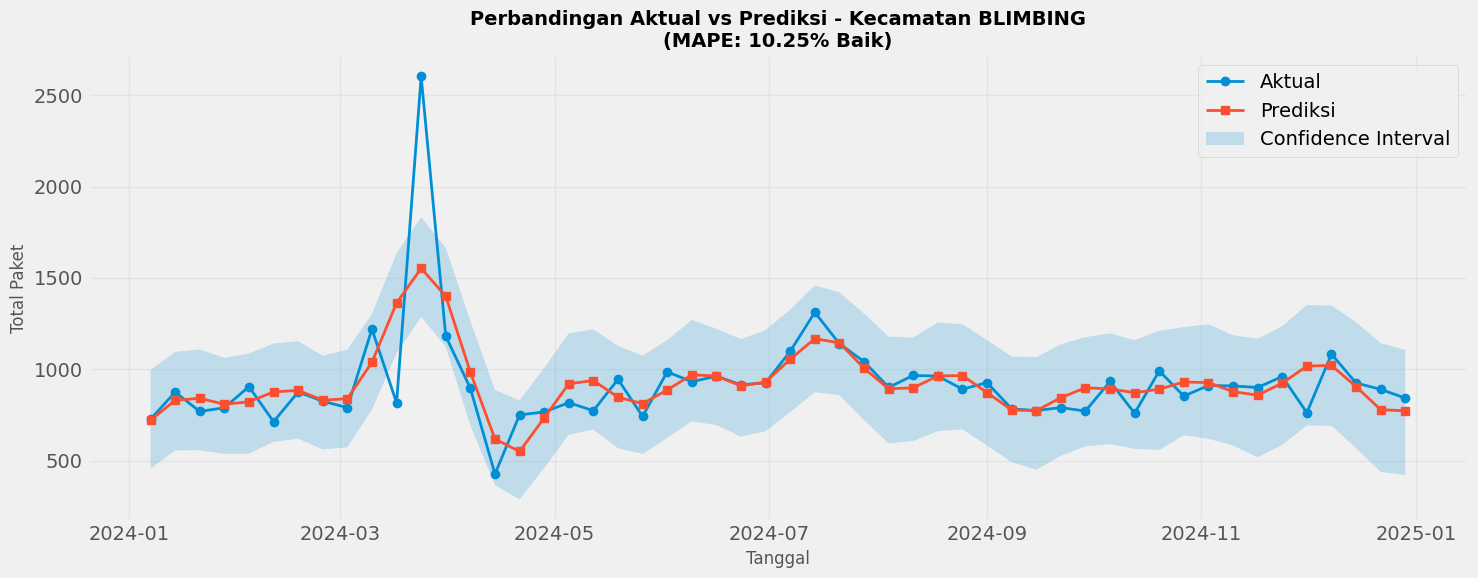


Memproses Kecamatan: KEDUNGKANDANG
Training model dengan hyperparameter: {'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'n_changepoints': 150}


15:02:01 - cmdstanpy - INFO - Chain [1] start processing
15:02:01 - cmdstanpy - INFO - Chain [1] done processing
15:02:01 - cmdstanpy - INFO - Chain [1] done processing



Evaluasi:
   MAPE: 9.06% Sangat Baik
   MAE: 62.69
   RMSE: 93.80
   MSE: 8798.13


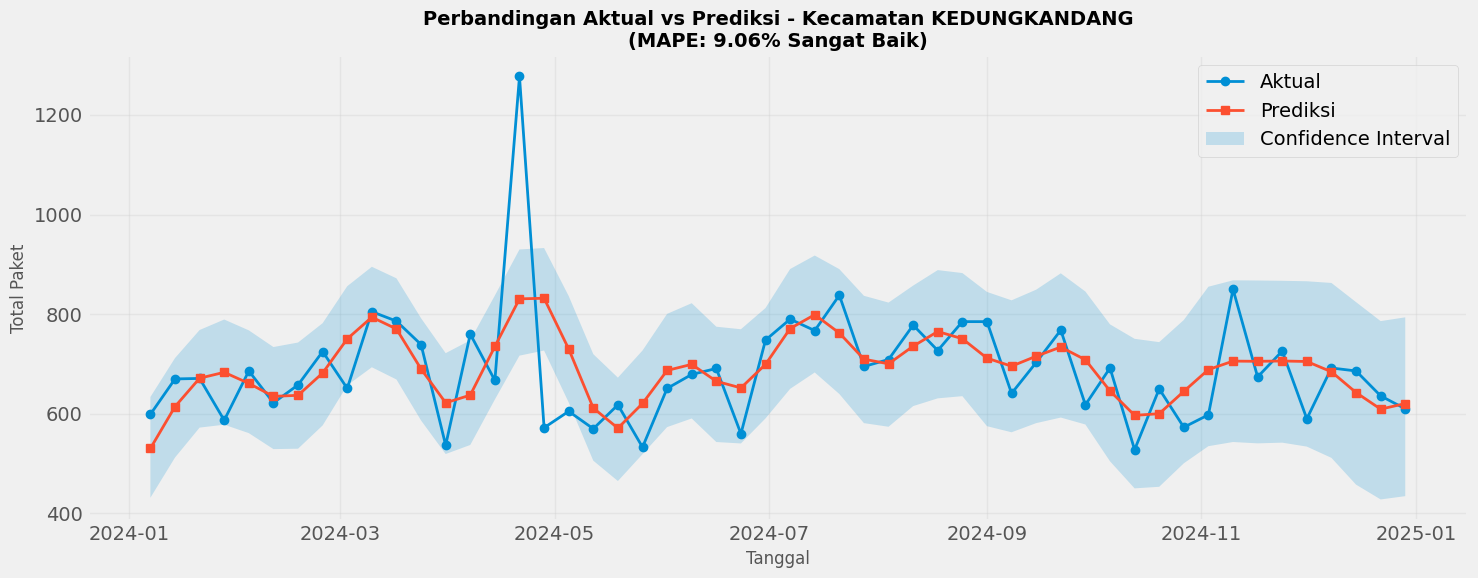


Memproses Kecamatan: KLOJEN
Training model dengan hyperparameter: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.05, 'seasonality_mode': 'multiplicative', 'n_changepoints': 100}


15:02:02 - cmdstanpy - INFO - Chain [1] start processing
15:02:02 - cmdstanpy - INFO - Chain [1] done processing
15:02:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:02:02 - cmdstanpy - INFO - Chain [1] done processing
15:02:02 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
15:02:02 - cmdstanpy - INFO - Chain [1] start processing
15:02:02 - cmdstanpy - INFO - Chain [1] start processing
15:02:06 - cmdstanpy - INFO - Chain [1] done processing
15:02:06 - cmdstanpy - INFO - Chain [1] done processing



Evaluasi:
   MAPE: 8.51% Sangat Baik
   MAE: 170.79
   RMSE: 213.14
   MSE: 45426.88


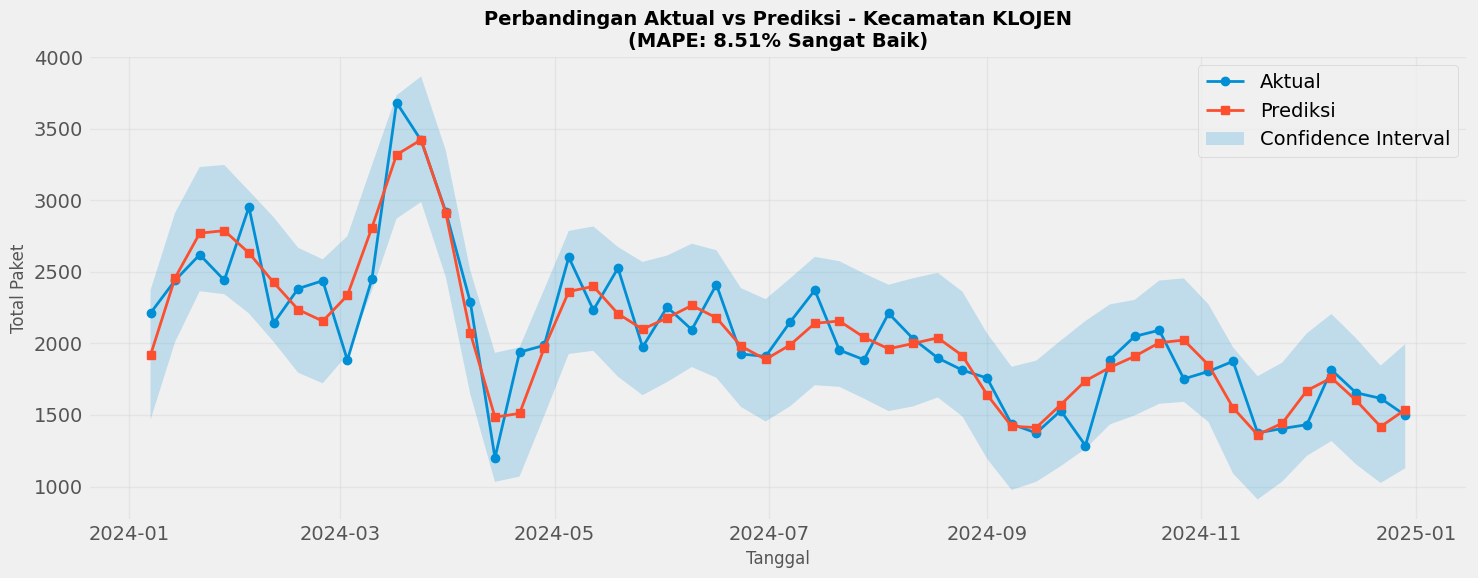


Memproses Kecamatan: LOWOKWARU
Training model dengan hyperparameter: {'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 0.05, 'seasonality_mode': 'additive', 'n_changepoints': 75}


15:02:07 - cmdstanpy - INFO - Chain [1] start processing
15:02:07 - cmdstanpy - INFO - Chain [1] done processing
15:02:07 - cmdstanpy - INFO - Chain [1] done processing



Evaluasi:
   MAPE: 8.50% Sangat Baik
   MAE: 98.27
   RMSE: 126.49
   MSE: 15999.62


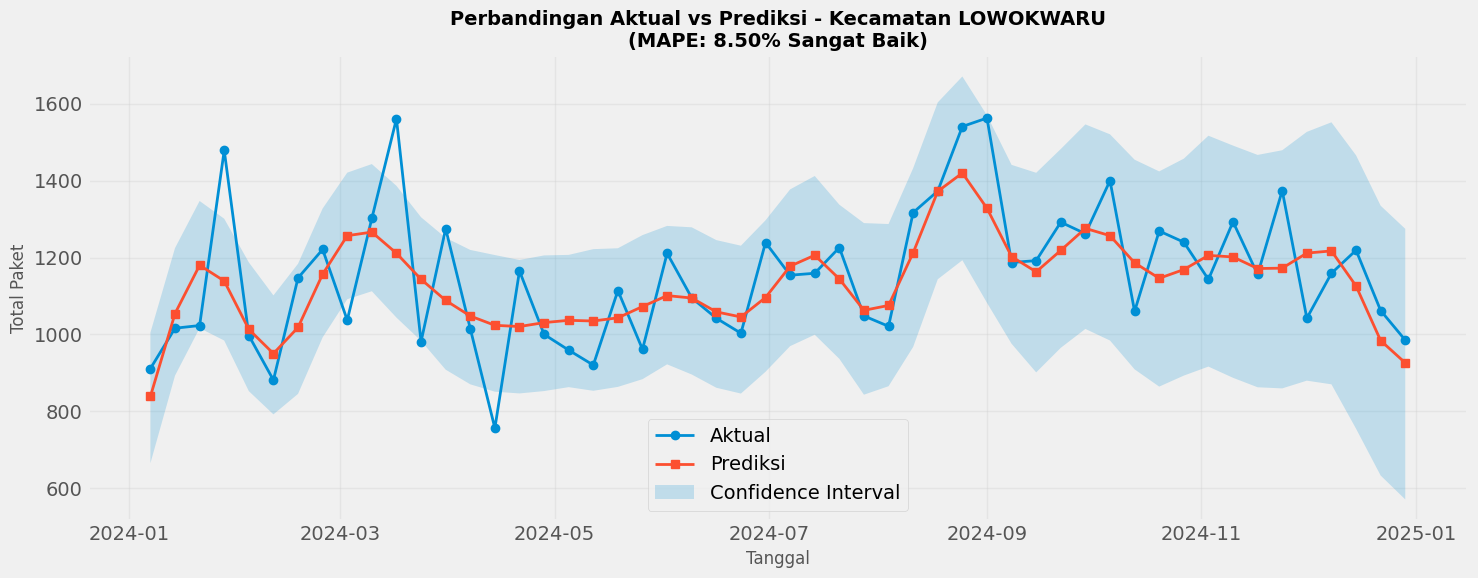


Memproses Kecamatan: SUKUN
Training model dengan hyperparameter: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10}


15:02:08 - cmdstanpy - INFO - Chain [1] start processing
15:02:08 - cmdstanpy - INFO - Chain [1] done processing
15:02:08 - cmdstanpy - INFO - Chain [1] done processing



Evaluasi:
   MAPE: 12.04% Baik
   MAE: 137.65
   RMSE: 471.65
   MSE: 222450.24


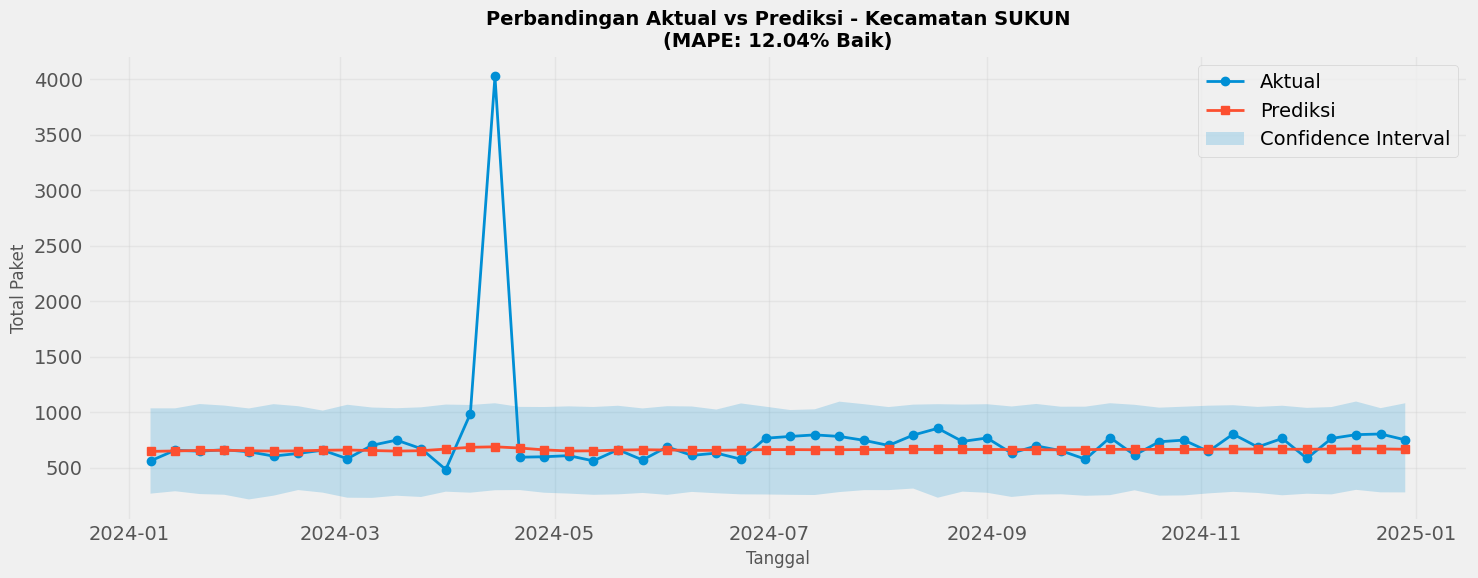


RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN



MSE     MAE    MAPE    RMSE       Status
BLIMBING        35696.27   98.95  10.25%  188.93         Baik
KEDUNGKANDANG    8798.13   62.69   9.06%   93.80  Sangat Baik
KLOJEN          45426.88  170.79   8.51%  213.14  Sangat Baik
LOWOKWARU       15999.62   98.27   8.50%  126.49  Sangat Baik
SUKUN          222450.24  137.65  12.04%  471.65         Baik


Rata-rata MAPE: 9.67%


In [28]:
from IPython.display import display

# Prediksi menggunakan Prophet untuk setiap kecamatan
print("Memulai prediksi dengan Prophet untuk setiap kecamatan")

# Dictionary untuk menyimpan hasil
predictions_results = {}

# Buat holidays untuk Indonesia
holidays = make_holidays_df(
    year_list=[2021, 2022, 2023, 2024, 2025],
    country='ID'
)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*60}")
    print(f"Memproses Kecamatan: {kecamatan}")
    print(f"{'='*60}")
    
    # Filter data untuk kecamatan saat ini
    df_filtered_kecamatan = df_kecamatan_weekly[df_kecamatan_weekly['Kecamatan'] == kecamatan].copy()
    
    # Split data
    split_point_kecamatan = len(df_filtered_kecamatan) - 52
    train_kecamatan = df_filtered_kecamatan.iloc[:split_point_kecamatan].copy()
    test_kecamatan = df_filtered_kecamatan.iloc[split_point_kecamatan:].copy()
    
    # Prepare data untuk Prophet (format: ds, y)
    train_prophet = train_kecamatan[['Tgl_Kirim', 'total paket']].copy()
    train_prophet.columns = ['ds', 'y']
    
    # Gunakan hyperparameter optimal jika tersedia
    params = optimal_params.get(kecamatan, {
        'changepoint_prior_scale': 0.5,
        'seasonality_prior_scale': 1.0,
        'seasonality_mode': 'additive',
        'n_changepoints': 25
    })
    
    # Inisialisasi dan training model Prophet
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        holidays=holidays,
        **params
    )
    
    print(f"Training model dengan hyperparameter: {params}")
    model.fit(train_prophet)
    
    # Buat prediksi untuk periode test (52 minggu)
    future = model.make_future_dataframe(periods=52, freq='W')
    forecast = model.predict(future)
    
    # Ambil prediksi untuk periode test
    test_predictions = forecast.tail(52)
    
    # Hitung metrik evaluasi
    y_true = test_kecamatan['total paket'].values
    y_pred = test_predictions['yhat'].values
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mse)
    
    # Status berdasarkan MAPE
    if mape < 10:
        status = "Sangat Baik"
    elif mape < 20:
        status = "Baik"
    elif mape < 50:
        status = "Cukup"
    else:
        status = "Buruk"
    
    # Simpan hasil
    predictions_results[kecamatan] = {
        'train': train_kecamatan,
        'test': test_kecamatan,
        'forecast': forecast,
        'test_predictions': test_predictions,
        'model': model,
        'metrics': {
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse,
            'Status': status
        }
    }
    
    # Tampilkan metrik
    print(f"\nEvaluasi:")
    print(f"   MAPE: {mape:.2f}% {status}")
    print(f"   MAE: {mae:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MSE: {mse:.2f}")
    
    # Visualisasi perbandingan Aktual vs Prediksi
    plt.figure(figsize=(15, 6))
    plt.plot(test_kecamatan['Tgl_Kirim'], test_kecamatan['total paket'], 
             marker='o', label='Aktual', linewidth=2, markersize=6)
    plt.plot(test_predictions['ds'], test_predictions['yhat'], 
             marker='s', label='Prediksi', linewidth=2, markersize=6)
    plt.fill_between(test_predictions['ds'], 
                     test_predictions['yhat_lower'], 
                     test_predictions['yhat_upper'], 
                     alpha=0.2, label='Confidence Interval')
    
    plt.title(f'Perbandingan Aktual vs Prediksi - Kecamatan {kecamatan}\n(MAPE: {mape:.2f}% {status})', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Total Paket', fontsize=12)
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Summary hasil untuk semua kecamatan
print(f"\n{'='*60}")
print("RINGKASAN HASIL PREDIKSI - SEMUA KECAMATAN")
print(f"{'='*60}\n")

metrics_summary = pd.DataFrame({
    kec: res['metrics'] for kec, res in predictions_results.items()
}).T

# Format tabel dengan styling
metrics_summary_display = metrics_summary.copy()
metrics_summary_display['MSE'] = metrics_summary_display['MSE'].apply(lambda x: f"{x:.2f}")
metrics_summary_display['MAE'] = metrics_summary_display['MAE'].apply(lambda x: f"{x:.2f}")
metrics_summary_display['MAPE'] = metrics_summary_display['MAPE'].apply(lambda x: f"{x:.2f}%")
metrics_summary_display['RMSE'] = metrics_summary_display['RMSE'].apply(lambda x: f"{x:.2f}")

# Display sebagai tabel
display(metrics_summary_display)

avg_mape = metrics_summary['MAPE'].mean()
print(f"\nRata-rata MAPE: {avg_mape:.2f}%")

## Perbandingan prediksi vs aktual

Membuat tabel perbandingan Prediksi vs Aktual untuk tahun 2024

Kecamatan: BLIMBING


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     726       721          456          979        5   
1  2024-01-14          2     875       830          542         1096       45   
2  2024-01-21          3     769       841          563         1121      -72   
3  2024-01-28          4     789       808          553         1074      -19   
4  2024-02-04          5     905       822          567         1095       83   
5  2024-02-11          6     713       876          599         1145     -163   
6  2024-02-18          7     875       884          621         1149       -9   
7  2024-02-25          8     825       831          568         1087       -6   
8  2024-03-03          9     790       839          562         1126      -49   
9  2024-03-10         10    1220      1038          782         1308      182   
10 2024-03-17         11     816      1363         1077         1636     -547   
11 2024-03-24         12    2604      1553         1288         1838     1051   
12 2024-03-31         13    1181      1400         1119         1682     -219   
13 2024-04-07         14     896       984          710         1250      -88   
14 2024-04-14         15     426       618          360          874     -192   
15 2024-04-21         16     750       550          264          826      200   
16 2024-04-28         17     766       733          476         1008       33   
17 2024-05-05         18     817       920          637         1189     -103   
18 2024-05-12         19     773       938          644         1227     -165   
19 2024-05-19         20     945       847          575         1131       98   
20 2024-05-26         21     742       812          511         1093      -70   
21 2024-06-02         22     986       886          608         1169      100   
22 2024-06-09         23     932       970          693         1245      -38   
23 2024-06-16         24     962       963          700         1239       -1   
24 2024-06-23         25     915       909          632         1185        6   
25 2024-06-30         26     926       930          671         1226       -4   
26 2024-07-07         27    1098      1055          786         1330       43   
27 2024-07-14         28    1312      1168          878         1468      144   
28 2024-07-21         29    1140      1144          872         1453       -4   
29 2024-07-28         30    1042      1006          724         1290       36   
30 2024-08-04         31     901       893          593         1186        8   
31 2024-08-11         32     966       898          589         1197       68   
32 2024-08-18         33     963       964          671         1268       -1   
33 2024-08-25         34     891       966          667         1272      -75   
34 2024-09-01         35     927       873          596         1176       54   
35 2024-09-08         36     783       777          491         1076        6   
36 2024-09-15         37     774       773          474         1068        1   
37 2024-09-22         38     790       844          546         1158      -54   
38 2024-09-29         39     771       899          593         1220     -128   
39 2024-10-06         40     933       892          587         1180       41   
40 2024-10-13         41     759       871          575         1185     -112   
41 2024-10-20         42     991       891          580         1218      100   
42 2024-10-27         43     853       930          618         1270      -77   
43 2024-11-03         44     911       927          613         1256      -16   
44 2024-11-10         45     909       877          519         1215       32   
45 2024-11-17         46     900       858          532         1199       42   
46 2024-11-24         47     960       924          575         1254       36   
47 2024-12-01         48     762      1017          694         1365     -255   
48 2024-12-08         49    1083     


Statistik Ringkasan untuk BLIMBING (2024):
   Total Minggu: 52
   Rata-rata Aktual: 923 paket/minggu
   Rata-rata Prediksi: 919 paket/minggu
   Rata-rata Error: 10.25%
   MAPE: 10.25% Baik


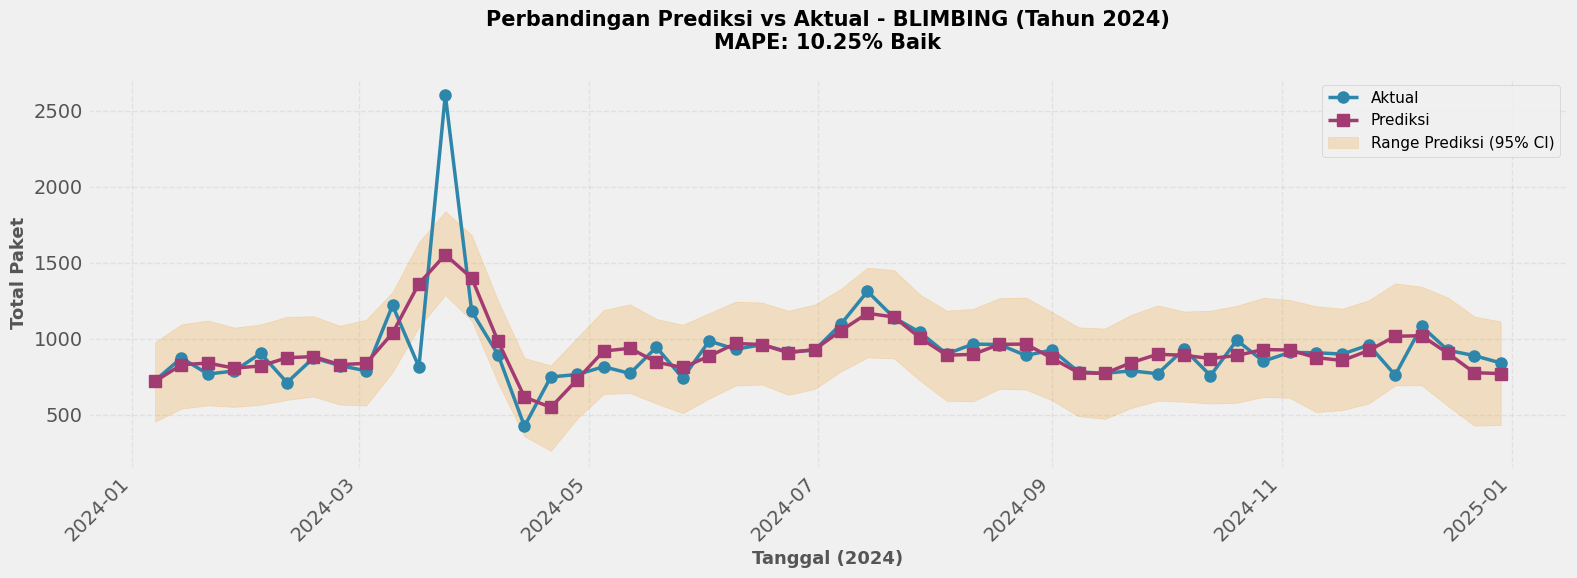


Kecamatan: KEDUNGKANDANG


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     599       531          427          629       68   
1  2024-01-14          2     670       614          521          717       56   
2  2024-01-21          3     671       672          569          770       -1   
3  2024-01-28          4     587       683          583          789      -96   
4  2024-02-04          5     686       661          555          764       25   
5  2024-02-11          6     622       635          528          734      -13   
6  2024-02-18          7     658       637          542          739       21   
7  2024-02-25          8     725       682          579          785       43   
8  2024-03-03          9     651       750          652          851      -99   
9  2024-03-10         10     805       794          689          889       11   
10 2024-03-17         11     786       770          677          870       16   
11 2024-03-24         12     739       690          581          792       49   
12 2024-03-31         13     537       622          519          730      -85   
13 2024-04-07         14     760       637          540          740      123   
14 2024-04-14         15     667       735          635          844      -68   
15 2024-04-21         16    1277       831          723          934      446   
16 2024-04-28         17     572       832          725          938     -260   
17 2024-05-05         18     605       730          621          833     -125   
18 2024-05-12         19     570       611          502          718      -41   
19 2024-05-19         20     618       571          460          674       47   
20 2024-05-26         21     533       621          511          735      -88   
21 2024-06-02         22     651       687          585          791      -36   
22 2024-06-09         23     679       699          584          814      -20   
23 2024-06-16         24     691       665          551          777       26   
24 2024-06-23         25     560       652          538          766      -92   
25 2024-06-30         26     748       699          578          808       49   
26 2024-07-07         27     790       771          655          878       19   
27 2024-07-14         28     767       799          675          913      -32   
28 2024-07-21         29     838       762          636          872       76   
29 2024-07-28         30     695       710          590          827      -15   
30 2024-08-04         31     709       700          570          818        9   
31 2024-08-11         32     778       736          600          861       42   
32 2024-08-18         33     727       765          639          886      -38   
33 2024-08-25         34     785       751          616          880       34   
34 2024-09-01         35     785       712          583          844       73   
35 2024-09-08         36     641       696          546          822      -55   
36 2024-09-15         37     703       716          569          852      -13   
37 2024-09-22         38     768       734          588          866       34   
38 2024-09-29         39     618       708          559          841      -90   
39 2024-10-06         40     692       646          489          781       46   
40 2024-10-13         41     528       597          452          733      -69   
41 2024-10-20         42     650       600          438          744       50   
42 2024-10-27         43     573       645          477          793      -72   
43 2024-11-03         44     598       689          525          844      -91   
44 2024-11-10         45     850       706          534          862      144   
45 2024-11-17         46     674       705          541          866      -31   
46 2024-11-24         47     726       706          536          860       20   
47 2024-12-01         48     590       705          524          869     -115   
48 2024-12-08         49     692     


Statistik Ringkasan untuk KEDUNGKANDANG (2024):
   Total Minggu: 52
   Rata-rata Aktual: 688 paket/minggu
   Rata-rata Prediksi: 689 paket/minggu
   Rata-rata Error: 9.06%
   MAPE: 9.06% Sangat Baik


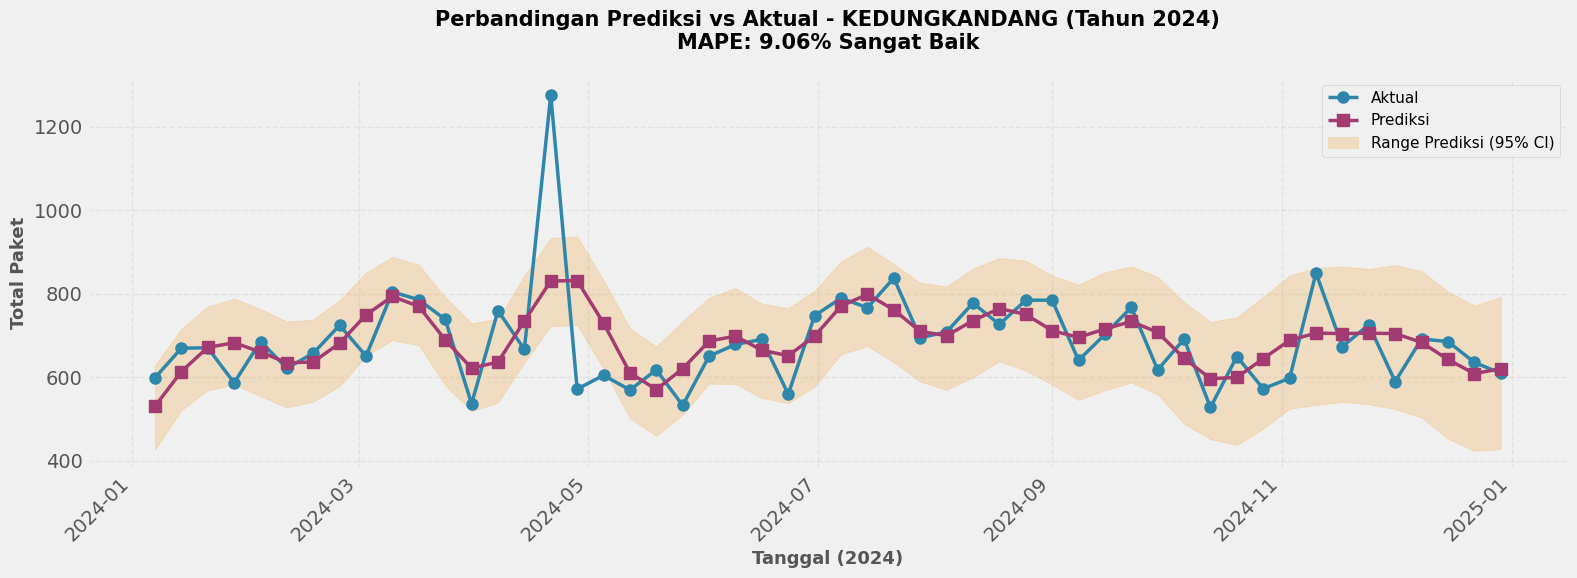


Kecamatan: KLOJEN


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1    2212      1918         1501         2365      294   
1  2024-01-14          2    2441      2459         2025         2908      -18   
2  2024-01-21          3    2620      2770         2340         3206     -150   
3  2024-01-28          4    2441      2788         2357         3213     -347   
4  2024-02-04          5    2953      2632         2165         3089      321   
5  2024-02-11          6    2140      2427         1984         2869     -287   
6  2024-02-18          7    2383      2236         1792         2689      147   
7  2024-02-25          8    2438      2156         1711         2562      282   
8  2024-03-03          9    1884      2335         1907         2770     -451   
9  2024-03-10         10    2451      2809         2381         3257     -358   
10 2024-03-17         11    3683      3318         2890         3768      365   
11 2024-03-24         12    3418      3423         2973         3872       -5   
12 2024-03-31         13    2921      2912         2444         3356        9   
13 2024-04-07         14    2287      2071         1624         2525      216   
14 2024-04-14         15    1200      1485         1075         1917     -285   
15 2024-04-21         16    1939      1511         1076         1944      428   
16 2024-04-28         17    1986      1967         1507         2430       19   
17 2024-05-05         18    2602      2362         1929         2804      240   
18 2024-05-12         19    2233      2399         1992         2823     -166   
19 2024-05-19         20    2526      2207         1808         2667      319   
20 2024-05-26         21    1974      2099         1652         2546     -125   
21 2024-06-02         22    2254      2178         1743         2607       76   
22 2024-06-09         23    2096      2265         1820         2709     -169   
23 2024-06-16         24    2411      2179         1719         2614      232   
24 2024-06-23         25    1926      1981         1525         2421      -55   
25 2024-06-30         26    1909      1888         1476         2336       21   
26 2024-07-07         27    2150      1990         1547         2427      160   
27 2024-07-14         28    2372      2141         1664         2538      231   
28 2024-07-21         29    1953      2156         1718         2590     -203   
29 2024-07-28         30    1886      2043         1597         2465     -157   
30 2024-08-04         31    2210      1962         1569         2445      248   
31 2024-08-11         32    2032      2000         1607         2424       32   
32 2024-08-18         33    1898      2039         1610         2481     -141   
33 2024-08-25         34    1813      1915         1480         2344     -102   
34 2024-09-01         35    1758      1642         1215         2071      116   
35 2024-09-08         36    1436      1421          987         1848       15   
36 2024-09-15         37    1374      1412          935         1841      -38   
37 2024-09-22         38    1530      1572         1136         2045      -42   
38 2024-09-29         39    1286      1739         1298         2167     -453   
39 2024-10-06         40    1887      1833         1407         2278       54   
40 2024-10-13         41    2049      1909         1492         2300      140   
41 2024-10-20         42    2092      2005         1569         2452       87   
42 2024-10-27         43    1752      2023         1582         2461     -271   
43 2024-11-03         44    1804      1850         1421         2319      -46   
44 2024-11-10         45    1875      1550         1130         2026      325   
45 2024-11-17         46    1375      1361          926         1767       14   
46 2024-11-24         47    1405      1442         1050         1875      -37   
47 2024-12-01         48    1432      1670         1208         2101     -238   
48 2024-12-08         49    1815     


Statistik Ringkasan untuk KLOJEN (2024):
   Total Minggu: 52
   Rata-rata Aktual: 2063 paket/minggu
   Rata-rata Prediksi: 2053 paket/minggu
   Rata-rata Error: 8.51%
   MAPE: 8.51% Sangat Baik


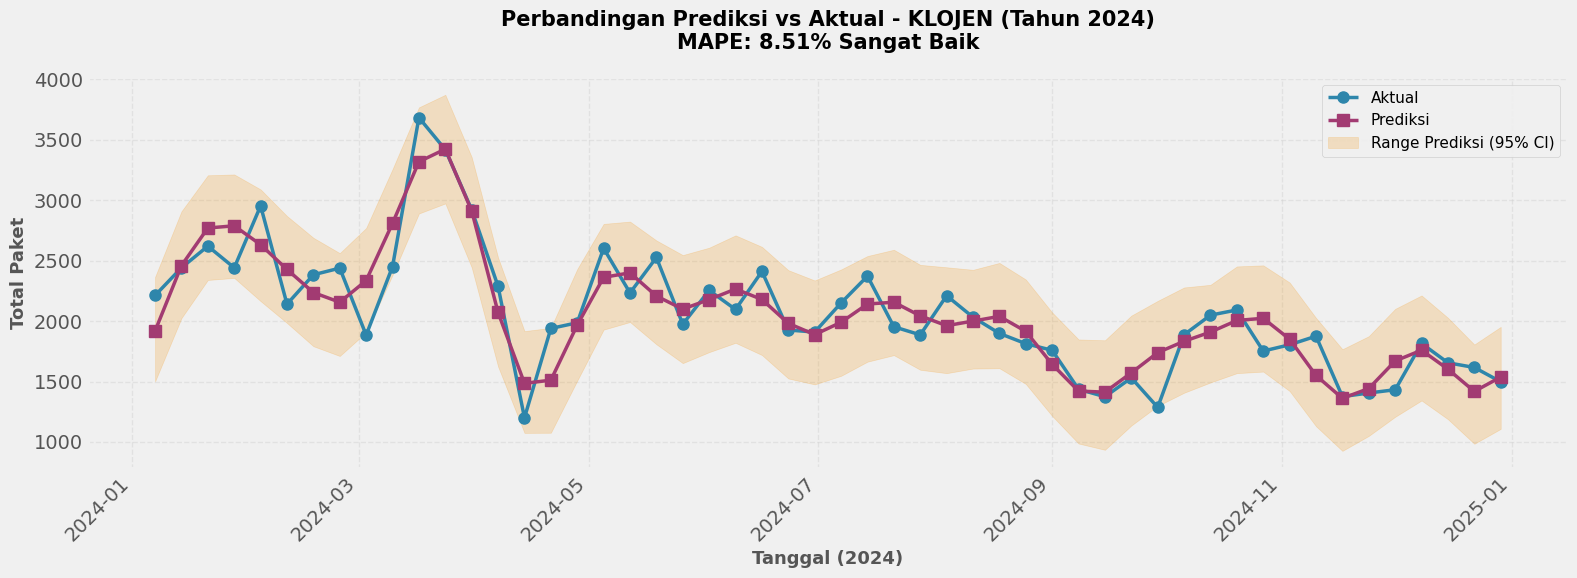


Kecamatan: LOWOKWARU


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     911       838          662         1002       73   
1  2024-01-14          2    1016      1054          892         1227      -38   
2  2024-01-21          3    1023      1180         1016         1345     -157   
3  2024-01-28          4    1479      1139          982         1291      340   
4  2024-02-04          5     997      1013          852         1178      -16   
5  2024-02-11          6     881       950          779         1112      -69   
6  2024-02-18          7    1147      1018          847         1186      129   
7  2024-02-25          8    1221      1157          988         1320       64   
8  2024-03-03          9    1037      1257         1108         1420     -220   
9  2024-03-10         10    1302      1266         1098         1435       36   
10 2024-03-17         11    1561      1211         1039         1381      350   
11 2024-03-24         12     981      1143          989         1306     -162   
12 2024-03-31         13    1275      1088          910         1250      187   
13 2024-04-07         14    1015      1048          881         1221      -33   
14 2024-04-14         15     756      1024          847         1205     -268   
15 2024-04-21         16    1165      1020          845         1201      145   
16 2024-04-28         17    1000      1031          859         1223      -31   
17 2024-05-05         18     959      1037          850         1203      -78   
18 2024-05-12         19     920      1035          865         1216     -115   
19 2024-05-19         20    1114      1043          856         1223       71   
20 2024-05-26         21     961      1072          872         1263     -111   
21 2024-06-02         22    1211      1101          912         1288      110   
22 2024-06-09         23    1095      1095          902         1292        0   
23 2024-06-16         24    1042      1059          871         1246      -17   
24 2024-06-23         25    1003      1045          853         1236      -42   
25 2024-06-30         26    1239      1096          899         1298      143   
26 2024-07-07         27    1154      1177          961         1375      -23   
27 2024-07-14         28    1159      1206          994         1409      -47   
28 2024-07-21         29    1226      1144          927         1349       82   
29 2024-07-28         30    1048      1063          832         1280      -15   
30 2024-08-04         31    1021      1075          858         1298      -54   
31 2024-08-11         32    1317      1212          982         1444      105   
32 2024-08-18         33    1373      1372         1155         1602        1   
33 2024-08-25         34    1541      1420         1178         1638      121   
34 2024-09-01         35    1563      1328         1076         1574      235   
35 2024-09-08         36    1187      1202          954         1438      -15   
36 2024-09-15         37    1192      1163          899         1420       29   
37 2024-09-22         38    1292      1219          957         1481       73   
38 2024-09-29         39    1262      1276          998         1550      -14   
39 2024-10-06         40    1400      1257          996         1530      143   
40 2024-10-13         41    1060      1186          904         1484     -126   
41 2024-10-20         42    1269      1146          861         1429      123   
42 2024-10-27         43    1240      1169          872         1466       71   
43 2024-11-03         44    1143      1206          914         1487      -63   
44 2024-11-10         45    1293      1202          898         1509       91   
45 2024-11-17         46    1156      1171          854         1477      -15   
46 2024-11-24         47    1374      1172          837         1478      202   
47 2024-12-01         48    1042      1212          885         1539     -170   
48 2024-12-08         49    1159     


Statistik Ringkasan untuk LOWOKWARU (2024):
   Total Minggu: 52
   Rata-rata Aktual: 1155 paket/minggu
   Rata-rata Prediksi: 1132 paket/minggu
   Rata-rata Error: 8.50%
   MAPE: 8.50% Sangat Baik


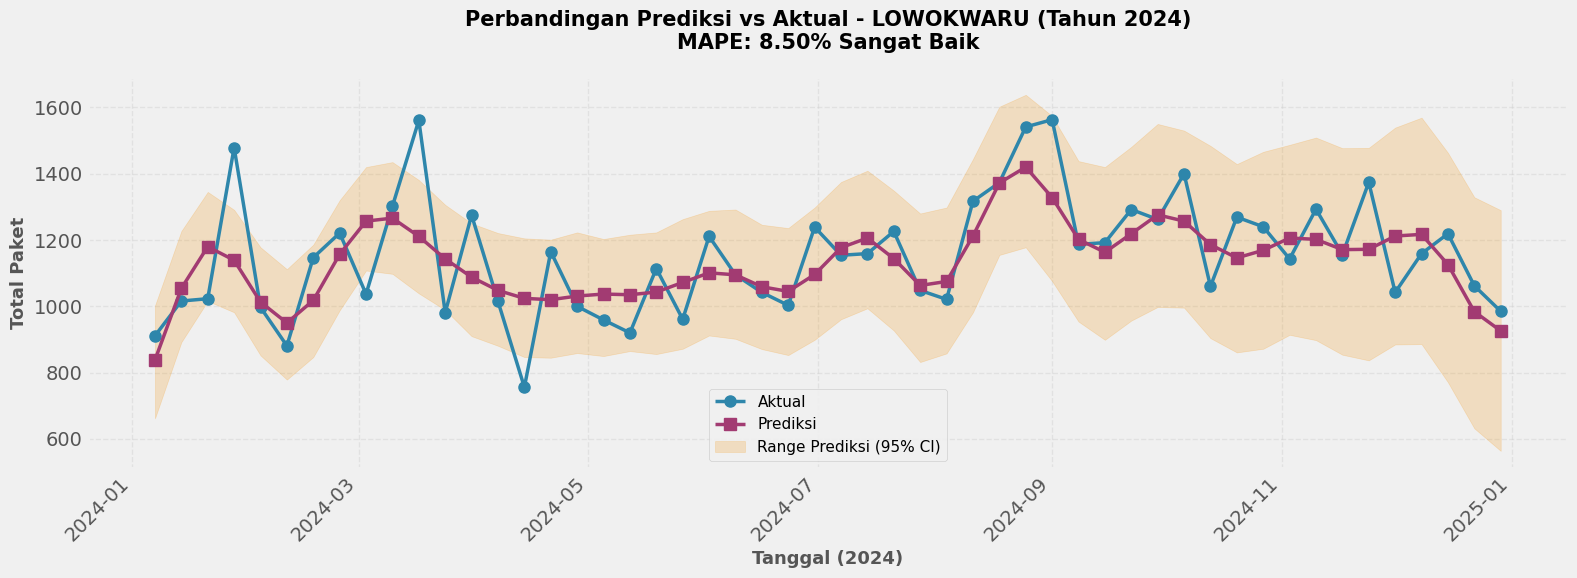


Kecamatan: SUKUN


Tanggal  Minggu_Ke  Aktual  Prediksi  Lower_Bound  Upper_Bound  Selisih  \
0  2024-01-07          1     562       648          244         1030      -86   
1  2024-01-14          2     658       651          240         1009        7   
2  2024-01-21          3     649       656          286         1044       -7   
3  2024-01-28          4     662       657          285         1057        5   
4  2024-02-04          5     644       653          252         1043       -9   
5  2024-02-11          6     605       650          240         1023      -45   
6  2024-02-18          7     629       652          281         1078      -23   
7  2024-02-25          8     658       658          268         1068        0   
8  2024-03-03          9     581       660          254         1032      -79   
9  2024-03-10         10     702       655          249         1033       47   
10 2024-03-17         11     749       650          223         1060       99   
11 2024-03-24         12     672       654          303         1014       18   
12 2024-03-31         13     484       668          248         1070     -184   
13 2024-04-07         14     987       684          308         1082      303   
14 2024-04-14         15    4023       689          305         1113     3334   
15 2024-04-21         16     595       678          268         1076      -83   
16 2024-04-28         17     599       661          264         1060      -62   
17 2024-05-05         18     609       651          272         1047      -42   
18 2024-05-12         19     562       652          259         1034      -90   
19 2024-05-19         20     663       659          279         1070        4   
20 2024-05-26         21     570       662          257         1075      -92   
21 2024-06-02         22     688       660          230         1030       28   
22 2024-06-09         23     611       656          263         1040      -45   
23 2024-06-16         24     632       657          271         1051      -25   
24 2024-06-23         25     577       660          260         1051      -83   
25 2024-06-30         26     766       663          281         1104      103   
26 2024-07-07         27     782       664          225         1045      118   
27 2024-07-14         28     796       662          281         1055      134   
28 2024-07-21         29     782       662          255         1053      120   
29 2024-07-28         30     747       664          279         1040       83   
30 2024-08-04         31     701       665          259         1035       36   
31 2024-08-11         32     794       665          273         1060      129   
32 2024-08-18         33     855       664          281         1043      191   
33 2024-08-25         34     737       665          254         1045       72   
34 2024-09-01         35     768       665          265         1073      103   
35 2024-09-08         36     631       664          263         1066      -33   
36 2024-09-15         37     697       662          285         1061       35   
37 2024-09-22         38     654       662          268         1067       -8   
38 2024-09-29         39     577       663          282         1064      -86   
39 2024-10-06         40     772       665          285         1028      107   
40 2024-10-13         41     614       666          268         1056      -52   
41 2024-10-20         42     734       665          305         1073       69   
42 2024-10-27         43     749       665          299         1056       84   
43 2024-11-03         44     647       666          263         1049      -19   
44 2024-11-10         45     803       668          286         1044      135   
45 2024-11-17         46     687       668          236         1077       19   
46 2024-11-24         47     764       667          286         1073       97   
47 2024-12-01         48     584       667          285         1070      -83   
48 2024-12-08         49     764     


Statistik Ringkasan untuk SUKUN (2024):
   Total Minggu: 52
   Rata-rata Aktual: 752 paket/minggu
   Rata-rata Prediksi: 662 paket/minggu
   Rata-rata Error: 12.04%
   MAPE: 12.04% Baik


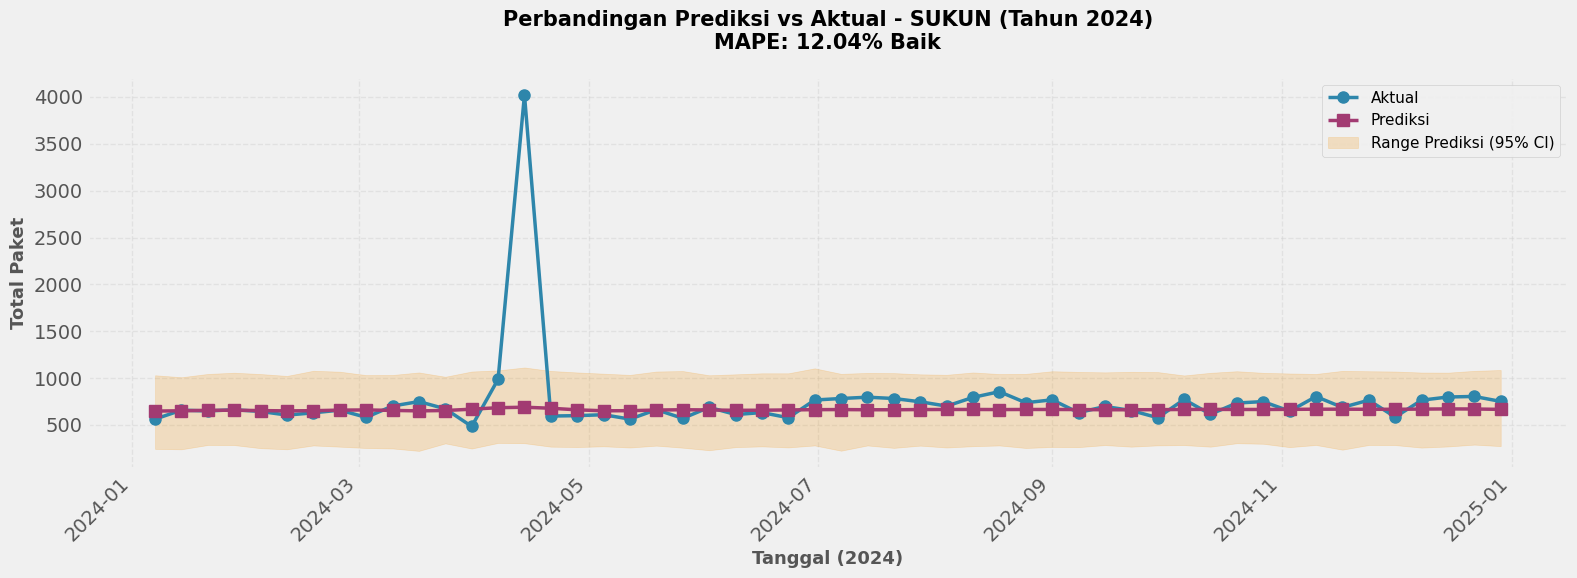

In [26]:
# Membuat tabel perbandingan prediksi vs aktual untuk tahun 2024
print("Membuat tabel perbandingan Prediksi vs Aktual untuk tahun 2024")

for kecamatan in unique_kecamatan:
    print(f"\n{'='*80}")
    print(f"Kecamatan: {kecamatan}")
    print(f"{'='*80}")
    
    # Ambil data dari hasil prediksi
    result = predictions_results[kecamatan]
    test_data = result['test'].copy()
    test_pred = result['test_predictions'].copy()
    
    # Filter hanya untuk tahun 2024
    test_data_2024 = test_data[test_data['Tgl_Kirim'].dt.year == 2024].copy()
    test_pred_2024 = test_pred[test_pred['ds'].dt.year == 2024].copy()
    
    # Buat tabel perbandingan
    comparison_table = pd.DataFrame({
        'Tanggal': test_data_2024['Tgl_Kirim'].values,
        'Minggu_Ke': test_data_2024['minggu_ke'].values,
        'Aktual': test_data_2024['total paket'].values,
        'Prediksi': test_pred_2024['yhat'].values,
        'Lower_Bound': test_pred_2024['yhat_lower'].values,
        'Upper_Bound': test_pred_2024['yhat_upper'].values,
    })
    
    # Hitung selisih dan persentase error
    comparison_table['Selisih'] = comparison_table['Aktual'] - comparison_table['Prediksi']
    comparison_table['Error_%'] = abs(comparison_table['Selisih'] / comparison_table['Aktual'] * 100)
    
    # Format angka
    comparison_table['Aktual'] = comparison_table['Aktual'].astype(int)
    comparison_table['Prediksi'] = comparison_table['Prediksi'].round(0).astype(int)
    comparison_table['Lower_Bound'] = comparison_table['Lower_Bound'].round(0).astype(int)
    comparison_table['Upper_Bound'] = comparison_table['Upper_Bound'].round(0).astype(int)
    comparison_table['Selisih'] = comparison_table['Selisih'].round(0).astype(int)
    comparison_table['Error_%'] = comparison_table['Error_%'].round(2)
    
    # Tampilkan tabel
    display(comparison_table)
    
    # Statistik ringkasan
    print(f"\nStatistik Ringkasan untuk {kecamatan} (2024):")
    print(f"   Total Minggu: {len(comparison_table)}")
    print(f"   Rata-rata Aktual: {comparison_table['Aktual'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Prediksi: {comparison_table['Prediksi'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Error: {comparison_table['Error_%'].mean():.2f}%")
    print(f"   MAPE: {result['metrics']['MAPE']:.2f}% {result['metrics']['Status']}")
    
    # Visualisasi untuk 2024
    plt.figure(figsize=(16, 6))
    
    # Plot data
    plt.plot(comparison_table['Tanggal'], comparison_table['Aktual'], 
             marker='o', label='Aktual', linewidth=2.5, markersize=8, color='#2E86AB')
    plt.plot(comparison_table['Tanggal'], comparison_table['Prediksi'], 
             marker='s', label='Prediksi', linewidth=2.5, markersize=8, color='#A23B72')
    plt.fill_between(comparison_table['Tanggal'], 
                     comparison_table['Lower_Bound'], 
                     comparison_table['Upper_Bound'], 
                     alpha=0.2, label='Range Prediksi (95% CI)', color='#F18F01')
    
    # Formatting
    plt.title(f'Perbandingan Prediksi vs Aktual - {kecamatan} (Tahun 2024)\nMAPE: {result["metrics"]["MAPE"]:.2f}% {result["metrics"]["Status"]}', 
              fontsize=15, fontweight='bold', pad=20)
    plt.xlabel('Tanggal (2024)', fontsize=13, fontweight='bold')
    plt.ylabel('Total Paket', fontsize=13, fontweight='bold')
    plt.legend(loc='best', fontsize=11, framealpha=0.9)
    plt.grid(True, alpha=0.4, linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Rekomendasi Kurir

Menghitung Rekomendasi Jumlah Kurir untuk tahun 2024
Asumsi: 1 kurir dapat menangani 100-150 paket per minggu


Kecamatan: BLIMBING


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             721           726              5   
1  2024-01-14          2             830           875              6   
2  2024-01-21          3             841           769              6   
3  2024-01-28          4             808           789              6   
4  2024-02-04          5             822           905              6   
5  2024-02-11          6             876           713              6   
6  2024-02-18          7             884           875              6   
7  2024-02-25          8             831           825              6   
8  2024-03-03          9             839           790              6   
9  2024-03-10         10            1038          1220              7   
10 2024-03-17         11            1363           816             10   
11 2024-03-24         12            1553          2604             11   
12 2024-03-31         13            1400          1181             10   
13 2024-04-07         14             984           896              7   
14 2024-04-14         15             618           426              5   
15 2024-04-21         16             550           750              4   
16 2024-04-28         17             733           766              5   
17 2024-05-05         18             920           817              7   
18 2024-05-12         19             938           773              7   
19 2024-05-19         20             847           945              6   
20 2024-05-26         21             812           742              6   
21 2024-06-02         22             886           986              6   
22 2024-06-09         23             970           932              7   
23 2024-06-16         24             963           962              7   
24 2024-06-23         25             909           915              7   
25 2024-06-30         26             930           926              7   
26 2024-07-07         27            1055          1098              8   
27 2024-07-14         28            1168          1312              8   
28 2024-07-21         29            1144          1140              8   
29 2024-07-28         30            1006          1042              7   
30 2024-08-04         31             893           901              6   
31 2024-08-11         32             898           966              6   
32 2024-08-18         33             964           963              7   
33 2024-08-25         34             966           891              7   
34 2024-09-01         35             873           927              6   
35 2024-09-08         36             777           783              6   
36 2024-09-15         37             773           774              6   
37 2024-09-22         38             844           790              6   
38 2024-09-29         39             899           771              6   
39 2024-10-06         40             892           933              6   
40 2024-10-13         41             871           759              6   
41 2024-10-20         42             891           991              6   
42 2024-10-27         43             930           853              7   
43 2024-11-03         44             927           911              7   
44 2024-11-10         45             877           909              6   
45 2024-11-17         46             858           900              6   
46 2024-11-24         47             924           960              7   
47 2024-12-01         48            1017           762              7   
48 2024-12-08         49            1021          1083              7   
49 2024-12-15         50             905           925              7   
50 2024-12-22         51             778           890              6   
51 2024-12-29         52             772           842              6   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket           Status  
0               6               8              5           Sesuai  



Ringkasan Rekomendasi Kurir - BLIMBING (2024):
   Rata-rata Prediksi Paket: 919 paket/minggu
   Rata-rata Aktual Paket: 923 paket/minggu
   ─────────────────────────────────────────────────
   Rekomendasi Kurir Minimum: 6.6 kurir (beban 150 paket/kurir)
   Rekomendasi Kurir Optimal: 7.9 kurir (beban 125 paket/kurir)
   Rekomendasi Kurir Maksimum: 9.7 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   REKOMENDASI: Sediakan 8 kurir tetap
   Untuk minggu sibuk, tambahkan 9 kurir cadangan


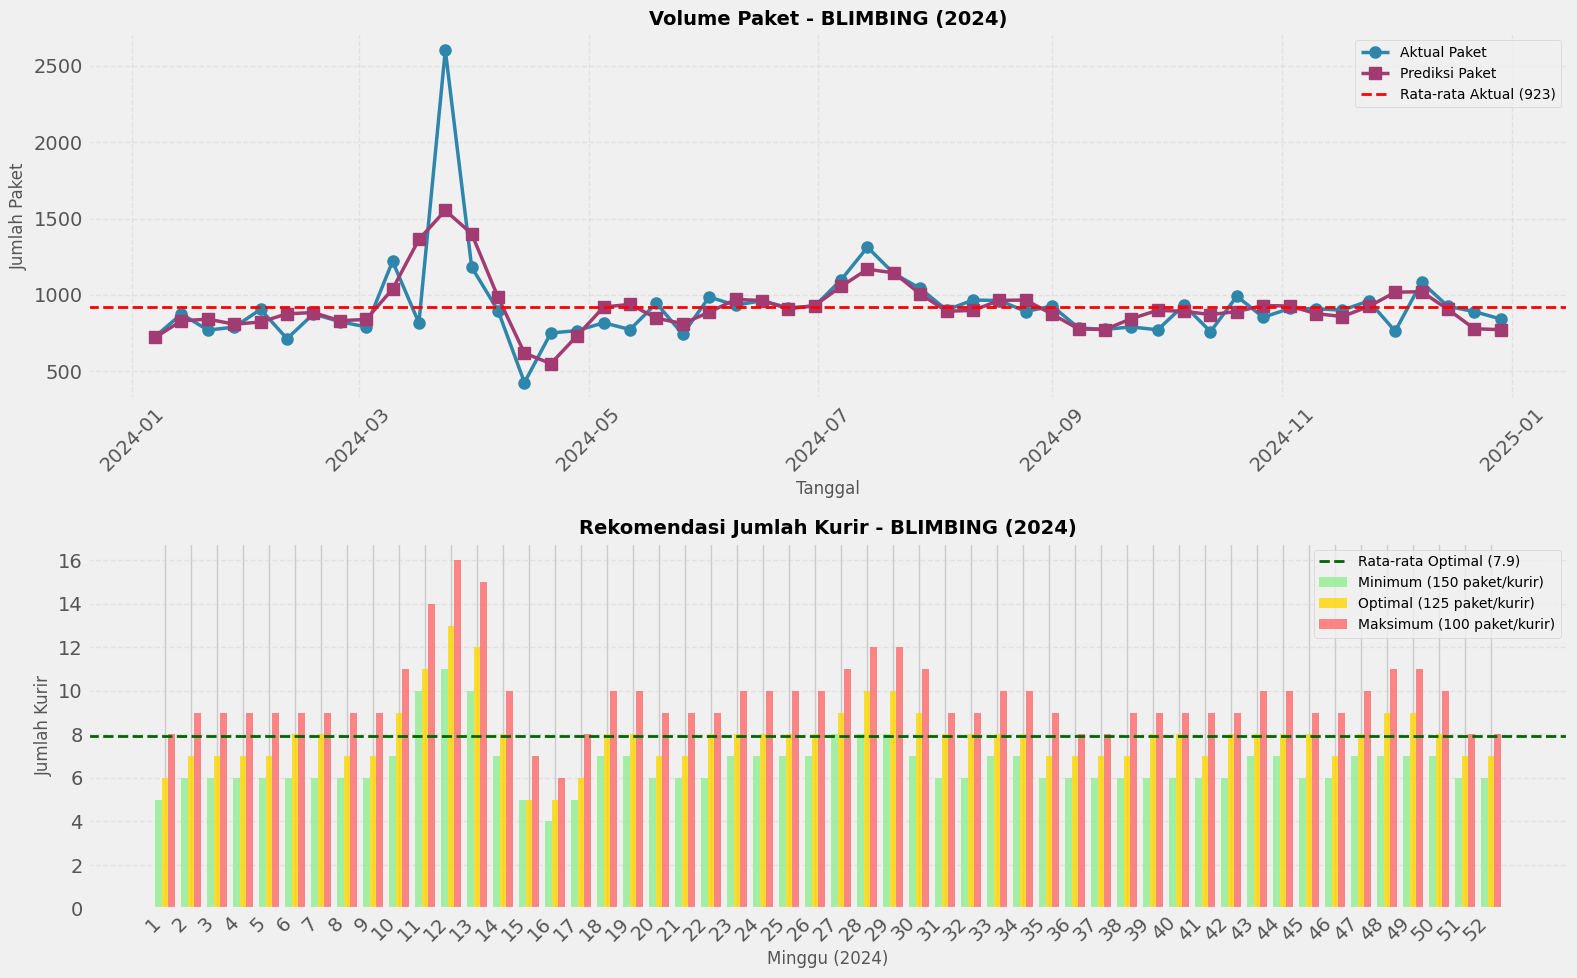


Kecamatan: KEDUNGKANDANG


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             531           599              4   
1  2024-01-14          2             614           670              5   
2  2024-01-21          3             672           671              5   
3  2024-01-28          4             683           587              5   
4  2024-02-04          5             661           686              5   
5  2024-02-11          6             635           622              5   
6  2024-02-18          7             637           658              5   
7  2024-02-25          8             682           725              5   
8  2024-03-03          9             750           651              6   
9  2024-03-10         10             794           805              6   
10 2024-03-17         11             770           786              6   
11 2024-03-24         12             690           739              5   
12 2024-03-31         13             622           537              5   
13 2024-04-07         14             637           760              5   
14 2024-04-14         15             735           667              5   
15 2024-04-21         16             831          1277              6   
16 2024-04-28         17             832           572              6   
17 2024-05-05         18             730           605              5   
18 2024-05-12         19             611           570              5   
19 2024-05-19         20             571           618              4   
20 2024-05-26         21             621           533              5   
21 2024-06-02         22             687           651              5   
22 2024-06-09         23             699           679              5   
23 2024-06-16         24             665           691              5   
24 2024-06-23         25             652           560              5   
25 2024-06-30         26             699           748              5   
26 2024-07-07         27             771           790              6   
27 2024-07-14         28             799           767              6   
28 2024-07-21         29             762           838              6   
29 2024-07-28         30             710           695              5   
30 2024-08-04         31             700           709              5   
31 2024-08-11         32             736           778              5   
32 2024-08-18         33             765           727              6   
33 2024-08-25         34             751           785              6   
34 2024-09-01         35             712           785              5   
35 2024-09-08         36             696           641              5   
36 2024-09-15         37             716           703              5   
37 2024-09-22         38             734           768              5   
38 2024-09-29         39             708           618              5   
39 2024-10-06         40             646           692              5   
40 2024-10-13         41             597           528              4   
41 2024-10-20         42             600           650              5   
42 2024-10-27         43             645           573              5   
43 2024-11-03         44             689           598              5   
44 2024-11-10         45             706           850              5   
45 2024-11-17         46             705           674              5   
46 2024-11-24         47             706           726              5   
47 2024-12-01         48             705           590              5   
48 2024-12-08         49             684           692              5   
49 2024-12-15         50             643           686              5   
50 2024-12-22         51             609           636              5   
51 2024-12-29         52             621           610              5   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket           Status  
0               5               6             68  Perlu Perhatian  



Ringkasan Rekomendasi Kurir - KEDUNGKANDANG (2024):
   Rata-rata Prediksi Paket: 689 paket/minggu
   Rata-rata Aktual Paket: 688 paket/minggu
   ─────────────────────────────────────────────────
   Rekomendasi Kurir Minimum: 5.1 kurir (beban 150 paket/kurir)
   Rekomendasi Kurir Optimal: 6.0 kurir (beban 125 paket/kurir)
   Rekomendasi Kurir Maksimum: 7.4 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   REKOMENDASI: Sediakan 6 kurir tetap
   Untuk minggu sibuk, tambahkan 3 kurir cadangan


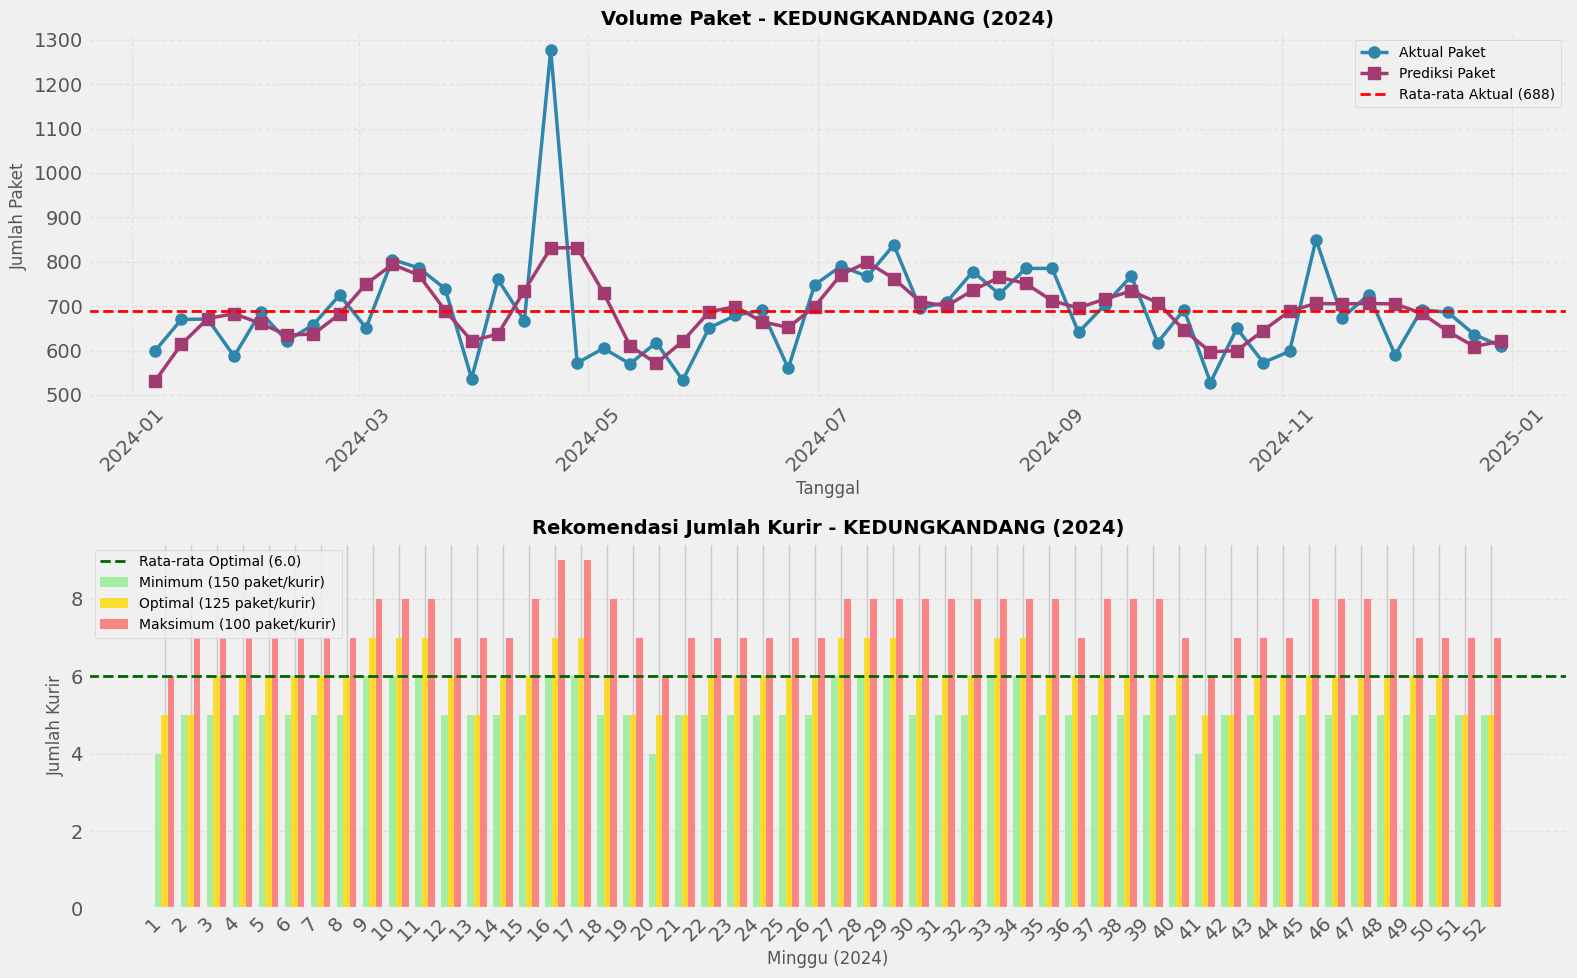


Kecamatan: KLOJEN


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1            1918          2212             13   
1  2024-01-14          2            2459          2441             17   
2  2024-01-21          3            2770          2620             19   
3  2024-01-28          4            2788          2441             19   
4  2024-02-04          5            2632          2953             18   
5  2024-02-11          6            2427          2140             17   
6  2024-02-18          7            2236          2383             15   
7  2024-02-25          8            2156          2438             15   
8  2024-03-03          9            2335          1884             16   
9  2024-03-10         10            2809          2451             19   
10 2024-03-17         11            3318          3683             23   
11 2024-03-24         12            3423          3418             23   
12 2024-03-31         13            2912          2921             20   
13 2024-04-07         14            2071          2287             14   
14 2024-04-14         15            1485          1200             10   
15 2024-04-21         16            1511          1939             11   
16 2024-04-28         17            1967          1986             14   
17 2024-05-05         18            2362          2602             16   
18 2024-05-12         19            2399          2233             16   
19 2024-05-19         20            2207          2526             15   
20 2024-05-26         21            2099          1974             14   
21 2024-06-02         22            2178          2254             15   
22 2024-06-09         23            2265          2096             16   
23 2024-06-16         24            2179          2411             15   
24 2024-06-23         25            1981          1926             14   
25 2024-06-30         26            1888          1909             13   
26 2024-07-07         27            1990          2150             14   
27 2024-07-14         28            2141          2372             15   
28 2024-07-21         29            2156          1953             15   
29 2024-07-28         30            2043          1886             14   
30 2024-08-04         31            1962          2210             14   
31 2024-08-11         32            2000          2032             14   
32 2024-08-18         33            2039          1898             14   
33 2024-08-25         34            1915          1813             13   
34 2024-09-01         35            1642          1758             11   
35 2024-09-08         36            1421          1436             10   
36 2024-09-15         37            1412          1374             10   
37 2024-09-22         38            1572          1530             11   
38 2024-09-29         39            1739          1286             12   
39 2024-10-06         40            1833          1887             13   
40 2024-10-13         41            1909          2049             13   
41 2024-10-20         42            2005          2092             14   
42 2024-10-27         43            2023          1752             14   
43 2024-11-03         44            1850          1804             13   
44 2024-11-10         45            1550          1875             11   
45 2024-11-17         46            1361          1375             10   
46 2024-11-24         47            1442          1405             10   
47 2024-12-01         48            1670          1432             12   
48 2024-12-08         49            1759          1815             12   
49 2024-12-15         50            1602          1655             11   
50 2024-12-22         51            1418          1616             10   
51 2024-12-29         52            1537          1498             11   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket           Status  
0              16              20            294  Perlu Perhatian  



Ringkasan Rekomendasi Kurir - KLOJEN (2024):
   Rata-rata Prediksi Paket: 2053 paket/minggu
   Rata-rata Aktual Paket: 2063 paket/minggu
   ─────────────────────────────────────────────────
   Rekomendasi Kurir Minimum: 14.2 kurir (beban 150 paket/kurir)
   Rekomendasi Kurir Optimal: 17.0 kurir (beban 125 paket/kurir)
   Rekomendasi Kurir Maksimum: 21.1 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   REKOMENDASI: Sediakan 17 kurir tetap
   Untuk minggu sibuk, tambahkan 19 kurir cadangan


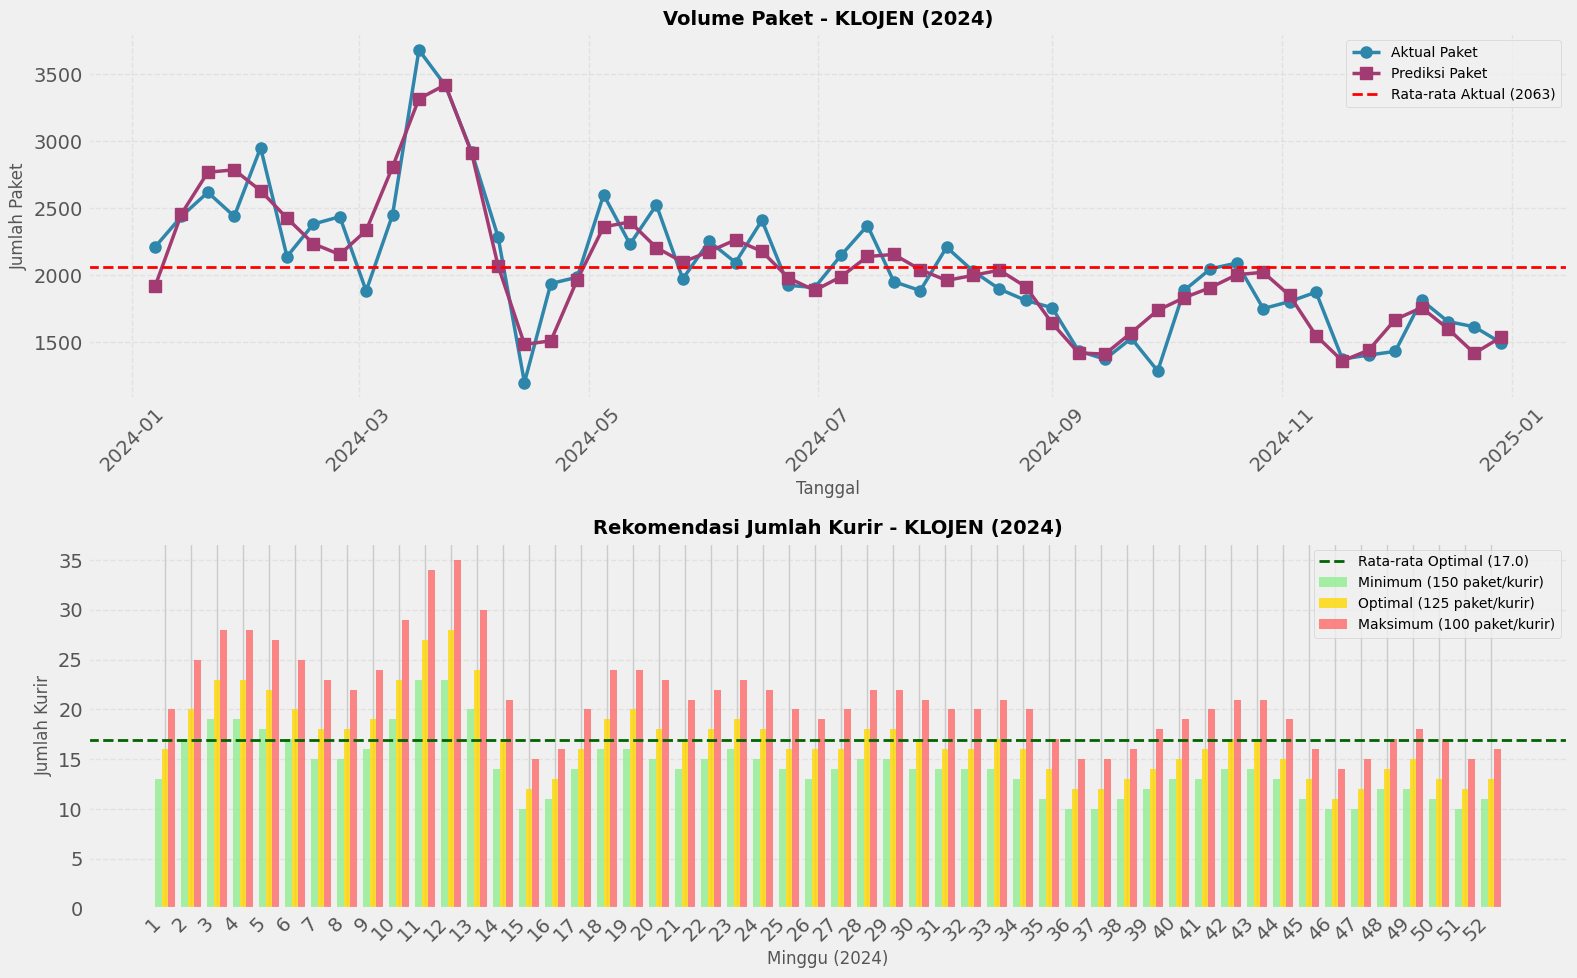


Kecamatan: LOWOKWARU


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             838           911              6   
1  2024-01-14          2            1054          1016              8   
2  2024-01-21          3            1180          1023              8   
3  2024-01-28          4            1139          1479              8   
4  2024-02-04          5            1013           997              7   
5  2024-02-11          6             950           881              7   
6  2024-02-18          7            1018          1147              7   
7  2024-02-25          8            1157          1221              8   
8  2024-03-03          9            1257          1037              9   
9  2024-03-10         10            1266          1302              9   
10 2024-03-17         11            1211          1561              9   
11 2024-03-24         12            1143           981              8   
12 2024-03-31         13            1088          1275              8   
13 2024-04-07         14            1048          1015              7   
14 2024-04-14         15            1024           756              7   
15 2024-04-21         16            1020          1165              7   
16 2024-04-28         17            1031          1000              7   
17 2024-05-05         18            1037           959              7   
18 2024-05-12         19            1035           920              7   
19 2024-05-19         20            1043          1114              7   
20 2024-05-26         21            1072           961              8   
21 2024-06-02         22            1101          1211              8   
22 2024-06-09         23            1095          1095              8   
23 2024-06-16         24            1059          1042              8   
24 2024-06-23         25            1045          1003              7   
25 2024-06-30         26            1096          1239              8   
26 2024-07-07         27            1177          1154              8   
27 2024-07-14         28            1206          1159              9   
28 2024-07-21         29            1144          1226              8   
29 2024-07-28         30            1063          1048              8   
30 2024-08-04         31            1075          1021              8   
31 2024-08-11         32            1212          1317              9   
32 2024-08-18         33            1372          1373             10   
33 2024-08-25         34            1420          1541             10   
34 2024-09-01         35            1328          1563              9   
35 2024-09-08         36            1202          1187              9   
36 2024-09-15         37            1163          1192              8   
37 2024-09-22         38            1219          1292              9   
38 2024-09-29         39            1276          1262              9   
39 2024-10-06         40            1257          1400              9   
40 2024-10-13         41            1186          1060              8   
41 2024-10-20         42            1146          1269              8   
42 2024-10-27         43            1169          1240              8   
43 2024-11-03         44            1206          1143              9   
44 2024-11-10         45            1202          1293              9   
45 2024-11-17         46            1171          1156              8   
46 2024-11-24         47            1172          1374              8   
47 2024-12-01         48            1212          1042              9   
48 2024-12-08         49            1217          1159              9   
49 2024-12-15         50            1126          1219              8   
50 2024-12-22         51             984          1062              7   
51 2024-12-29         52             926           985              7   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket           Status  
0               7               9             73           Sesuai  



Ringkasan Rekomendasi Kurir - LOWOKWARU (2024):
   Rata-rata Prediksi Paket: 1132 paket/minggu
   Rata-rata Aktual Paket: 1155 paket/minggu
   ─────────────────────────────────────────────────
   Rekomendasi Kurir Minimum: 8.1 kurir (beban 150 paket/kurir)
   Rekomendasi Kurir Optimal: 9.6 kurir (beban 125 paket/kurir)
   Rekomendasi Kurir Maksimum: 11.9 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   REKOMENDASI: Sediakan 10 kurir tetap
   Untuk minggu sibuk, tambahkan 6 kurir cadangan


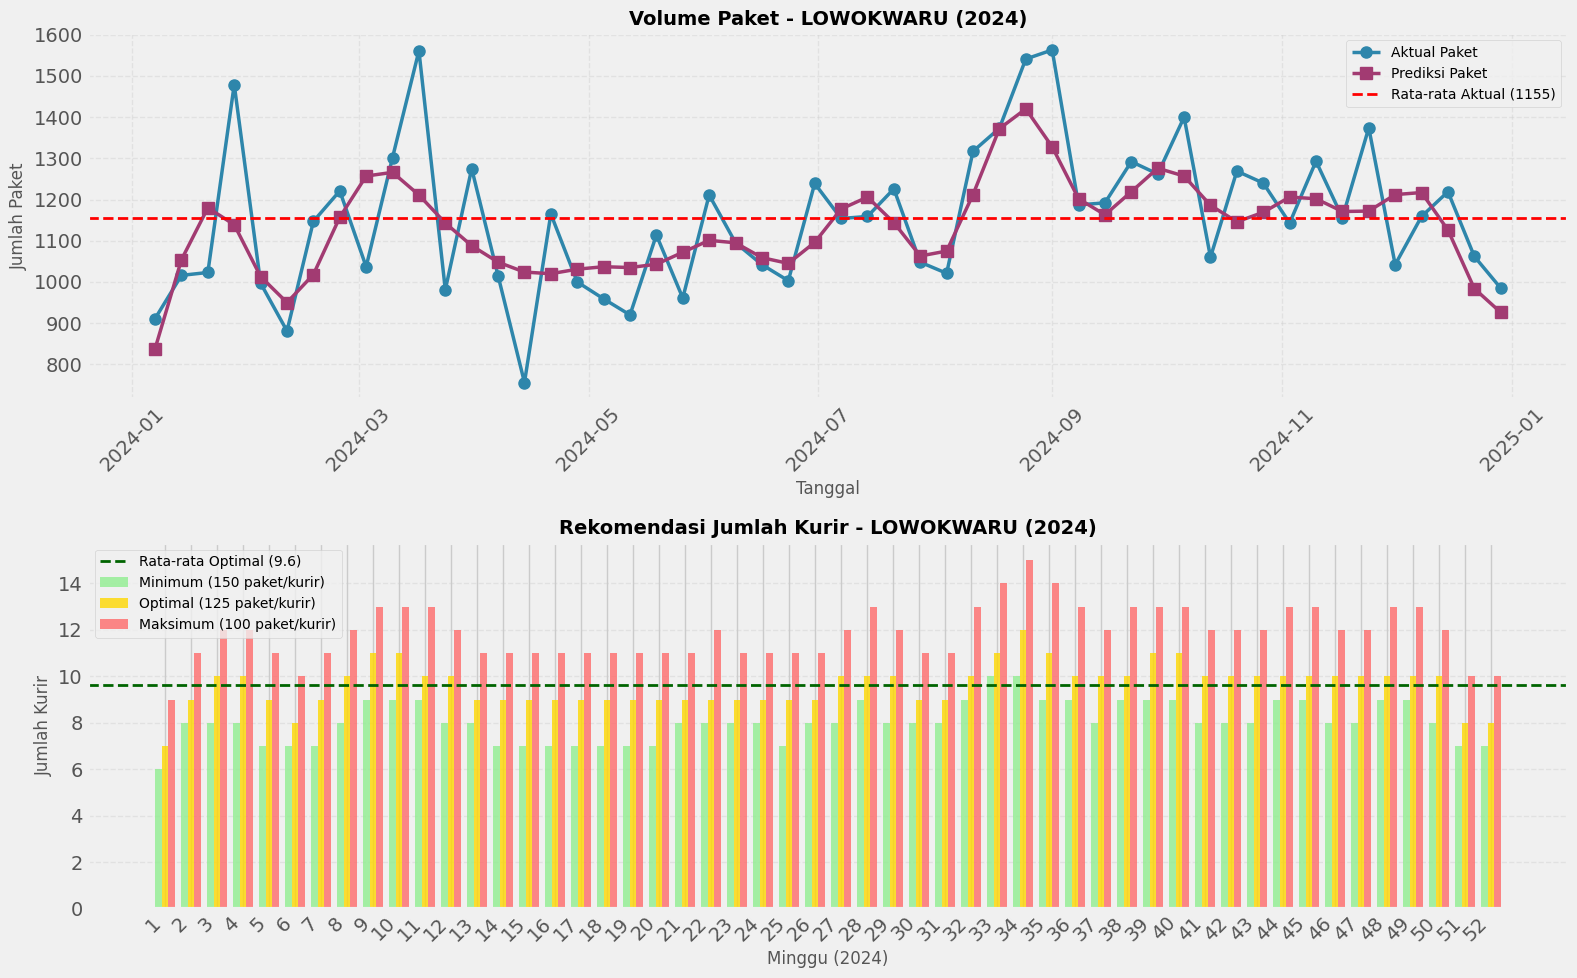


Kecamatan: SUKUN


Tanggal  Minggu_Ke  Prediksi_Paket  Aktual_Paket  Kurir_Minimum  \
0  2024-01-07          1             648           562              5   
1  2024-01-14          2             651           658              5   
2  2024-01-21          3             656           649              5   
3  2024-01-28          4             657           662              5   
4  2024-02-04          5             653           644              5   
5  2024-02-11          6             650           605              5   
6  2024-02-18          7             652           629              5   
7  2024-02-25          8             658           658              5   
8  2024-03-03          9             660           581              5   
9  2024-03-10         10             655           702              5   
10 2024-03-17         11             650           749              5   
11 2024-03-24         12             654           672              5   
12 2024-03-31         13             668           484              5   
13 2024-04-07         14             684           987              5   
14 2024-04-14         15             689          4023              5   
15 2024-04-21         16             678           595              5   
16 2024-04-28         17             661           599              5   
17 2024-05-05         18             651           609              5   
18 2024-05-12         19             652           562              5   
19 2024-05-19         20             659           663              5   
20 2024-05-26         21             662           570              5   
21 2024-06-02         22             660           688              5   
22 2024-06-09         23             656           611              5   
23 2024-06-16         24             657           632              5   
24 2024-06-23         25             660           577              5   
25 2024-06-30         26             663           766              5   
26 2024-07-07         27             664           782              5   
27 2024-07-14         28             662           796              5   
28 2024-07-21         29             662           782              5   
29 2024-07-28         30             664           747              5   
30 2024-08-04         31             665           701              5   
31 2024-08-11         32             665           794              5   
32 2024-08-18         33             664           855              5   
33 2024-08-25         34             665           737              5   
34 2024-09-01         35             665           768              5   
35 2024-09-08         36             664           631              5   
36 2024-09-15         37             662           697              5   
37 2024-09-22         38             662           654              5   
38 2024-09-29         39             663           577              5   
39 2024-10-06         40             665           772              5   
40 2024-10-13         41             666           614              5   
41 2024-10-20         42             665           734              5   
42 2024-10-27         43             665           749              5   
43 2024-11-03         44             666           647              5   
44 2024-11-10         45             668           803              5   
45 2024-11-17         46             668           687              5   
46 2024-11-24         47             667           764              5   
47 2024-12-01         48             667           584              5   
48 2024-12-08         49             669           764              5   
49 2024-12-15         50             671           798              5   
50 2024-12-22         51             670           804              5   
51 2024-12-29         52             666           751              5   

    Kurir_Optimal  Kurir_Maksimum  Selisih_Paket           Status  
0               6               7            -86  Perlu Perhatian  



Ringkasan Rekomendasi Kurir - SUKUN (2024):
   Rata-rata Prediksi Paket: 662 paket/minggu
   Rata-rata Aktual Paket: 752 paket/minggu
   ─────────────────────────────────────────────────
   Rekomendasi Kurir Minimum: 5.0 kurir (beban 150 paket/kurir)
   Rekomendasi Kurir Optimal: 6.0 kurir (beban 125 paket/kurir)
   Rekomendasi Kurir Maksimum: 7.0 kurir (beban 100 paket/kurir)
   ─────────────────────────────────────────────────
   REKOMENDASI: Sediakan 6 kurir tetap
   Untuk minggu sibuk, tambahkan 1 kurir cadangan


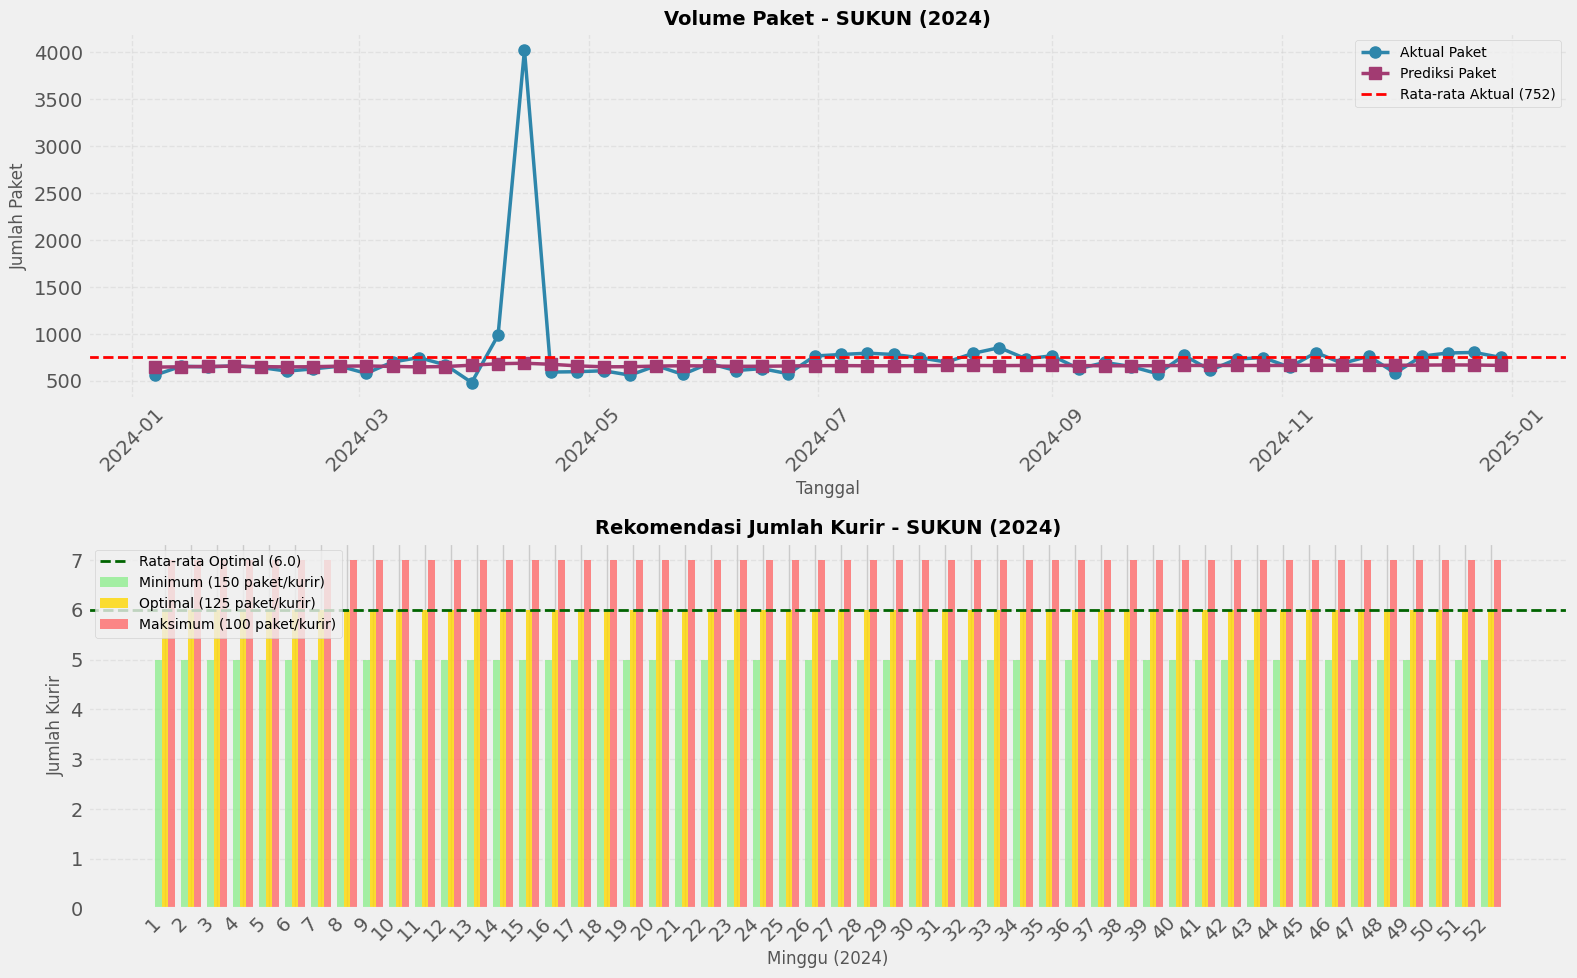

In [27]:
# Rekomendasi Jumlah Kurir berdasarkan Prediksi 2024
print("Menghitung Rekomendasi Jumlah Kurir untuk tahun 2024")
print("Asumsi: 1 kurir dapat menangani 100-150 paket per minggu\n")

# Definisikan kapasitas kurir
KAPASITAS_KURIR_MIN = 100  # paket per minggu per kurir (beban tinggi)
KAPASITAS_KURIR_MAX = 150  # paket per minggu per kurir (beban normal)

for kecamatan in unique_kecamatan:
    print(f"\n{'='*90}")
    print(f"Kecamatan: {kecamatan}")
    print(f"{'='*90}")
    
    # Ambil data dari hasil prediksi
    result = predictions_results[kecamatan]
    test_data = result['test'].copy()
    test_pred = result['test_predictions'].copy()
    
    # Filter hanya untuk tahun 2024
    test_data_2024 = test_data[test_data['Tgl_Kirim'].dt.year == 2024].copy()
    test_pred_2024 = test_pred[test_pred['ds'].dt.year == 2024].copy()
    
    # Buat tabel rekomendasi kurir
    kurir_recommendation = pd.DataFrame({
        'Tanggal': test_data_2024['Tgl_Kirim'].values,
        'Minggu_Ke': test_data_2024['minggu_ke'].values,
        'Prediksi_Paket': test_pred_2024['yhat'].round(0).astype(int).values,
        'Aktual_Paket': test_data_2024['total paket'].values,
        'Kurir_Minimum': np.ceil(test_pred_2024['yhat'] / KAPASITAS_KURIR_MAX).astype(int).values,
        'Kurir_Optimal': np.ceil(test_pred_2024['yhat'] / 125).astype(int).values,  # rata-rata 125
        'Kurir_Maksimum': np.ceil(test_pred_2024['yhat'] / KAPASITAS_KURIR_MIN).astype(int).values,
    })
    
    # Hitung selisih prediksi vs aktual
    kurir_recommendation['Selisih_Paket'] = (kurir_recommendation['Aktual_Paket'] - 
                                              kurir_recommendation['Prediksi_Paket'])
    
    # Rekomendasi status
    def get_status(pred, actual):
        diff_pct = abs(actual - pred) / actual * 100
        if diff_pct < 10:
            return "Sesuai"
        elif diff_pct < 30:
            return "Perlu Perhatian"
        else:
            return "Kritis"
    
    kurir_recommendation['Status'] = kurir_recommendation.apply(
        lambda row: get_status(row['Prediksi_Paket'], row['Aktual_Paket']), axis=1
    )
    
    # Tampilkan tabel
    display(kurir_recommendation)
    
    # Statistik ringkasan
    print(f"\nRingkasan Rekomendasi Kurir - {kecamatan} (2024):")
    print(f"   Rata-rata Prediksi Paket: {kurir_recommendation['Prediksi_Paket'].mean():.0f} paket/minggu")
    print(f"   Rata-rata Aktual Paket: {kurir_recommendation['Aktual_Paket'].mean():.0f} paket/minggu")
    print(f"   ─────────────────────────────────────────────────")
    print(f"   Rekomendasi Kurir Minimum: {kurir_recommendation['Kurir_Minimum'].mean():.1f} kurir (beban 150 paket/kurir)")
    print(f"   Rekomendasi Kurir Optimal: {kurir_recommendation['Kurir_Optimal'].mean():.1f} kurir (beban 125 paket/kurir)")
    print(f"   Rekomendasi Kurir Maksimum: {kurir_recommendation['Kurir_Maksimum'].mean():.1f} kurir (beban 100 paket/kurir)")
    print(f"   ─────────────────────────────────────────────────")
    print(f"   REKOMENDASI: Sediakan {int(np.ceil(kurir_recommendation['Kurir_Optimal'].mean()))} kurir tetap")
    print(f"   Untuk minggu sibuk, tambahkan {int(np.ceil(kurir_recommendation['Kurir_Maksimum'].max() - kurir_recommendation['Kurir_Optimal'].mean()))} kurir cadangan")
    
    # Visualisasi kebutuhan kurir
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
    
    # Plot 1: Prediksi Paket vs Aktual
    ax1.plot(kurir_recommendation['Tanggal'], kurir_recommendation['Aktual_Paket'], 
             marker='o', label='Aktual Paket', linewidth=2.5, markersize=8, color='#2E86AB')
    ax1.plot(kurir_recommendation['Tanggal'], kurir_recommendation['Prediksi_Paket'], 
             marker='s', label='Prediksi Paket', linewidth=2.5, markersize=8, color='#A23B72')
    ax1.axhline(y=kurir_recommendation['Aktual_Paket'].mean(), color='red', 
                linestyle='--', label=f'Rata-rata Aktual ({kurir_recommendation["Aktual_Paket"].mean():.0f})', linewidth=2)
    ax1.set_title(f'Volume Paket - {kecamatan} (2024)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Tanggal', fontsize=12)
    ax1.set_ylabel('Jumlah Paket', fontsize=12)
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.4, linestyle='--')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Rekomendasi Kurir
    x_pos = range(len(kurir_recommendation))
    width = 0.25
    
    ax2.bar([x - width for x in x_pos], kurir_recommendation['Kurir_Minimum'], 
            width, label='Minimum (150 paket/kurir)', color='#90EE90', alpha=0.8)
    ax2.bar(x_pos, kurir_recommendation['Kurir_Optimal'], 
            width, label='Optimal (125 paket/kurir)', color='#FFD700', alpha=0.8)
    ax2.bar([x + width for x in x_pos], kurir_recommendation['Kurir_Maksimum'], 
            width, label='Maksimum (100 paket/kurir)', color='#FF6B6B', alpha=0.8)
    
    ax2.axhline(y=kurir_recommendation['Kurir_Optimal'].mean(), color='darkgreen', 
                linestyle='--', label=f'Rata-rata Optimal ({kurir_recommendation["Kurir_Optimal"].mean():.1f})', linewidth=2)
    
    ax2.set_title(f'Rekomendasi Jumlah Kurir - {kecamatan} (2024)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Minggu (2024)', fontsize=12)
    ax2.set_ylabel('Jumlah Kurir', fontsize=12)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(kurir_recommendation['Minggu_Ke'], rotation=45, ha='right')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.4, linestyle='--', axis='y')
    
    plt.tight_layout()
    plt.show()